<a href="https://colab.research.google.com/github/zenox-ux/Implementation-of-EEG-Inception-An-Accurate-and-Robust-End-to-End-Neural-Network-/blob/main/eeg_inception.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
! pip install mne matplotlib

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
import mne
import os

# Path to your file (edit this!)
gdf_path_a = '/content/drive/MyDrive/BCICIV_2a_gdf'
gdf_path_b = '/content/drive/MyDrive/BCICIV_2b_gdf'




In [7]:


event_label_to_name_a = {
    276: "idling_eyes_open",
    277: "idling_eyes_closed",
    768: "trial_start",
    769: "cue_left_hand",
    770: "cue_right_hand",
    771: "cue_feet",
    772: "cue_tongue",
    783: "cue_unknown",
    1023: "rejected_trial",
    1072: "eye_movements",
    32766: "run_start"
}

event_label_to_name_b = {
    276: "idling_eyes_open",
    277: "idling_eyes_closed",
    768: "trial_start",
    769: "cue_left_hand",
    770: "cue_right_hand",
    781: "bci_feedback",
    783: "cue_unknown",
    1023: "rejected_trial",
    1077: "eye_horizontal_move",
    1078: "eye_vertical_move",
    1079: "eye_rotation",
    1081: "eye_blinks",
    32766: "run_start"
}

In [8]:
def explore(filepath):
    print(f"\nLoading: {os.path.basename(filepath)}")
    print("=" * 60)

    try:
        raw = mne.io.read_raw_gdf(filepath, preload=True, verbose=False)
        print("printing the info variable")
        print(raw.info)
        print("printing the raw")
        print(dir(raw))
        print("the number of time points is ")
        print(raw.n_times)
        print("array of time points")
        print(raw.times)
        print("the sampling frequency is ")
        print(raw.info['sfreq'])
        print("the duration variable is ")
        print(raw.duration)
        print("using the vars")
        print(vars(raw))
        print("printing the annotations")
        print("the length meaning the number of the time samples is ")
        print(len(raw.times))
        print("the describe function of the raw")
        print(raw.describe())
        print("using the duration fucntion ")
        print(raw.duration)
        print("using the montage fucntion ")
        print(raw.get_montage())
        print(dir(raw.annotations))
        print(raw.annotations)
        print("printing the description")
        print(raw.annotations.description)
        print("printing the onset")
        print(raw.annotations.onset)
        print("printing the duration")
        print(raw.annotations.duration)
    except Exception as e:


        print(f"[Error] Failed to load file: {e}")
        return
gdf_files = ["/content/drive/MyDrive/BCICIV_2b_gdf/B0101T.gdf", "/content/drive/MyDrive/BCICIV_2b_gdf/B0102T.gdf"]
for file in gdf_files:
    explore(file)


Loading: B0101T.gdf


/tmp/ipython-input-8-850311717.py:6: RuntimeWarning: Highpass cutoff frequency 100.0 is greater than lowpass cutoff frequency 0.5, setting values to 0 and Nyquist.
  raw = mne.io.read_raw_gdf(filepath, preload=True, verbose=False)


printing the info variable
<Info | 8 non-empty values
 bads: []
 ch_names: EEG:C3, EEG:Cz, EEG:C4, EOG:ch01, EOG:ch02, EOG:ch03
 chs: 6 EEG
 custom_ref_applied: False
 highpass: 0.0 Hz
 lowpass: 125.0 Hz
 meas_date: 2005-10-25 09:35:11 UTC
 nchan: 6
 projs: []
 sfreq: 250.0 Hz
 subject_info: <subject_info | his_id: B01, sex: 0, last_name: X, birthday: 1984-12-01>
>
printing the raw
['__class__', '__contains__', '__del__', '__delattr__', '__dict__', '__dir__', '__doc__', '__enter__', '__eq__', '__exit__', '__format__', '__ge__', '__getattribute__', '__getitem__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__len__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__setitem__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_annotations', '_cals', '_check_bad_segment', '_comp', '_cropped_samp', '_data', '_dtype', '_dtype_', '_extra_attributes', '_filenames', '_first_samps', '_first

/tmp/ipython-input-8-850311717.py:6: RuntimeWarning: Highpass cutoff frequency 100.0 is greater than lowpass cutoff frequency 0.5, setting values to 0 and Nyquist.
  raw = mne.io.read_raw_gdf(filepath, preload=True, verbose=False)


printing the info variable
<Info | 8 non-empty values
 bads: []
 ch_names: EEG:C3, EEG:Cz, EEG:C4, EOG:ch01, EOG:ch02, EOG:ch03
 chs: 6 EEG
 custom_ref_applied: False
 highpass: 0.0 Hz
 lowpass: 125.0 Hz
 meas_date: 2005-11-07 16:38:57 UTC
 nchan: 6
 projs: []
 sfreq: 250.0 Hz
 subject_info: <subject_info | his_id: B01, sex: 0, last_name: X, birthday: 1984-12-01>
>
printing the raw
['__class__', '__contains__', '__del__', '__delattr__', '__dict__', '__dir__', '__doc__', '__enter__', '__eq__', '__exit__', '__format__', '__ge__', '__getattribute__', '__getitem__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__len__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__setitem__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_annotations', '_cals', '_check_bad_segment', '_comp', '_cropped_samp', '_data', '_dtype', '_dtype_', '_extra_attributes', '_filenames', '_first_samps', '_first

In [9]:
import os
import mne
import numpy as np
def explore_and_report_gdf(filepath, ground_truth_map):
    """
    Analyzes a GDF file using a ground-truth mapping to dynamically
    interpret and display event information.
    """
    print(f"\n Loading File: {os.path.basename(filepath)}")
    print("=" * 70)

    try:
        # Load the file with verbose=False to keep output clean
        raw = mne.io.read_raw_gdf(filepath, preload=True, verbose=False)
        print(f"[Debug] Successfully loaded raw data with shape: {raw.get_data().shape}")
    except Exception as e:
        print(f"[Error] Failed to load GDF file: {e}")
        return

    # --- Basic EEG Info ---
    print("\n EEG Data Summary:")
    print(f"  File Path            : {filepath}")
    print(f"  Total Duration       : {raw.times[-1]:.2f} seconds")
    print(f"  Sampling Frequency   : {raw.info['sfreq']} Hz")
    print(f"  Number of Channels   : {len(raw.ch_names)}")
    print(f"  Channel Names        : {raw.ch_names}")
    print(f"  Data Shape           : {raw.get_data().shape} (channels x samples)")

    # --- Events ---
    print("\n Events Extracted:")
    try:
        events, mne_event_id_dict = mne.events_from_annotations(raw, verbose=False)
        print(f"  [Debug] Total Events Found: {len(events)}")
        print(f"  [Debug] MNE's internal Event ID Mapping: {mne_event_id_dict}")

        # --- DYNAMIC MAPPING CREATION ---
        id_to_friendly_name = {}
        for mne_desc, mne_id in mne_event_id_dict.items():
            print(f"  [Debug] Processing mne_desc: {mne_desc}, mne_id: {mne_id}")
            # Convert mne_desc to integer for lookup in ground_truth_map
            mne_desc_int = int(float(mne_desc)) if isinstance(mne_desc, (str, np.str_)) else mne_desc
            friendly_name = ground_truth_map.get(mne_desc_int, f"Code {mne_desc_int}")
            print(f"  [Debug] Mapped {mne_desc} to {friendly_name}")
            id_to_friendly_name[mne_id] = friendly_name

        sfreq = raw.info["sfreq"]
        print("\n  Event Timeline (interpreted using ground-truth map):")
        for sample, _, event_id in events:
            time_sec = sample / sfreq
            label = id_to_friendly_name.get(event_id, f"Unknown ID={event_id}")
            print(f"    → Time: {time_sec:7.2f}s | Sample: {sample:<7} | Event: {label}")

    except Exception as e:
        print(f"  [Error] Could not extract events: {e}")

    print("=" * 70)

# --- Main Execution ---

# Lists of files to process
gdf_files_a = [
    "/content/drive/MyDrive/BCICIV_2a_gdf/A01T.gdf",
    "/content/drive/MyDrive/BCICIV_2a_gdf/A01E.gdf",
    "/content/drive/MyDrive/BCICIV_2a_gdf/A02T.gdf",
    "/content/drive/MyDrive/BCICIV_2a_gdf/A02E.gdf"
]

gdf_files_b = [
    "/content/drive/MyDrive/BCICIV_2b_gdf/B0101T.gdf",
    "/content/drive/MyDrive/BCICIV_2b_gdf/B0103T.gdf",
    "/content/drive/MyDrive/BCICIV_2b_gdf/B0104E.gdf",
    "/content/drive/MyDrive/BCICIV_2b_gdf/B0405E.gdf"
]

# Process Dataset A
print("\n=======  ANALYSIS: DATASET A (2a) =======")
for file in gdf_files_a:
    explore_and_report_gdf(file, ground_truth_map=event_label_to_name_a)

# Process Dataset B
print("\n=======  ANALYSIS: DATASET B (2b) =======")
for file in gdf_files_b:
    explore_and_report_gdf(file, ground_truth_map=event_label_to_name_b)


=======  ANALYSIS: DATASET A (2a) =======

 Loading File: A01T.gdf


/usr/lib/python3.11/contextlib.py:144: RuntimeWarning: Channel names are not unique, found duplicates for: {'EEG'}. Applying running numbers for duplicates.
  next(self.gen)


[Debug] Successfully loaded raw data with shape: (25, 672528)

 EEG Data Summary:
  File Path            : /content/drive/MyDrive/BCICIV_2a_gdf/A01T.gdf
  Total Duration       : 2690.11 seconds
  Sampling Frequency   : 250.0 Hz
  Number of Channels   : 25
  Channel Names        : ['EEG-Fz', 'EEG-0', 'EEG-1', 'EEG-2', 'EEG-3', 'EEG-4', 'EEG-5', 'EEG-C3', 'EEG-6', 'EEG-Cz', 'EEG-7', 'EEG-C4', 'EEG-8', 'EEG-9', 'EEG-10', 'EEG-11', 'EEG-12', 'EEG-13', 'EEG-14', 'EEG-Pz', 'EEG-15', 'EEG-16', 'EOG-left', 'EOG-central', 'EOG-right']
  Data Shape           : (25, 672528) (channels x samples)

 Events Extracted:
  [Debug] Total Events Found: 603
  [Debug] MNE's internal Event ID Mapping: {np.str_('1023'): 1, np.str_('1072'): 2, np.str_('276'): 3, np.str_('277'): 4, np.str_('32766'): 5, np.str_('768'): 6, np.str_('769'): 7, np.str_('770'): 8, np.str_('771'): 9, np.str_('772'): 10}
  [Debug] Processing mne_desc: 1023, mne_id: 1
  [Debug] Mapped 1023 to rejected_trial
  [Debug] Processing mne_desc

/usr/lib/python3.11/contextlib.py:144: RuntimeWarning: Channel names are not unique, found duplicates for: {'EEG'}. Applying running numbers for duplicates.
  next(self.gen)


[Debug] Successfully loaded raw data with shape: (25, 687000)

 EEG Data Summary:
  File Path            : /content/drive/MyDrive/BCICIV_2a_gdf/A01E.gdf
  Total Duration       : 2748.00 seconds
  Sampling Frequency   : 250.0 Hz
  Number of Channels   : 25
  Channel Names        : ['EEG-Fz', 'EEG-0', 'EEG-1', 'EEG-2', 'EEG-3', 'EEG-4', 'EEG-5', 'EEG-C3', 'EEG-6', 'EEG-Cz', 'EEG-7', 'EEG-C4', 'EEG-8', 'EEG-9', 'EEG-10', 'EEG-11', 'EEG-12', 'EEG-13', 'EEG-14', 'EEG-Pz', 'EEG-15', 'EEG-16', 'EOG-left', 'EOG-central', 'EOG-right']
  Data Shape           : (25, 687000) (channels x samples)

 Events Extracted:
  [Debug] Total Events Found: 595
  [Debug] MNE's internal Event ID Mapping: {np.str_('1023'): 1, np.str_('1072'): 2, np.str_('276'): 3, np.str_('277'): 4, np.str_('32766'): 5, np.str_('768'): 6, np.str_('783'): 7}
  [Debug] Processing mne_desc: 1023, mne_id: 1
  [Debug] Mapped 1023 to rejected_trial
  [Debug] Processing mne_desc: 1072, mne_id: 2
  [Debug] Mapped 1072 to eye_movements
 

/usr/lib/python3.11/contextlib.py:144: RuntimeWarning: Channel names are not unique, found duplicates for: {'EEG'}. Applying running numbers for duplicates.
  next(self.gen)


[Debug] Successfully loaded raw data with shape: (25, 677169)

 EEG Data Summary:
  File Path            : /content/drive/MyDrive/BCICIV_2a_gdf/A02T.gdf
  Total Duration       : 2708.67 seconds
  Sampling Frequency   : 250.0 Hz
  Number of Channels   : 25
  Channel Names        : ['EEG-Fz', 'EEG-0', 'EEG-1', 'EEG-2', 'EEG-3', 'EEG-4', 'EEG-5', 'EEG-C3', 'EEG-6', 'EEG-Cz', 'EEG-7', 'EEG-C4', 'EEG-8', 'EEG-9', 'EEG-10', 'EEG-11', 'EEG-12', 'EEG-13', 'EEG-14', 'EEG-Pz', 'EEG-15', 'EEG-16', 'EOG-left', 'EOG-central', 'EOG-right']
  Data Shape           : (25, 677169) (channels x samples)

 Events Extracted:
  [Debug] Total Events Found: 606
  [Debug] MNE's internal Event ID Mapping: {np.str_('1023'): 1, np.str_('1072'): 2, np.str_('276'): 3, np.str_('277'): 4, np.str_('32766'): 5, np.str_('768'): 6, np.str_('769'): 7, np.str_('770'): 8, np.str_('771'): 9, np.str_('772'): 10}
  [Debug] Processing mne_desc: 1023, mne_id: 1
  [Debug] Mapped 1023 to rejected_trial
  [Debug] Processing mne_desc

/usr/lib/python3.11/contextlib.py:144: RuntimeWarning: Channel names are not unique, found duplicates for: {'EEG'}. Applying running numbers for duplicates.
  next(self.gen)


[Debug] Successfully loaded raw data with shape: (25, 662666)

 EEG Data Summary:
  File Path            : /content/drive/MyDrive/BCICIV_2a_gdf/A02E.gdf
  Total Duration       : 2650.66 seconds
  Sampling Frequency   : 250.0 Hz
  Number of Channels   : 25
  Channel Names        : ['EEG-Fz', 'EEG-0', 'EEG-1', 'EEG-2', 'EEG-3', 'EEG-4', 'EEG-5', 'EEG-C3', 'EEG-6', 'EEG-Cz', 'EEG-7', 'EEG-C4', 'EEG-8', 'EEG-9', 'EEG-10', 'EEG-11', 'EEG-12', 'EEG-13', 'EEG-14', 'EEG-Pz', 'EEG-15', 'EEG-16', 'EOG-left', 'EOG-central', 'EOG-right']
  Data Shape           : (25, 662666) (channels x samples)

 Events Extracted:
  [Debug] Total Events Found: 593
  [Debug] MNE's internal Event ID Mapping: {np.str_('1023'): 1, np.str_('1072'): 2, np.str_('276'): 3, np.str_('277'): 4, np.str_('32766'): 5, np.str_('768'): 6, np.str_('783'): 7}
  [Debug] Processing mne_desc: 1023, mne_id: 1
  [Debug] Mapped 1023 to rejected_trial
  [Debug] Processing mne_desc: 1072, mne_id: 2
  [Debug] Mapped 1072 to eye_movements
 

/tmp/ipython-input-9-851534371.py:14: RuntimeWarning: Highpass cutoff frequency 100.0 is greater than lowpass cutoff frequency 0.5, setting values to 0 and Nyquist.
  raw = mne.io.read_raw_gdf(filepath, preload=True, verbose=False)


[Debug] Successfully loaded raw data with shape: (6, 604803)

 EEG Data Summary:
  File Path            : /content/drive/MyDrive/BCICIV_2b_gdf/B0101T.gdf
  Total Duration       : 2419.21 seconds
  Sampling Frequency   : 250.0 Hz
  Number of Channels   : 6
  Channel Names        : ['EEG:C3', 'EEG:Cz', 'EEG:C4', 'EOG:ch01', 'EOG:ch02', 'EOG:ch03']
  Data Shape           : (6, 604803) (channels x samples)

 Events Extracted:
  [Debug] Total Events Found: 271
  [Debug] MNE's internal Event ID Mapping: {np.str_('1023'): 1, np.str_('1077'): 2, np.str_('1078'): 3, np.str_('1079'): 4, np.str_('1081'): 5, np.str_('276'): 6, np.str_('277'): 7, np.str_('32766'): 8, np.str_('768'): 9, np.str_('769'): 10, np.str_('770'): 11}
  [Debug] Processing mne_desc: 1023, mne_id: 1
  [Debug] Mapped 1023 to rejected_trial
  [Debug] Processing mne_desc: 1077, mne_id: 2
  [Debug] Mapped 1077 to eye_horizontal_move
  [Debug] Processing mne_desc: 1078, mne_id: 3
  [Debug] Mapped 1078 to eye_vertical_move
  [Debug]

/tmp/ipython-input-9-851534371.py:14: RuntimeWarning: Highpass cutoff frequency 100.0 is greater than lowpass cutoff frequency 0.5, setting values to 0 and Nyquist.
  raw = mne.io.read_raw_gdf(filepath, preload=True, verbose=False)


[Debug] Successfully loaded raw data with shape: (6, 469011)

 EEG Data Summary:
  File Path            : /content/drive/MyDrive/BCICIV_2b_gdf/B0103T.gdf
  Total Duration       : 1876.04 seconds
  Sampling Frequency   : 250.0 Hz
  Number of Channels   : 6
  Channel Names        : ['EEG:C3', 'EEG:Cz', 'EEG:C4', 'EOG:ch01', 'EOG:ch02', 'EOG:ch03']
  Data Shape           : (6, 469011) (channels x samples)

 Events Extracted:
  [Debug] Total Events Found: 527
  [Debug] MNE's internal Event ID Mapping: {np.str_('1023'): 1, np.str_('1077'): 2, np.str_('1078'): 3, np.str_('1079'): 4, np.str_('1081'): 5, np.str_('276'): 6, np.str_('277'): 7, np.str_('32766'): 8, np.str_('768'): 9, np.str_('769'): 10, np.str_('770'): 11, np.str_('781'): 12}
  [Debug] Processing mne_desc: 1023, mne_id: 1
  [Debug] Mapped 1023 to rejected_trial
  [Debug] Processing mne_desc: 1077, mne_id: 2
  [Debug] Mapped 1077 to eye_horizontal_move
  [Debug] Processing mne_desc: 1078, mne_id: 3
  [Debug] Mapped 1078 to eye_ver

/tmp/ipython-input-9-851534371.py:14: RuntimeWarning: Highpass cutoff frequency 100.0 is greater than lowpass cutoff frequency 0.5, setting values to 0 and Nyquist.
  raw = mne.io.read_raw_gdf(filepath, preload=True, verbose=False)


[Debug] Successfully loaded raw data with shape: (6, 466314)

 EEG Data Summary:
  File Path            : /content/drive/MyDrive/BCICIV_2b_gdf/B0104E.gdf
  Total Duration       : 1865.25 seconds
  Sampling Frequency   : 250.0 Hz
  Number of Channels   : 6
  Channel Names        : ['EEG:C3', 'EEG:Cz', 'EEG:C4', 'EOG:ch01', 'EOG:ch02', 'EOG:ch03']
  Data Shape           : (6, 466314) (channels x samples)

 Events Extracted:
  [Debug] Total Events Found: 539
  [Debug] MNE's internal Event ID Mapping: {np.str_('1023'): 1, np.str_('1077'): 2, np.str_('1078'): 3, np.str_('1079'): 4, np.str_('1081'): 5, np.str_('276'): 6, np.str_('277'): 7, np.str_('32766'): 8, np.str_('768'): 9, np.str_('781'): 10, np.str_('783'): 11}
  [Debug] Processing mne_desc: 1023, mne_id: 1
  [Debug] Mapped 1023 to rejected_trial
  [Debug] Processing mne_desc: 1077, mne_id: 2
  [Debug] Mapped 1077 to eye_horizontal_move
  [Debug] Processing mne_desc: 1078, mne_id: 3
  [Debug] Mapped 1078 to eye_vertical_move
  [Debug]

/tmp/ipython-input-9-851534371.py:14: RuntimeWarning: Highpass cutoff frequency 100.0 is greater than lowpass cutoff frequency 0.5, setting values to 0 and Nyquist.
  raw = mne.io.read_raw_gdf(filepath, preload=True, verbose=False)


[Debug] Successfully loaded raw data with shape: (6, 466051)

 EEG Data Summary:
  File Path            : /content/drive/MyDrive/BCICIV_2b_gdf/B0405E.gdf
  Total Duration       : 1864.20 seconds
  Sampling Frequency   : 250.0 Hz
  Number of Channels   : 6
  Channel Names        : ['EEG:C3', 'EEG:Cz', 'EEG:C4', 'EOG:ch01', 'EOG:ch02', 'EOG:ch03']
  Data Shape           : (6, 466051) (channels x samples)

 Events Extracted:
  [Debug] Total Events Found: 497
  [Debug] MNE's internal Event ID Mapping: {np.str_('1023'): 1, np.str_('1077'): 2, np.str_('1078'): 3, np.str_('1079'): 4, np.str_('1081'): 5, np.str_('276'): 6, np.str_('277'): 7, np.str_('32766'): 8, np.str_('768'): 9, np.str_('781'): 10, np.str_('783'): 11}
  [Debug] Processing mne_desc: 1023, mne_id: 1
  [Debug] Mapped 1023 to rejected_trial
  [Debug] Processing mne_desc: 1077, mne_id: 2
  [Debug] Mapped 1077 to eye_horizontal_move
  [Debug] Processing mne_desc: 1078, mne_id: 3
  [Debug] Mapped 1078 to eye_vertical_move
  [Debug]

================== PROCESSING DATASET 2a (First 3 Files) ==================
Analyzing File: A01E.gdf from Dataset 2a
Extracting EDF parameters from /content/drive/MyDrive/BCICIV_2a_gdf/A01E.gdf...
GDF file detected
Setting channel info structure...
Could not determine channel type of the following channels, they will be set as EEG:
EEG-Fz, EEG, EEG, EEG, EEG, EEG, EEG, EEG-C3, EEG, EEG-Cz, EEG, EEG-C4, EEG, EEG, EEG, EEG, EEG, EEG, EEG, EEG-Pz, EEG, EEG, EOG-left, EOG-central, EOG-right
Creating raw.info structure...
Extracting EDF parameters from /content/drive/MyDrive/BCICIV_2a_gdf/A01E.gdf...
GDF file detected
Setting channel info structure...
Could not determine channel type of the following channels, they will be set as EEG:
EEG-Fz, EEG, EEG, EEG, EEG, EEG, EEG, EEG-C3, EEG, EEG-Cz, EEG, EEG-C4, EEG, EEG, EEG, EEG, EEG, EEG, EEG, EEG-Pz, EEG, EEG
Creating raw.info structure...
Reading 0 ... 686999  =      0.000 ...  2747.996 secs...


/usr/lib/python3.11/contextlib.py:144: RuntimeWarning: Channel names are not unique, found duplicates for: {'EEG'}. Applying running numbers for duplicates.
  next(self.gen)
/usr/lib/python3.11/contextlib.py:144: RuntimeWarning: Channel names are not unique, found duplicates for: {'EEG'}. Applying running numbers for duplicates.
  next(self.gen)



--- Event Information ---
Used Annotations descriptions: [np.str_('1023'), np.str_('1072'), np.str_('276'), np.str_('277'), np.str_('32766'), np.str_('768'), np.str_('783')]


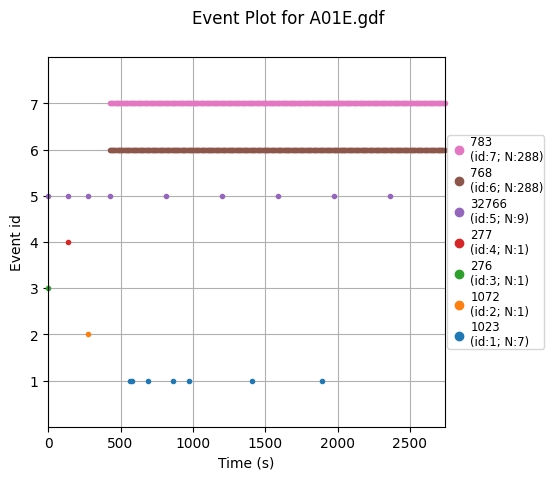




Analyzing File: A01T.gdf from Dataset 2a
Extracting EDF parameters from /content/drive/MyDrive/BCICIV_2a_gdf/A01T.gdf...
GDF file detected
Setting channel info structure...
Could not determine channel type of the following channels, they will be set as EEG:
EEG-Fz, EEG, EEG, EEG, EEG, EEG, EEG, EEG-C3, EEG, EEG-Cz, EEG, EEG-C4, EEG, EEG, EEG, EEG, EEG, EEG, EEG, EEG-Pz, EEG, EEG, EOG-left, EOG-central, EOG-right
Creating raw.info structure...
Extracting EDF parameters from /content/drive/MyDrive/BCICIV_2a_gdf/A01T.gdf...
GDF file detected
Setting channel info structure...
Could not determine channel type of the following channels, they will be set as EEG:
EEG-Fz, EEG, EEG, EEG, EEG, EEG, EEG, EEG-C3, EEG, EEG-Cz, EEG, EEG-C4, EEG, EEG, EEG, EEG, EEG, EEG, EEG, EEG-Pz, EEG, EEG
Creating raw.info structure...
Reading 0 ... 672527  =      0.000 ...  2690.108 secs...


/usr/lib/python3.11/contextlib.py:144: RuntimeWarning: Channel names are not unique, found duplicates for: {'EEG'}. Applying running numbers for duplicates.
  next(self.gen)
/usr/lib/python3.11/contextlib.py:144: RuntimeWarning: Channel names are not unique, found duplicates for: {'EEG'}. Applying running numbers for duplicates.
  next(self.gen)



--- Event Information ---
Used Annotations descriptions: [np.str_('1023'), np.str_('1072'), np.str_('276'), np.str_('277'), np.str_('32766'), np.str_('768'), np.str_('769'), np.str_('770'), np.str_('771'), np.str_('772')]


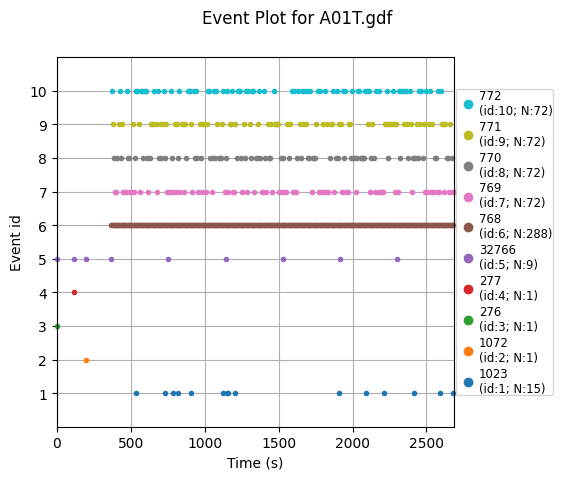




Analyzing File: A02E.gdf from Dataset 2a
Extracting EDF parameters from /content/drive/MyDrive/BCICIV_2a_gdf/A02E.gdf...
GDF file detected
Setting channel info structure...
Could not determine channel type of the following channels, they will be set as EEG:
EEG-Fz, EEG, EEG, EEG, EEG, EEG, EEG, EEG-C3, EEG, EEG-Cz, EEG, EEG-C4, EEG, EEG, EEG, EEG, EEG, EEG, EEG, EEG-Pz, EEG, EEG, EOG-left, EOG-central, EOG-right
Creating raw.info structure...
Extracting EDF parameters from /content/drive/MyDrive/BCICIV_2a_gdf/A02E.gdf...
GDF file detected
Setting channel info structure...
Could not determine channel type of the following channels, they will be set as EEG:
EEG-Fz, EEG, EEG, EEG, EEG, EEG, EEG, EEG-C3, EEG, EEG-Cz, EEG, EEG-C4, EEG, EEG, EEG, EEG, EEG, EEG, EEG, EEG-Pz, EEG, EEG
Creating raw.info structure...
Reading 0 ... 662665  =      0.000 ...  2650.660 secs...


/usr/lib/python3.11/contextlib.py:144: RuntimeWarning: Channel names are not unique, found duplicates for: {'EEG'}. Applying running numbers for duplicates.
  next(self.gen)
/usr/lib/python3.11/contextlib.py:144: RuntimeWarning: Channel names are not unique, found duplicates for: {'EEG'}. Applying running numbers for duplicates.
  next(self.gen)



--- Event Information ---
Used Annotations descriptions: [np.str_('1023'), np.str_('1072'), np.str_('276'), np.str_('277'), np.str_('32766'), np.str_('768'), np.str_('783')]


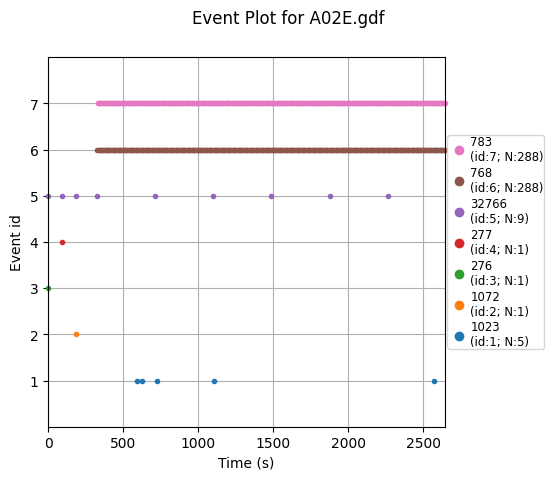




Analyzing File: A02T.gdf from Dataset 2a
Extracting EDF parameters from /content/drive/MyDrive/BCICIV_2a_gdf/A02T.gdf...
GDF file detected
Setting channel info structure...
Could not determine channel type of the following channels, they will be set as EEG:
EEG-Fz, EEG, EEG, EEG, EEG, EEG, EEG, EEG-C3, EEG, EEG-Cz, EEG, EEG-C4, EEG, EEG, EEG, EEG, EEG, EEG, EEG, EEG-Pz, EEG, EEG, EOG-left, EOG-central, EOG-right
Creating raw.info structure...
Extracting EDF parameters from /content/drive/MyDrive/BCICIV_2a_gdf/A02T.gdf...
GDF file detected
Setting channel info structure...
Could not determine channel type of the following channels, they will be set as EEG:
EEG-Fz, EEG, EEG, EEG, EEG, EEG, EEG, EEG-C3, EEG, EEG-Cz, EEG, EEG-C4, EEG, EEG, EEG, EEG, EEG, EEG, EEG, EEG-Pz, EEG, EEG
Creating raw.info structure...
Reading 0 ... 677168  =      0.000 ...  2708.672 secs...


/usr/lib/python3.11/contextlib.py:144: RuntimeWarning: Channel names are not unique, found duplicates for: {'EEG'}. Applying running numbers for duplicates.
  next(self.gen)
/usr/lib/python3.11/contextlib.py:144: RuntimeWarning: Channel names are not unique, found duplicates for: {'EEG'}. Applying running numbers for duplicates.
  next(self.gen)



--- Event Information ---
Used Annotations descriptions: [np.str_('1023'), np.str_('1072'), np.str_('276'), np.str_('277'), np.str_('32766'), np.str_('768'), np.str_('769'), np.str_('770'), np.str_('771'), np.str_('772')]


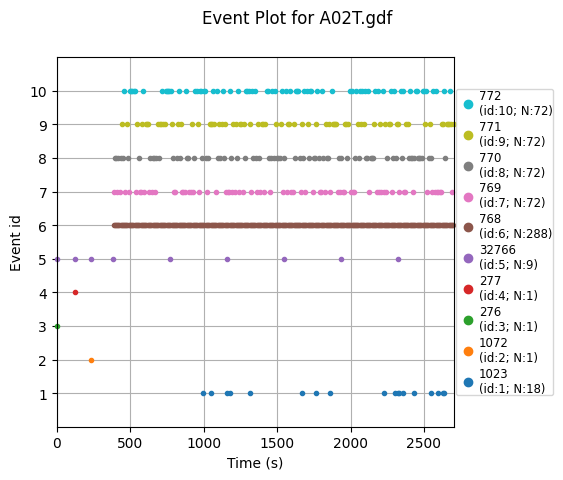




Analyzing File: A03E.gdf from Dataset 2a
Extracting EDF parameters from /content/drive/MyDrive/BCICIV_2a_gdf/A03E.gdf...
GDF file detected
Setting channel info structure...
Could not determine channel type of the following channels, they will be set as EEG:
EEG-Fz, EEG, EEG, EEG, EEG, EEG, EEG, EEG-C3, EEG, EEG-Cz, EEG, EEG-C4, EEG, EEG, EEG, EEG, EEG, EEG, EEG, EEG-Pz, EEG, EEG, EOG-left, EOG-central, EOG-right
Creating raw.info structure...
Extracting EDF parameters from /content/drive/MyDrive/BCICIV_2a_gdf/A03E.gdf...
GDF file detected
Setting channel info structure...
Could not determine channel type of the following channels, they will be set as EEG:
EEG-Fz, EEG, EEG, EEG, EEG, EEG, EEG, EEG-C3, EEG, EEG-Cz, EEG, EEG-C4, EEG, EEG, EEG, EEG, EEG, EEG, EEG, EEG-Pz, EEG, EEG
Creating raw.info structure...
Reading 0 ... 648774  =      0.000 ...  2595.096 secs...


/usr/lib/python3.11/contextlib.py:144: RuntimeWarning: Channel names are not unique, found duplicates for: {'EEG'}. Applying running numbers for duplicates.
  next(self.gen)
/usr/lib/python3.11/contextlib.py:144: RuntimeWarning: Channel names are not unique, found duplicates for: {'EEG'}. Applying running numbers for duplicates.
  next(self.gen)



--- Event Information ---
Used Annotations descriptions: [np.str_('1023'), np.str_('1072'), np.str_('276'), np.str_('277'), np.str_('32766'), np.str_('768'), np.str_('783')]


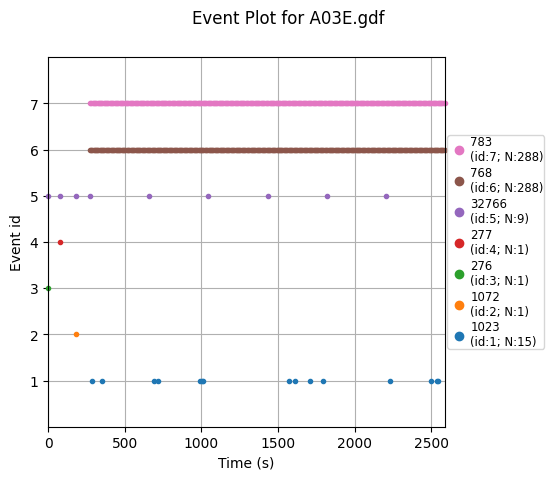




--- Reached limit of 5 files for Dataset 2a. Stopping. ---

================== PROCESSING DATASET 2b (First 3 Files) ==================
Analyzing File: B0101T.gdf from Dataset 2b
Extracting EDF parameters from /content/drive/MyDrive/BCICIV_2b_gdf/B0101T.gdf...
GDF file detected
Setting channel info structure...
Could not determine channel type of the following channels, they will be set as EEG:
EEG:C3, EEG:Cz, EEG:C4, EOG:ch01, EOG:ch02, EOG:ch03
Creating raw.info structure...
Extracting EDF parameters from /content/drive/MyDrive/BCICIV_2b_gdf/B0101T.gdf...
GDF file detected
Setting channel info structure...
Could not determine channel type of the following channels, they will be set as EEG:
EEG:C3, EEG:Cz, EEG:C4, EOG:ch01, EOG:ch02, EOG:ch03
Creating raw.info structure...
Reading 0 ... 604802  =      0.000 ...  2419.208 secs...


/tmp/ipython-input-10-2122812115.py:20: RuntimeWarning: Highpass cutoff frequency 100.0 is greater than lowpass cutoff frequency 0.5, setting values to 0 and Nyquist.
  raw_info = mne.io.read_raw_gdf(file_path, preload=False)
/tmp/ipython-input-10-2122812115.py:22: RuntimeWarning: Highpass cutoff frequency 100.0 is greater than lowpass cutoff frequency 0.5, setting values to 0 and Nyquist.
  raw = mne.io.read_raw_gdf(file_path, preload=True, eog=eog_channels)



--- Event Information ---
Used Annotations descriptions: [np.str_('1023'), np.str_('1077'), np.str_('1078'), np.str_('1079'), np.str_('1081'), np.str_('276'), np.str_('277'), np.str_('32766'), np.str_('768'), np.str_('769'), np.str_('770')]


/tmp/ipython-input-10-2122812115.py:39: RuntimeWarning: More events than default colors available. You should pass a list of unique colors.
  fig = mne.viz.plot_events(events, sfreq=sfreq, first_samp=raw.first_samp,


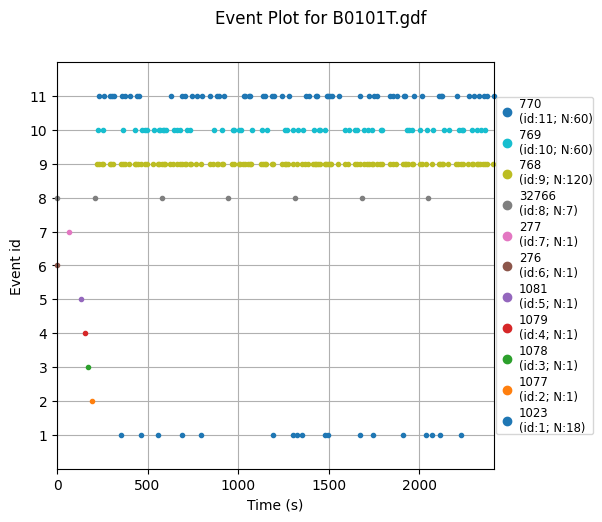




Analyzing File: B0102T.gdf from Dataset 2b
Extracting EDF parameters from /content/drive/MyDrive/BCICIV_2b_gdf/B0102T.gdf...
GDF file detected
Setting channel info structure...
Could not determine channel type of the following channels, they will be set as EEG:
EEG:C3, EEG:Cz, EEG:C4, EOG:ch01, EOG:ch02, EOG:ch03
Creating raw.info structure...
Extracting EDF parameters from /content/drive/MyDrive/BCICIV_2b_gdf/B0102T.gdf...
GDF file detected
Setting channel info structure...
Could not determine channel type of the following channels, they will be set as EEG:
EEG:C3, EEG:Cz, EEG:C4, EOG:ch01, EOG:ch02, EOG:ch03
Creating raw.info structure...
Reading 0 ... 552451  =      0.000 ...  2209.804 secs...


/tmp/ipython-input-10-2122812115.py:20: RuntimeWarning: Highpass cutoff frequency 100.0 is greater than lowpass cutoff frequency 0.5, setting values to 0 and Nyquist.
  raw_info = mne.io.read_raw_gdf(file_path, preload=False)
/tmp/ipython-input-10-2122812115.py:22: RuntimeWarning: Highpass cutoff frequency 100.0 is greater than lowpass cutoff frequency 0.5, setting values to 0 and Nyquist.
  raw = mne.io.read_raw_gdf(file_path, preload=True, eog=eog_channels)



--- Event Information ---
Used Annotations descriptions: [np.str_('1023'), np.str_('32766'), np.str_('768'), np.str_('769'), np.str_('770')]


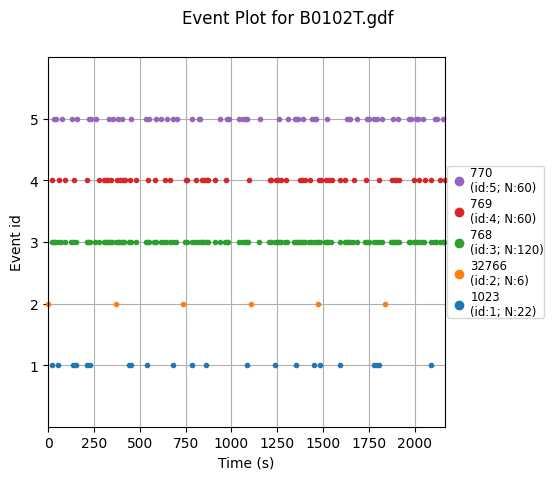




Analyzing File: B0103T.gdf from Dataset 2b
Extracting EDF parameters from /content/drive/MyDrive/BCICIV_2b_gdf/B0103T.gdf...
GDF file detected
Setting channel info structure...
Could not determine channel type of the following channels, they will be set as EEG:
EEG:C3, EEG:Cz, EEG:C4, EOG:ch01, EOG:ch02, EOG:ch03
Creating raw.info structure...
Extracting EDF parameters from /content/drive/MyDrive/BCICIV_2b_gdf/B0103T.gdf...
GDF file detected
Setting channel info structure...
Could not determine channel type of the following channels, they will be set as EEG:
EEG:C3, EEG:Cz, EEG:C4, EOG:ch01, EOG:ch02, EOG:ch03
Creating raw.info structure...
Reading 0 ... 469010  =      0.000 ...  1876.040 secs...


/tmp/ipython-input-10-2122812115.py:20: RuntimeWarning: Highpass cutoff frequency 100.0 is greater than lowpass cutoff frequency 0.5, setting values to 0 and Nyquist.
  raw_info = mne.io.read_raw_gdf(file_path, preload=False)
/tmp/ipython-input-10-2122812115.py:22: RuntimeWarning: Highpass cutoff frequency 100.0 is greater than lowpass cutoff frequency 0.5, setting values to 0 and Nyquist.
  raw = mne.io.read_raw_gdf(file_path, preload=True, eog=eog_channels)



--- Event Information ---
Used Annotations descriptions: [np.str_('1023'), np.str_('1077'), np.str_('1078'), np.str_('1079'), np.str_('1081'), np.str_('276'), np.str_('277'), np.str_('32766'), np.str_('768'), np.str_('769'), np.str_('770'), np.str_('781')]


/tmp/ipython-input-10-2122812115.py:39: RuntimeWarning: More events than default colors available. You should pass a list of unique colors.
  fig = mne.viz.plot_events(events, sfreq=sfreq, first_samp=raw.first_samp,


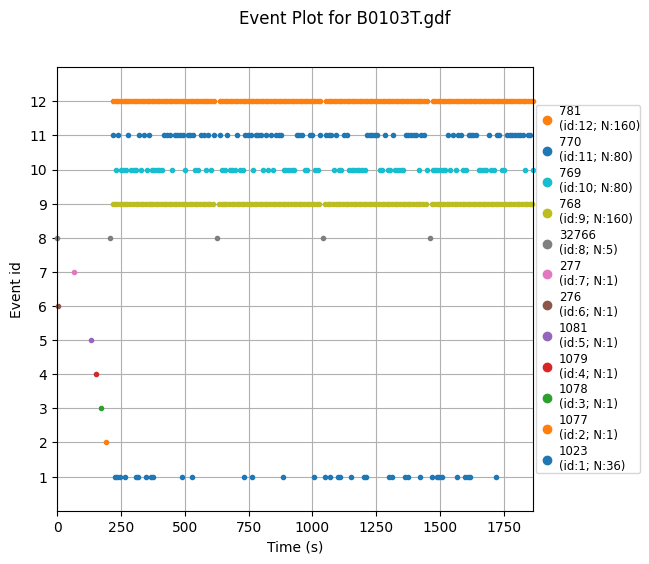




Analyzing File: B0104E.gdf from Dataset 2b
Extracting EDF parameters from /content/drive/MyDrive/BCICIV_2b_gdf/B0104E.gdf...
GDF file detected
Setting channel info structure...
Could not determine channel type of the following channels, they will be set as EEG:
EEG:C3, EEG:Cz, EEG:C4, EOG:ch01, EOG:ch02, EOG:ch03
Creating raw.info structure...
Extracting EDF parameters from /content/drive/MyDrive/BCICIV_2b_gdf/B0104E.gdf...
GDF file detected
Setting channel info structure...
Could not determine channel type of the following channels, they will be set as EEG:
EEG:C3, EEG:Cz, EEG:C4, EOG:ch01, EOG:ch02, EOG:ch03
Creating raw.info structure...
Reading 0 ... 466313  =      0.000 ...  1865.252 secs...


/tmp/ipython-input-10-2122812115.py:20: RuntimeWarning: Highpass cutoff frequency 100.0 is greater than lowpass cutoff frequency 0.5, setting values to 0 and Nyquist.
  raw_info = mne.io.read_raw_gdf(file_path, preload=False)
/tmp/ipython-input-10-2122812115.py:22: RuntimeWarning: Highpass cutoff frequency 100.0 is greater than lowpass cutoff frequency 0.5, setting values to 0 and Nyquist.
  raw = mne.io.read_raw_gdf(file_path, preload=True, eog=eog_channels)



--- Event Information ---
Used Annotations descriptions: [np.str_('1023'), np.str_('1077'), np.str_('1078'), np.str_('1079'), np.str_('1081'), np.str_('276'), np.str_('277'), np.str_('32766'), np.str_('768'), np.str_('781'), np.str_('783')]


/tmp/ipython-input-10-2122812115.py:39: RuntimeWarning: More events than default colors available. You should pass a list of unique colors.
  fig = mne.viz.plot_events(events, sfreq=sfreq, first_samp=raw.first_samp,


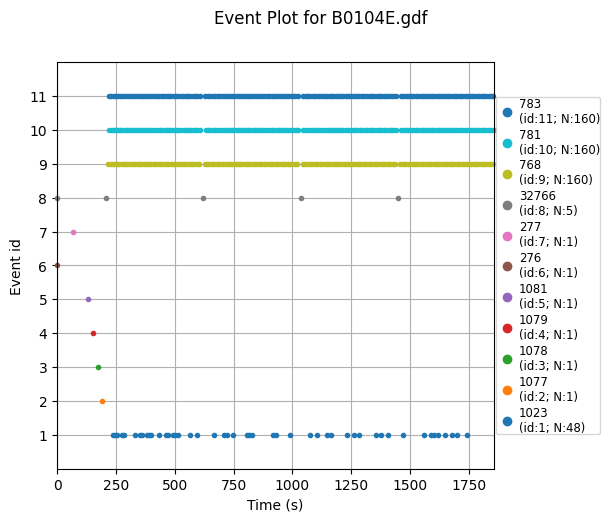




Analyzing File: B0105E.gdf from Dataset 2b
Extracting EDF parameters from /content/drive/MyDrive/BCICIV_2b_gdf/B0105E.gdf...
GDF file detected
Setting channel info structure...
Could not determine channel type of the following channels, they will be set as EEG:
EEG:C3, EEG:Cz, EEG:C4, EOG:ch01, EOG:ch02, EOG:ch03
Creating raw.info structure...
Extracting EDF parameters from /content/drive/MyDrive/BCICIV_2b_gdf/B0105E.gdf...
GDF file detected
Setting channel info structure...
Could not determine channel type of the following channels, they will be set as EEG:
EEG:C3, EEG:Cz, EEG:C4, EOG:ch01, EOG:ch02, EOG:ch03
Creating raw.info structure...
Reading 0 ... 474362  =      0.000 ...  1897.448 secs...


/tmp/ipython-input-10-2122812115.py:20: RuntimeWarning: Highpass cutoff frequency 100.0 is greater than lowpass cutoff frequency 0.5, setting values to 0 and Nyquist.
  raw_info = mne.io.read_raw_gdf(file_path, preload=False)
/tmp/ipython-input-10-2122812115.py:22: RuntimeWarning: Highpass cutoff frequency 100.0 is greater than lowpass cutoff frequency 0.5, setting values to 0 and Nyquist.
  raw = mne.io.read_raw_gdf(file_path, preload=True, eog=eog_channels)



--- Event Information ---
Used Annotations descriptions: [np.str_('1023'), np.str_('1077'), np.str_('1078'), np.str_('1079'), np.str_('1081'), np.str_('276'), np.str_('277'), np.str_('32766'), np.str_('768'), np.str_('781'), np.str_('783')]


/tmp/ipython-input-10-2122812115.py:39: RuntimeWarning: More events than default colors available. You should pass a list of unique colors.
  fig = mne.viz.plot_events(events, sfreq=sfreq, first_samp=raw.first_samp,


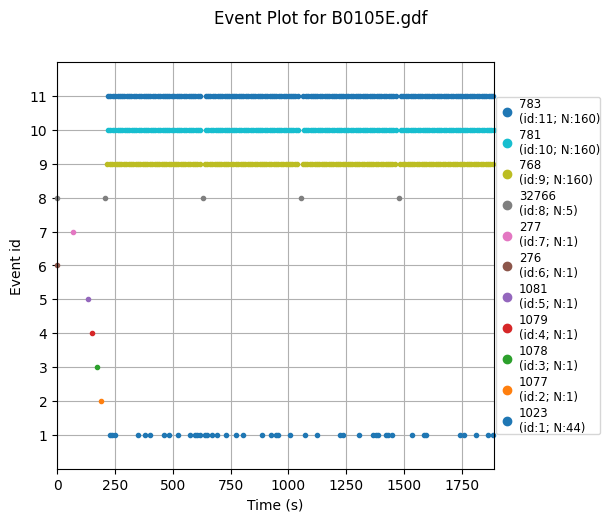




--- Reached limit of 5 files for Dataset 2b. Stopping. ---
================== ANALYSIS COMPLETE ==================


In [10]:
import mne
import os
import matplotlib.pyplot as plt
import numpy as np


def analyze_and_plot_gdf_file(file_path, dataset_name):
    """
    Analyzes a single GDF file, prints detailed information,
    and displays an event plot directly in the notebook.
    """
    print("="*80)
    print(f"Analyzing File: {os.path.basename(file_path)} from Dataset {dataset_name}")
    print("="*80)

    try:
        # 1. Load the GDF file using MNE
        # Note: Added specific EOG channel names for dataset 2a to avoid warnings
        # This dynamic check prevents errors if a file doesn't have all EOG channels
        raw_info = mne.io.read_raw_gdf(file_path, preload=False)
        eog_channels = [ch for ch in ['EOG-left', 'EOG-central', 'EOG-right'] if ch in raw_info.ch_names]
        raw = mne.io.read_raw_gdf(file_path, preload=True, eog=eog_channels)
        sfreq = raw.info['sfreq']

        data_shape = raw.get_data().shape

        # 3. Print channel names and other info
        ch_names = raw.ch_names
        sfreq = raw.info['sfreq']
        duration_seconds = data_shape[1] / sfreq

        # 4. Extract events from annotations
        print("\n--- Event Information ---")
        try:
            events, event_id = mne.events_from_annotations(raw)

            # 6. Generate and DISPLAY the event plot

            fig = mne.viz.plot_events(events, sfreq=sfreq, first_samp=raw.first_samp,
                                      event_id=event_id, show=False)

            plot_title = f'Event Plot for {os.path.basename(file_path)}'
            fig.suptitle(plot_title, y=0.98)

            plt.show()

        except ValueError:
            print("\n*** No annotations found in this file. Cannot extract or plot events. ***")

    except Exception as e:
        print(f"\n!!!!!! AN ERROR OCCURRED while processing {file_path} !!!!!!!")
        print(f"Error details: {e}")

    print("\n\n")


# --- Main Execution ---
# We will use a counter to limit the number of files processed.
files_to_process = 5

# Process Dataset 2a
print("================== PROCESSING DATASET 2a (First 3 Files) ==================")
if os.path.exists(gdf_path_a):
    file_counter = 0
    # sorted() ensures we get a consistent order of files (e.g., A01T, A01E, A02T...)
    for filename in sorted(os.listdir(gdf_path_a)):
        if filename.endswith(".gdf"):
            if file_counter >= files_to_process:
                print(f"--- Reached limit of {files_to_process} files for Dataset 2a. Stopping. ---")
                break # Exit the loop

            file_path = os.path.join(gdf_path_a, filename)
            analyze_and_plot_gdf_file(file_path, "2a")
            file_counter += 1
else:
    print(f"Directory not found: {gdf_path_a}. Please check the path.")


# Process Dataset 2b
print("\n================== PROCESSING DATASET 2b (First 3 Files) ==================")
if os.path.exists(gdf_path_b):
    file_counter = 0
    for filename in sorted(os.listdir(gdf_path_b)):
        if filename.endswith(".gdf"):
            if file_counter >= files_to_process:
                print(f"--- Reached limit of {files_to_process} files for Dataset 2b. Stopping. ---")
                break # Exit the loop

            file_path = os.path.join(gdf_path_b, filename)
            analyze_and_plot_gdf_file(file_path, "2b")
            file_counter += 1
else:
    print(f"Directory not found: {gdf_path_b}. Please check the path.")

print("================== ANALYSIS COMPLETE ==================")

In [11]:
import mne
import os
import matplotlib.pyplot as plt
import numpy as np
import glob

def remove_eog_and_verify(filepath, dataset_name):
    """
    Loads a GDF file, removes EOG channels, and prints verification messages.
    Returns the cleaned MNE Raw object.
    """
    print("="*80)
    print(f"Processing File: {os.path.basename(filepath)} from Dataset {dataset_name}")
    print("="*80)

    try:
        # Step 1: Load the GDF file
        print("Step 1: Loading raw GDF data...")
        raw = mne.io.read_raw_gdf(filepath, preload=True, verbose=False)
        print("...File loaded successfully.")

        # --- VERIFICATION BLOCK: BEFORE REMOVAL ---
        print("\n--- State BEFORE EOG Removal ---")
        original_ch_count = len(raw.ch_names)
        original_ch_names = raw.ch_names
        print(f"Original Channel Count: {original_ch_count}")
        print(f"Original Channel Names: {original_ch_names}")

        # Step 2: Manually set channel types for Dataset B if necessary
        # This is crucial because MNE doesn't automatically know 'EOG:ch01' is an EOG channel.
        if dataset_name == 'B':
            print("\nStep 2: Dataset B detected. Manually setting EOG channel types...")
            # Create a mapping for the channels we want to set
            channel_type_mapping = {
                'EOG:ch01': 'eog',
                'EOG:ch02': 'eog',
                'EOG:ch03': 'eog'
            }
            raw.set_channel_types(channel_type_mapping)
            print("...Channel types set successfully.")
            # Verify the types were set
            print(f"Current channel types: {raw.get_channel_types(unique=True)}")

        if dataset_name == 'A':
          print("\nStep 2: Dataset A detected. Manually setting EOG channel types...")
          channel_type_mapping = {
              'EOG-left': 'eog',
              'EOG-central': 'eog',
              'EOG-right': 'eog'
          }
          raw.set_channel_types(channel_type_mapping)
          print("...Channel types set successfully.")
          print(f"Current channel types: {raw.get_channel_types(unique=True)}")


        # Step 3: Remove non-EEG channels
        print("\nStep 3: Removing all non-EEG channels...")
        # We use pick_types to select ONLY the channels of type 'eeg'.
        # MNE automatically knows 'EOG-left', etc., are EOG. We just told it about Dataset B's EOG channels.
        raw.pick_types(eeg=True)
        print("...Channels selected.")

        # --- VERIFICATION BLOCK: AFTER REMOVAL ---
        print("\n--- State AFTER EOG Removal ---")
        final_ch_count = len(raw.ch_names)
        final_ch_names = raw.ch_names
        print(f"Final Channel Count: {final_ch_count}")
        print(f"Final Channel Names: {final_ch_names}")

        # Final verification check
        expected_count = 22 if dataset_name == 'A' else 3
        print(f"\nVERIFICATION CHECK: Expecting {expected_count} EEG channels for Dataset {dataset_name}.")
        if final_ch_count == expected_count:
            print(" VERIFICATION SUCCESSFUL! The channel count is correct.")
        else:
            print(f" VERIFICATION FAILED! Expected {expected_count} but found {final_ch_count}.")

        return raw

    except Exception as e:
        print(f"\n[Error] An error occurred while processing the file: {e}")
        return None


def process_all_gdf_in_dir(directory, dataset_name):
    """
    Process all .gdf files in a given directory, remove EOG, and return list of cleaned Raw objects.
    """
    gdf_files = sorted(glob.glob(os.path.join(directory, "*.gdf")))
    cleaned_raws = []

    if not gdf_files:
        print(f"No GDF files found in {directory}")
        return cleaned_raws

    print(f"\n--- Found {len(gdf_files)} GDF files in {directory} ---")

    for filepath in gdf_files:
        cleaned_raw = remove_eog_and_verify(filepath, dataset_name=dataset_name)
        if cleaned_raw is not None:
            cleaned_raws.append(cleaned_raw)

    return cleaned_raws


# --- Run for both datasets ---
print("\n======= PROCESSING ALL FILES IN DATASET A (2a) =======")
cleaned_a = process_all_gdf_in_dir(gdf_path_a, dataset_name='A')

print("\n\n======= PROCESSING ALL FILES IN DATASET B (2b) =======")
cleaned_b = process_all_gdf_in_dir(gdf_path_b, dataset_name='B')



======= PROCESSING ALL FILES IN DATASET A (2a) =======

--- Found 18 GDF files in /content/drive/MyDrive/BCICIV_2a_gdf ---
Processing File: A01E.gdf from Dataset A
Step 1: Loading raw GDF data...


/usr/lib/python3.11/contextlib.py:144: RuntimeWarning: Channel names are not unique, found duplicates for: {'EEG'}. Applying running numbers for duplicates.
  next(self.gen)


...File loaded successfully.

--- State BEFORE EOG Removal ---
Original Channel Count: 25
Original Channel Names: ['EEG-Fz', 'EEG-0', 'EEG-1', 'EEG-2', 'EEG-3', 'EEG-4', 'EEG-5', 'EEG-C3', 'EEG-6', 'EEG-Cz', 'EEG-7', 'EEG-C4', 'EEG-8', 'EEG-9', 'EEG-10', 'EEG-11', 'EEG-12', 'EEG-13', 'EEG-14', 'EEG-Pz', 'EEG-15', 'EEG-16', 'EOG-left', 'EOG-central', 'EOG-right']

Step 2: Dataset A detected. Manually setting EOG channel types...
...Channel types set successfully.
Current channel types: ['eeg', 'eog']

Step 3: Removing all non-EEG channels...
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
...Channels selected.

--- State AFTER EOG Removal ---
Final Channel Count: 22
Final Channel Names: ['EEG-Fz', 'EEG-0', 'EEG-1', 'EEG-2', 'EEG-3', 'EEG-4', 'EEG-5', 'EEG-C3', 'EEG-6', 'EEG-Cz', 'EEG-7', 'EEG-C4', 'EEG-8', 'EEG-9', 'EEG-10', 'EEG-11', 'EEG-12', 'EEG-13', 'EEG-14', 'EEG-Pz', 'EEG-15', 'EEG-16']

VERIFICATION CHECK: Expecting 22 EEG channels for Dataset A.
 VE

/usr/lib/python3.11/contextlib.py:144: RuntimeWarning: Channel names are not unique, found duplicates for: {'EEG'}. Applying running numbers for duplicates.
  next(self.gen)


...File loaded successfully.

--- State BEFORE EOG Removal ---
Original Channel Count: 25
Original Channel Names: ['EEG-Fz', 'EEG-0', 'EEG-1', 'EEG-2', 'EEG-3', 'EEG-4', 'EEG-5', 'EEG-C3', 'EEG-6', 'EEG-Cz', 'EEG-7', 'EEG-C4', 'EEG-8', 'EEG-9', 'EEG-10', 'EEG-11', 'EEG-12', 'EEG-13', 'EEG-14', 'EEG-Pz', 'EEG-15', 'EEG-16', 'EOG-left', 'EOG-central', 'EOG-right']

Step 2: Dataset A detected. Manually setting EOG channel types...
...Channel types set successfully.
Current channel types: ['eeg', 'eog']

Step 3: Removing all non-EEG channels...
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
...Channels selected.

--- State AFTER EOG Removal ---
Final Channel Count: 22
Final Channel Names: ['EEG-Fz', 'EEG-0', 'EEG-1', 'EEG-2', 'EEG-3', 'EEG-4', 'EEG-5', 'EEG-C3', 'EEG-6', 'EEG-Cz', 'EEG-7', 'EEG-C4', 'EEG-8', 'EEG-9', 'EEG-10', 'EEG-11', 'EEG-12', 'EEG-13', 'EEG-14', 'EEG-Pz', 'EEG-15', 'EEG-16']

VERIFICATION CHECK: Expecting 22 EEG channels for Dataset A.
 VE

/usr/lib/python3.11/contextlib.py:144: RuntimeWarning: Channel names are not unique, found duplicates for: {'EEG'}. Applying running numbers for duplicates.
  next(self.gen)


...File loaded successfully.

--- State BEFORE EOG Removal ---
Original Channel Count: 25
Original Channel Names: ['EEG-Fz', 'EEG-0', 'EEG-1', 'EEG-2', 'EEG-3', 'EEG-4', 'EEG-5', 'EEG-C3', 'EEG-6', 'EEG-Cz', 'EEG-7', 'EEG-C4', 'EEG-8', 'EEG-9', 'EEG-10', 'EEG-11', 'EEG-12', 'EEG-13', 'EEG-14', 'EEG-Pz', 'EEG-15', 'EEG-16', 'EOG-left', 'EOG-central', 'EOG-right']

Step 2: Dataset A detected. Manually setting EOG channel types...
...Channel types set successfully.
Current channel types: ['eeg', 'eog']

Step 3: Removing all non-EEG channels...
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
...Channels selected.

--- State AFTER EOG Removal ---
Final Channel Count: 22
Final Channel Names: ['EEG-Fz', 'EEG-0', 'EEG-1', 'EEG-2', 'EEG-3', 'EEG-4', 'EEG-5', 'EEG-C3', 'EEG-6', 'EEG-Cz', 'EEG-7', 'EEG-C4', 'EEG-8', 'EEG-9', 'EEG-10', 'EEG-11', 'EEG-12', 'EEG-13', 'EEG-14', 'EEG-Pz', 'EEG-15', 'EEG-16']

VERIFICATION CHECK: Expecting 22 EEG channels for Dataset A.
 VE

/usr/lib/python3.11/contextlib.py:144: RuntimeWarning: Channel names are not unique, found duplicates for: {'EEG'}. Applying running numbers for duplicates.
  next(self.gen)


...File loaded successfully.

--- State BEFORE EOG Removal ---
Original Channel Count: 25
Original Channel Names: ['EEG-Fz', 'EEG-0', 'EEG-1', 'EEG-2', 'EEG-3', 'EEG-4', 'EEG-5', 'EEG-C3', 'EEG-6', 'EEG-Cz', 'EEG-7', 'EEG-C4', 'EEG-8', 'EEG-9', 'EEG-10', 'EEG-11', 'EEG-12', 'EEG-13', 'EEG-14', 'EEG-Pz', 'EEG-15', 'EEG-16', 'EOG-left', 'EOG-central', 'EOG-right']

Step 2: Dataset A detected. Manually setting EOG channel types...
...Channel types set successfully.
Current channel types: ['eeg', 'eog']

Step 3: Removing all non-EEG channels...
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
...Channels selected.

--- State AFTER EOG Removal ---
Final Channel Count: 22
Final Channel Names: ['EEG-Fz', 'EEG-0', 'EEG-1', 'EEG-2', 'EEG-3', 'EEG-4', 'EEG-5', 'EEG-C3', 'EEG-6', 'EEG-Cz', 'EEG-7', 'EEG-C4', 'EEG-8', 'EEG-9', 'EEG-10', 'EEG-11', 'EEG-12', 'EEG-13', 'EEG-14', 'EEG-Pz', 'EEG-15', 'EEG-16']

VERIFICATION CHECK: Expecting 22 EEG channels for Dataset A.
 VE

/usr/lib/python3.11/contextlib.py:144: RuntimeWarning: Channel names are not unique, found duplicates for: {'EEG'}. Applying running numbers for duplicates.
  next(self.gen)


...File loaded successfully.

--- State BEFORE EOG Removal ---
Original Channel Count: 25
Original Channel Names: ['EEG-Fz', 'EEG-0', 'EEG-1', 'EEG-2', 'EEG-3', 'EEG-4', 'EEG-5', 'EEG-C3', 'EEG-6', 'EEG-Cz', 'EEG-7', 'EEG-C4', 'EEG-8', 'EEG-9', 'EEG-10', 'EEG-11', 'EEG-12', 'EEG-13', 'EEG-14', 'EEG-Pz', 'EEG-15', 'EEG-16', 'EOG-left', 'EOG-central', 'EOG-right']

Step 2: Dataset A detected. Manually setting EOG channel types...
...Channel types set successfully.
Current channel types: ['eeg', 'eog']

Step 3: Removing all non-EEG channels...
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
...Channels selected.

--- State AFTER EOG Removal ---
Final Channel Count: 22
Final Channel Names: ['EEG-Fz', 'EEG-0', 'EEG-1', 'EEG-2', 'EEG-3', 'EEG-4', 'EEG-5', 'EEG-C3', 'EEG-6', 'EEG-Cz', 'EEG-7', 'EEG-C4', 'EEG-8', 'EEG-9', 'EEG-10', 'EEG-11', 'EEG-12', 'EEG-13', 'EEG-14', 'EEG-Pz', 'EEG-15', 'EEG-16']

VERIFICATION CHECK: Expecting 22 EEG channels for Dataset A.
 VE

/usr/lib/python3.11/contextlib.py:144: RuntimeWarning: Channel names are not unique, found duplicates for: {'EEG'}. Applying running numbers for duplicates.
  next(self.gen)


...File loaded successfully.

--- State BEFORE EOG Removal ---
Original Channel Count: 25
Original Channel Names: ['EEG-Fz', 'EEG-0', 'EEG-1', 'EEG-2', 'EEG-3', 'EEG-4', 'EEG-5', 'EEG-C3', 'EEG-6', 'EEG-Cz', 'EEG-7', 'EEG-C4', 'EEG-8', 'EEG-9', 'EEG-10', 'EEG-11', 'EEG-12', 'EEG-13', 'EEG-14', 'EEG-Pz', 'EEG-15', 'EEG-16', 'EOG-left', 'EOG-central', 'EOG-right']

Step 2: Dataset A detected. Manually setting EOG channel types...
...Channel types set successfully.
Current channel types: ['eeg', 'eog']

Step 3: Removing all non-EEG channels...
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
...Channels selected.

--- State AFTER EOG Removal ---
Final Channel Count: 22
Final Channel Names: ['EEG-Fz', 'EEG-0', 'EEG-1', 'EEG-2', 'EEG-3', 'EEG-4', 'EEG-5', 'EEG-C3', 'EEG-6', 'EEG-Cz', 'EEG-7', 'EEG-C4', 'EEG-8', 'EEG-9', 'EEG-10', 'EEG-11', 'EEG-12', 'EEG-13', 'EEG-14', 'EEG-Pz', 'EEG-15', 'EEG-16']

VERIFICATION CHECK: Expecting 22 EEG channels for Dataset A.
 VE

/usr/lib/python3.11/contextlib.py:144: RuntimeWarning: Channel names are not unique, found duplicates for: {'EEG'}. Applying running numbers for duplicates.
  next(self.gen)


...File loaded successfully.

--- State BEFORE EOG Removal ---
Original Channel Count: 25
Original Channel Names: ['EEG-Fz', 'EEG-0', 'EEG-1', 'EEG-2', 'EEG-3', 'EEG-4', 'EEG-5', 'EEG-C3', 'EEG-6', 'EEG-Cz', 'EEG-7', 'EEG-C4', 'EEG-8', 'EEG-9', 'EEG-10', 'EEG-11', 'EEG-12', 'EEG-13', 'EEG-14', 'EEG-Pz', 'EEG-15', 'EEG-16', 'EOG-left', 'EOG-central', 'EOG-right']

Step 2: Dataset A detected. Manually setting EOG channel types...
...Channel types set successfully.
Current channel types: ['eeg', 'eog']

Step 3: Removing all non-EEG channels...
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
...Channels selected.

--- State AFTER EOG Removal ---
Final Channel Count: 22
Final Channel Names: ['EEG-Fz', 'EEG-0', 'EEG-1', 'EEG-2', 'EEG-3', 'EEG-4', 'EEG-5', 'EEG-C3', 'EEG-6', 'EEG-Cz', 'EEG-7', 'EEG-C4', 'EEG-8', 'EEG-9', 'EEG-10', 'EEG-11', 'EEG-12', 'EEG-13', 'EEG-14', 'EEG-Pz', 'EEG-15', 'EEG-16']

VERIFICATION CHECK: Expecting 22 EEG channels for Dataset A.
 VE

/usr/lib/python3.11/contextlib.py:144: RuntimeWarning: Channel names are not unique, found duplicates for: {'EEG'}. Applying running numbers for duplicates.
  next(self.gen)


...File loaded successfully.

--- State BEFORE EOG Removal ---
Original Channel Count: 25
Original Channel Names: ['EEG-Fz', 'EEG-0', 'EEG-1', 'EEG-2', 'EEG-3', 'EEG-4', 'EEG-5', 'EEG-C3', 'EEG-6', 'EEG-Cz', 'EEG-7', 'EEG-C4', 'EEG-8', 'EEG-9', 'EEG-10', 'EEG-11', 'EEG-12', 'EEG-13', 'EEG-14', 'EEG-Pz', 'EEG-15', 'EEG-16', 'EOG-left', 'EOG-central', 'EOG-right']

Step 2: Dataset A detected. Manually setting EOG channel types...
...Channel types set successfully.
Current channel types: ['eeg', 'eog']

Step 3: Removing all non-EEG channels...
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
...Channels selected.

--- State AFTER EOG Removal ---
Final Channel Count: 22
Final Channel Names: ['EEG-Fz', 'EEG-0', 'EEG-1', 'EEG-2', 'EEG-3', 'EEG-4', 'EEG-5', 'EEG-C3', 'EEG-6', 'EEG-Cz', 'EEG-7', 'EEG-C4', 'EEG-8', 'EEG-9', 'EEG-10', 'EEG-11', 'EEG-12', 'EEG-13', 'EEG-14', 'EEG-Pz', 'EEG-15', 'EEG-16']

VERIFICATION CHECK: Expecting 22 EEG channels for Dataset A.
 VE

/usr/lib/python3.11/contextlib.py:144: RuntimeWarning: Channel names are not unique, found duplicates for: {'EEG'}. Applying running numbers for duplicates.
  next(self.gen)


...File loaded successfully.

--- State BEFORE EOG Removal ---
Original Channel Count: 25
Original Channel Names: ['EEG-Fz', 'EEG-0', 'EEG-1', 'EEG-2', 'EEG-3', 'EEG-4', 'EEG-5', 'EEG-C3', 'EEG-6', 'EEG-Cz', 'EEG-7', 'EEG-C4', 'EEG-8', 'EEG-9', 'EEG-10', 'EEG-11', 'EEG-12', 'EEG-13', 'EEG-14', 'EEG-Pz', 'EEG-15', 'EEG-16', 'EOG-left', 'EOG-central', 'EOG-right']

Step 2: Dataset A detected. Manually setting EOG channel types...
...Channel types set successfully.
Current channel types: ['eeg', 'eog']

Step 3: Removing all non-EEG channels...
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
...Channels selected.

--- State AFTER EOG Removal ---
Final Channel Count: 22
Final Channel Names: ['EEG-Fz', 'EEG-0', 'EEG-1', 'EEG-2', 'EEG-3', 'EEG-4', 'EEG-5', 'EEG-C3', 'EEG-6', 'EEG-Cz', 'EEG-7', 'EEG-C4', 'EEG-8', 'EEG-9', 'EEG-10', 'EEG-11', 'EEG-12', 'EEG-13', 'EEG-14', 'EEG-Pz', 'EEG-15', 'EEG-16']

VERIFICATION CHECK: Expecting 22 EEG channels for Dataset A.
 VE

/usr/lib/python3.11/contextlib.py:144: RuntimeWarning: Channel names are not unique, found duplicates for: {'EEG'}. Applying running numbers for duplicates.
  next(self.gen)


...File loaded successfully.

--- State BEFORE EOG Removal ---
Original Channel Count: 25
Original Channel Names: ['EEG-Fz', 'EEG-0', 'EEG-1', 'EEG-2', 'EEG-3', 'EEG-4', 'EEG-5', 'EEG-C3', 'EEG-6', 'EEG-Cz', 'EEG-7', 'EEG-C4', 'EEG-8', 'EEG-9', 'EEG-10', 'EEG-11', 'EEG-12', 'EEG-13', 'EEG-14', 'EEG-Pz', 'EEG-15', 'EEG-16', 'EOG-left', 'EOG-central', 'EOG-right']

Step 2: Dataset A detected. Manually setting EOG channel types...
...Channel types set successfully.
Current channel types: ['eeg', 'eog']

Step 3: Removing all non-EEG channels...
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
...Channels selected.

--- State AFTER EOG Removal ---
Final Channel Count: 22
Final Channel Names: ['EEG-Fz', 'EEG-0', 'EEG-1', 'EEG-2', 'EEG-3', 'EEG-4', 'EEG-5', 'EEG-C3', 'EEG-6', 'EEG-Cz', 'EEG-7', 'EEG-C4', 'EEG-8', 'EEG-9', 'EEG-10', 'EEG-11', 'EEG-12', 'EEG-13', 'EEG-14', 'EEG-Pz', 'EEG-15', 'EEG-16']

VERIFICATION CHECK: Expecting 22 EEG channels for Dataset A.
 VE

/usr/lib/python3.11/contextlib.py:144: RuntimeWarning: Channel names are not unique, found duplicates for: {'EEG'}. Applying running numbers for duplicates.
  next(self.gen)


...File loaded successfully.

--- State BEFORE EOG Removal ---
Original Channel Count: 25
Original Channel Names: ['EEG-Fz', 'EEG-0', 'EEG-1', 'EEG-2', 'EEG-3', 'EEG-4', 'EEG-5', 'EEG-C3', 'EEG-6', 'EEG-Cz', 'EEG-7', 'EEG-C4', 'EEG-8', 'EEG-9', 'EEG-10', 'EEG-11', 'EEG-12', 'EEG-13', 'EEG-14', 'EEG-Pz', 'EEG-15', 'EEG-16', 'EOG-left', 'EOG-central', 'EOG-right']

Step 2: Dataset A detected. Manually setting EOG channel types...
...Channel types set successfully.
Current channel types: ['eeg', 'eog']

Step 3: Removing all non-EEG channels...
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
...Channels selected.

--- State AFTER EOG Removal ---
Final Channel Count: 22
Final Channel Names: ['EEG-Fz', 'EEG-0', 'EEG-1', 'EEG-2', 'EEG-3', 'EEG-4', 'EEG-5', 'EEG-C3', 'EEG-6', 'EEG-Cz', 'EEG-7', 'EEG-C4', 'EEG-8', 'EEG-9', 'EEG-10', 'EEG-11', 'EEG-12', 'EEG-13', 'EEG-14', 'EEG-Pz', 'EEG-15', 'EEG-16']

VERIFICATION CHECK: Expecting 22 EEG channels for Dataset A.
 VE

/usr/lib/python3.11/contextlib.py:144: RuntimeWarning: Channel names are not unique, found duplicates for: {'EEG'}. Applying running numbers for duplicates.
  next(self.gen)


...File loaded successfully.

--- State BEFORE EOG Removal ---
Original Channel Count: 25
Original Channel Names: ['EEG-Fz', 'EEG-0', 'EEG-1', 'EEG-2', 'EEG-3', 'EEG-4', 'EEG-5', 'EEG-C3', 'EEG-6', 'EEG-Cz', 'EEG-7', 'EEG-C4', 'EEG-8', 'EEG-9', 'EEG-10', 'EEG-11', 'EEG-12', 'EEG-13', 'EEG-14', 'EEG-Pz', 'EEG-15', 'EEG-16', 'EOG-left', 'EOG-central', 'EOG-right']

Step 2: Dataset A detected. Manually setting EOG channel types...
...Channel types set successfully.
Current channel types: ['eeg', 'eog']

Step 3: Removing all non-EEG channels...
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
...Channels selected.

--- State AFTER EOG Removal ---
Final Channel Count: 22
Final Channel Names: ['EEG-Fz', 'EEG-0', 'EEG-1', 'EEG-2', 'EEG-3', 'EEG-4', 'EEG-5', 'EEG-C3', 'EEG-6', 'EEG-Cz', 'EEG-7', 'EEG-C4', 'EEG-8', 'EEG-9', 'EEG-10', 'EEG-11', 'EEG-12', 'EEG-13', 'EEG-14', 'EEG-Pz', 'EEG-15', 'EEG-16']

VERIFICATION CHECK: Expecting 22 EEG channels for Dataset A.
 VE

/usr/lib/python3.11/contextlib.py:144: RuntimeWarning: Channel names are not unique, found duplicates for: {'EEG'}. Applying running numbers for duplicates.
  next(self.gen)


...File loaded successfully.

--- State BEFORE EOG Removal ---
Original Channel Count: 25
Original Channel Names: ['EEG-Fz', 'EEG-0', 'EEG-1', 'EEG-2', 'EEG-3', 'EEG-4', 'EEG-5', 'EEG-C3', 'EEG-6', 'EEG-Cz', 'EEG-7', 'EEG-C4', 'EEG-8', 'EEG-9', 'EEG-10', 'EEG-11', 'EEG-12', 'EEG-13', 'EEG-14', 'EEG-Pz', 'EEG-15', 'EEG-16', 'EOG-left', 'EOG-central', 'EOG-right']

Step 2: Dataset A detected. Manually setting EOG channel types...
...Channel types set successfully.
Current channel types: ['eeg', 'eog']

Step 3: Removing all non-EEG channels...
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
...Channels selected.

--- State AFTER EOG Removal ---
Final Channel Count: 22
Final Channel Names: ['EEG-Fz', 'EEG-0', 'EEG-1', 'EEG-2', 'EEG-3', 'EEG-4', 'EEG-5', 'EEG-C3', 'EEG-6', 'EEG-Cz', 'EEG-7', 'EEG-C4', 'EEG-8', 'EEG-9', 'EEG-10', 'EEG-11', 'EEG-12', 'EEG-13', 'EEG-14', 'EEG-Pz', 'EEG-15', 'EEG-16']

VERIFICATION CHECK: Expecting 22 EEG channels for Dataset A.
 VE

/usr/lib/python3.11/contextlib.py:144: RuntimeWarning: Channel names are not unique, found duplicates for: {'EEG'}. Applying running numbers for duplicates.
  next(self.gen)


...File loaded successfully.

--- State BEFORE EOG Removal ---
Original Channel Count: 25
Original Channel Names: ['EEG-Fz', 'EEG-0', 'EEG-1', 'EEG-2', 'EEG-3', 'EEG-4', 'EEG-5', 'EEG-C3', 'EEG-6', 'EEG-Cz', 'EEG-7', 'EEG-C4', 'EEG-8', 'EEG-9', 'EEG-10', 'EEG-11', 'EEG-12', 'EEG-13', 'EEG-14', 'EEG-Pz', 'EEG-15', 'EEG-16', 'EOG-left', 'EOG-central', 'EOG-right']

Step 2: Dataset A detected. Manually setting EOG channel types...
...Channel types set successfully.
Current channel types: ['eeg', 'eog']

Step 3: Removing all non-EEG channels...
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
...Channels selected.

--- State AFTER EOG Removal ---
Final Channel Count: 22
Final Channel Names: ['EEG-Fz', 'EEG-0', 'EEG-1', 'EEG-2', 'EEG-3', 'EEG-4', 'EEG-5', 'EEG-C3', 'EEG-6', 'EEG-Cz', 'EEG-7', 'EEG-C4', 'EEG-8', 'EEG-9', 'EEG-10', 'EEG-11', 'EEG-12', 'EEG-13', 'EEG-14', 'EEG-Pz', 'EEG-15', 'EEG-16']

VERIFICATION CHECK: Expecting 22 EEG channels for Dataset A.
 VE

/usr/lib/python3.11/contextlib.py:144: RuntimeWarning: Channel names are not unique, found duplicates for: {'EEG'}. Applying running numbers for duplicates.
  next(self.gen)


...File loaded successfully.

--- State BEFORE EOG Removal ---
Original Channel Count: 25
Original Channel Names: ['EEG-Fz', 'EEG-0', 'EEG-1', 'EEG-2', 'EEG-3', 'EEG-4', 'EEG-5', 'EEG-C3', 'EEG-6', 'EEG-Cz', 'EEG-7', 'EEG-C4', 'EEG-8', 'EEG-9', 'EEG-10', 'EEG-11', 'EEG-12', 'EEG-13', 'EEG-14', 'EEG-Pz', 'EEG-15', 'EEG-16', 'EOG-left', 'EOG-central', 'EOG-right']

Step 2: Dataset A detected. Manually setting EOG channel types...
...Channel types set successfully.
Current channel types: ['eeg', 'eog']

Step 3: Removing all non-EEG channels...
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
...Channels selected.

--- State AFTER EOG Removal ---
Final Channel Count: 22
Final Channel Names: ['EEG-Fz', 'EEG-0', 'EEG-1', 'EEG-2', 'EEG-3', 'EEG-4', 'EEG-5', 'EEG-C3', 'EEG-6', 'EEG-Cz', 'EEG-7', 'EEG-C4', 'EEG-8', 'EEG-9', 'EEG-10', 'EEG-11', 'EEG-12', 'EEG-13', 'EEG-14', 'EEG-Pz', 'EEG-15', 'EEG-16']

VERIFICATION CHECK: Expecting 22 EEG channels for Dataset A.
 VE

/usr/lib/python3.11/contextlib.py:144: RuntimeWarning: Channel names are not unique, found duplicates for: {'EEG'}. Applying running numbers for duplicates.
  next(self.gen)


...File loaded successfully.

--- State BEFORE EOG Removal ---
Original Channel Count: 25
Original Channel Names: ['EEG-Fz', 'EEG-0', 'EEG-1', 'EEG-2', 'EEG-3', 'EEG-4', 'EEG-5', 'EEG-C3', 'EEG-6', 'EEG-Cz', 'EEG-7', 'EEG-C4', 'EEG-8', 'EEG-9', 'EEG-10', 'EEG-11', 'EEG-12', 'EEG-13', 'EEG-14', 'EEG-Pz', 'EEG-15', 'EEG-16', 'EOG-left', 'EOG-central', 'EOG-right']

Step 2: Dataset A detected. Manually setting EOG channel types...
...Channel types set successfully.
Current channel types: ['eeg', 'eog']

Step 3: Removing all non-EEG channels...
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
...Channels selected.

--- State AFTER EOG Removal ---
Final Channel Count: 22
Final Channel Names: ['EEG-Fz', 'EEG-0', 'EEG-1', 'EEG-2', 'EEG-3', 'EEG-4', 'EEG-5', 'EEG-C3', 'EEG-6', 'EEG-Cz', 'EEG-7', 'EEG-C4', 'EEG-8', 'EEG-9', 'EEG-10', 'EEG-11', 'EEG-12', 'EEG-13', 'EEG-14', 'EEG-Pz', 'EEG-15', 'EEG-16']

VERIFICATION CHECK: Expecting 22 EEG channels for Dataset A.
 VE

/usr/lib/python3.11/contextlib.py:144: RuntimeWarning: Channel names are not unique, found duplicates for: {'EEG'}. Applying running numbers for duplicates.
  next(self.gen)


...File loaded successfully.

--- State BEFORE EOG Removal ---
Original Channel Count: 25
Original Channel Names: ['EEG-Fz', 'EEG-0', 'EEG-1', 'EEG-2', 'EEG-3', 'EEG-4', 'EEG-5', 'EEG-C3', 'EEG-6', 'EEG-Cz', 'EEG-7', 'EEG-C4', 'EEG-8', 'EEG-9', 'EEG-10', 'EEG-11', 'EEG-12', 'EEG-13', 'EEG-14', 'EEG-Pz', 'EEG-15', 'EEG-16', 'EOG-left', 'EOG-central', 'EOG-right']

Step 2: Dataset A detected. Manually setting EOG channel types...
...Channel types set successfully.
Current channel types: ['eeg', 'eog']

Step 3: Removing all non-EEG channels...
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
...Channels selected.

--- State AFTER EOG Removal ---
Final Channel Count: 22
Final Channel Names: ['EEG-Fz', 'EEG-0', 'EEG-1', 'EEG-2', 'EEG-3', 'EEG-4', 'EEG-5', 'EEG-C3', 'EEG-6', 'EEG-Cz', 'EEG-7', 'EEG-C4', 'EEG-8', 'EEG-9', 'EEG-10', 'EEG-11', 'EEG-12', 'EEG-13', 'EEG-14', 'EEG-Pz', 'EEG-15', 'EEG-16']

VERIFICATION CHECK: Expecting 22 EEG channels for Dataset A.
 VE

/usr/lib/python3.11/contextlib.py:144: RuntimeWarning: Channel names are not unique, found duplicates for: {'EEG'}. Applying running numbers for duplicates.
  next(self.gen)


...File loaded successfully.

--- State BEFORE EOG Removal ---
Original Channel Count: 25
Original Channel Names: ['EEG-Fz', 'EEG-0', 'EEG-1', 'EEG-2', 'EEG-3', 'EEG-4', 'EEG-5', 'EEG-C3', 'EEG-6', 'EEG-Cz', 'EEG-7', 'EEG-C4', 'EEG-8', 'EEG-9', 'EEG-10', 'EEG-11', 'EEG-12', 'EEG-13', 'EEG-14', 'EEG-Pz', 'EEG-15', 'EEG-16', 'EOG-left', 'EOG-central', 'EOG-right']

Step 2: Dataset A detected. Manually setting EOG channel types...
...Channel types set successfully.
Current channel types: ['eeg', 'eog']

Step 3: Removing all non-EEG channels...
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
...Channels selected.

--- State AFTER EOG Removal ---
Final Channel Count: 22
Final Channel Names: ['EEG-Fz', 'EEG-0', 'EEG-1', 'EEG-2', 'EEG-3', 'EEG-4', 'EEG-5', 'EEG-C3', 'EEG-6', 'EEG-Cz', 'EEG-7', 'EEG-C4', 'EEG-8', 'EEG-9', 'EEG-10', 'EEG-11', 'EEG-12', 'EEG-13', 'EEG-14', 'EEG-Pz', 'EEG-15', 'EEG-16']

VERIFICATION CHECK: Expecting 22 EEG channels for Dataset A.
 VE

/tmp/ipython-input-11-530127731.py:19: RuntimeWarning: Highpass cutoff frequency 100.0 is greater than lowpass cutoff frequency 0.5, setting values to 0 and Nyquist.
  raw = mne.io.read_raw_gdf(filepath, preload=True, verbose=False)


...File loaded successfully.

--- State BEFORE EOG Removal ---
Original Channel Count: 6
Original Channel Names: ['EEG:C3', 'EEG:Cz', 'EEG:C4', 'EOG:ch01', 'EOG:ch02', 'EOG:ch03']

Step 2: Dataset B detected. Manually setting EOG channel types...
...Channel types set successfully.
Current channel types: ['eeg', 'eog']

Step 3: Removing all non-EEG channels...
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
...Channels selected.

--- State AFTER EOG Removal ---
Final Channel Count: 3
Final Channel Names: ['EEG:C3', 'EEG:Cz', 'EEG:C4']

VERIFICATION CHECK: Expecting 3 EEG channels for Dataset B.
 VERIFICATION SUCCESSFUL! The channel count is correct.
Processing File: B0102T.gdf from Dataset B
Step 1: Loading raw GDF data...


/tmp/ipython-input-11-530127731.py:19: RuntimeWarning: Highpass cutoff frequency 100.0 is greater than lowpass cutoff frequency 0.5, setting values to 0 and Nyquist.
  raw = mne.io.read_raw_gdf(filepath, preload=True, verbose=False)


...File loaded successfully.

--- State BEFORE EOG Removal ---
Original Channel Count: 6
Original Channel Names: ['EEG:C3', 'EEG:Cz', 'EEG:C4', 'EOG:ch01', 'EOG:ch02', 'EOG:ch03']

Step 2: Dataset B detected. Manually setting EOG channel types...
...Channel types set successfully.
Current channel types: ['eeg', 'eog']

Step 3: Removing all non-EEG channels...
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
...Channels selected.

--- State AFTER EOG Removal ---
Final Channel Count: 3
Final Channel Names: ['EEG:C3', 'EEG:Cz', 'EEG:C4']

VERIFICATION CHECK: Expecting 3 EEG channels for Dataset B.
 VERIFICATION SUCCESSFUL! The channel count is correct.
Processing File: B0103T.gdf from Dataset B
Step 1: Loading raw GDF data...


/tmp/ipython-input-11-530127731.py:19: RuntimeWarning: Highpass cutoff frequency 100.0 is greater than lowpass cutoff frequency 0.5, setting values to 0 and Nyquist.
  raw = mne.io.read_raw_gdf(filepath, preload=True, verbose=False)


...File loaded successfully.

--- State BEFORE EOG Removal ---
Original Channel Count: 6
Original Channel Names: ['EEG:C3', 'EEG:Cz', 'EEG:C4', 'EOG:ch01', 'EOG:ch02', 'EOG:ch03']

Step 2: Dataset B detected. Manually setting EOG channel types...
...Channel types set successfully.
Current channel types: ['eeg', 'eog']

Step 3: Removing all non-EEG channels...
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
...Channels selected.

--- State AFTER EOG Removal ---
Final Channel Count: 3
Final Channel Names: ['EEG:C3', 'EEG:Cz', 'EEG:C4']

VERIFICATION CHECK: Expecting 3 EEG channels for Dataset B.
 VERIFICATION SUCCESSFUL! The channel count is correct.
Processing File: B0104E.gdf from Dataset B
Step 1: Loading raw GDF data...


/tmp/ipython-input-11-530127731.py:19: RuntimeWarning: Highpass cutoff frequency 100.0 is greater than lowpass cutoff frequency 0.5, setting values to 0 and Nyquist.
  raw = mne.io.read_raw_gdf(filepath, preload=True, verbose=False)


...File loaded successfully.

--- State BEFORE EOG Removal ---
Original Channel Count: 6
Original Channel Names: ['EEG:C3', 'EEG:Cz', 'EEG:C4', 'EOG:ch01', 'EOG:ch02', 'EOG:ch03']

Step 2: Dataset B detected. Manually setting EOG channel types...
...Channel types set successfully.
Current channel types: ['eeg', 'eog']

Step 3: Removing all non-EEG channels...
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
...Channels selected.

--- State AFTER EOG Removal ---
Final Channel Count: 3
Final Channel Names: ['EEG:C3', 'EEG:Cz', 'EEG:C4']

VERIFICATION CHECK: Expecting 3 EEG channels for Dataset B.
 VERIFICATION SUCCESSFUL! The channel count is correct.
Processing File: B0105E.gdf from Dataset B
Step 1: Loading raw GDF data...


/tmp/ipython-input-11-530127731.py:19: RuntimeWarning: Highpass cutoff frequency 100.0 is greater than lowpass cutoff frequency 0.5, setting values to 0 and Nyquist.
  raw = mne.io.read_raw_gdf(filepath, preload=True, verbose=False)


...File loaded successfully.

--- State BEFORE EOG Removal ---
Original Channel Count: 6
Original Channel Names: ['EEG:C3', 'EEG:Cz', 'EEG:C4', 'EOG:ch01', 'EOG:ch02', 'EOG:ch03']

Step 2: Dataset B detected. Manually setting EOG channel types...
...Channel types set successfully.
Current channel types: ['eeg', 'eog']

Step 3: Removing all non-EEG channels...
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
...Channels selected.

--- State AFTER EOG Removal ---
Final Channel Count: 3
Final Channel Names: ['EEG:C3', 'EEG:Cz', 'EEG:C4']

VERIFICATION CHECK: Expecting 3 EEG channels for Dataset B.
 VERIFICATION SUCCESSFUL! The channel count is correct.
Processing File: B0201T.gdf from Dataset B
Step 1: Loading raw GDF data...


/tmp/ipython-input-11-530127731.py:19: RuntimeWarning: Highpass cutoff frequency 100.0 is greater than lowpass cutoff frequency 0.5, setting values to 0 and Nyquist.
  raw = mne.io.read_raw_gdf(filepath, preload=True, verbose=False)


...File loaded successfully.

--- State BEFORE EOG Removal ---
Original Channel Count: 6
Original Channel Names: ['EEG:C3', 'EEG:Cz', 'EEG:C4', 'EOG:ch01', 'EOG:ch02', 'EOG:ch03']

Step 2: Dataset B detected. Manually setting EOG channel types...
...Channel types set successfully.
Current channel types: ['eeg', 'eog']

Step 3: Removing all non-EEG channels...
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
...Channels selected.

--- State AFTER EOG Removal ---
Final Channel Count: 3
Final Channel Names: ['EEG:C3', 'EEG:Cz', 'EEG:C4']

VERIFICATION CHECK: Expecting 3 EEG channels for Dataset B.
 VERIFICATION SUCCESSFUL! The channel count is correct.
Processing File: B0202T.gdf from Dataset B
Step 1: Loading raw GDF data...


/tmp/ipython-input-11-530127731.py:19: RuntimeWarning: Highpass cutoff frequency 100.0 is greater than lowpass cutoff frequency 0.5, setting values to 0 and Nyquist.
  raw = mne.io.read_raw_gdf(filepath, preload=True, verbose=False)


...File loaded successfully.

--- State BEFORE EOG Removal ---
Original Channel Count: 6
Original Channel Names: ['EEG:C3', 'EEG:Cz', 'EEG:C4', 'EOG:ch01', 'EOG:ch02', 'EOG:ch03']

Step 2: Dataset B detected. Manually setting EOG channel types...
...Channel types set successfully.
Current channel types: ['eeg', 'eog']

Step 3: Removing all non-EEG channels...
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
...Channels selected.

--- State AFTER EOG Removal ---
Final Channel Count: 3
Final Channel Names: ['EEG:C3', 'EEG:Cz', 'EEG:C4']

VERIFICATION CHECK: Expecting 3 EEG channels for Dataset B.
 VERIFICATION SUCCESSFUL! The channel count is correct.
Processing File: B0203T.gdf from Dataset B
Step 1: Loading raw GDF data...


/tmp/ipython-input-11-530127731.py:19: RuntimeWarning: Highpass cutoff frequency 100.0 is greater than lowpass cutoff frequency 0.5, setting values to 0 and Nyquist.
  raw = mne.io.read_raw_gdf(filepath, preload=True, verbose=False)


...File loaded successfully.

--- State BEFORE EOG Removal ---
Original Channel Count: 6
Original Channel Names: ['EEG:C3', 'EEG:Cz', 'EEG:C4', 'EOG:ch01', 'EOG:ch02', 'EOG:ch03']

Step 2: Dataset B detected. Manually setting EOG channel types...
...Channel types set successfully.
Current channel types: ['eeg', 'eog']

Step 3: Removing all non-EEG channels...
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
...Channels selected.

--- State AFTER EOG Removal ---
Final Channel Count: 3
Final Channel Names: ['EEG:C3', 'EEG:Cz', 'EEG:C4']

VERIFICATION CHECK: Expecting 3 EEG channels for Dataset B.
 VERIFICATION SUCCESSFUL! The channel count is correct.
Processing File: B0204E.gdf from Dataset B
Step 1: Loading raw GDF data...


/tmp/ipython-input-11-530127731.py:19: RuntimeWarning: Highpass cutoff frequency 100.0 is greater than lowpass cutoff frequency 0.5, setting values to 0 and Nyquist.
  raw = mne.io.read_raw_gdf(filepath, preload=True, verbose=False)


...File loaded successfully.

--- State BEFORE EOG Removal ---
Original Channel Count: 6
Original Channel Names: ['EEG:C3', 'EEG:Cz', 'EEG:C4', 'EOG:ch01', 'EOG:ch02', 'EOG:ch03']

Step 2: Dataset B detected. Manually setting EOG channel types...
...Channel types set successfully.
Current channel types: ['eeg', 'eog']

Step 3: Removing all non-EEG channels...
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
...Channels selected.

--- State AFTER EOG Removal ---
Final Channel Count: 3
Final Channel Names: ['EEG:C3', 'EEG:Cz', 'EEG:C4']

VERIFICATION CHECK: Expecting 3 EEG channels for Dataset B.
 VERIFICATION SUCCESSFUL! The channel count is correct.
Processing File: B0205E.gdf from Dataset B
Step 1: Loading raw GDF data...


/tmp/ipython-input-11-530127731.py:19: RuntimeWarning: Highpass cutoff frequency 100.0 is greater than lowpass cutoff frequency 0.5, setting values to 0 and Nyquist.
  raw = mne.io.read_raw_gdf(filepath, preload=True, verbose=False)


...File loaded successfully.

--- State BEFORE EOG Removal ---
Original Channel Count: 6
Original Channel Names: ['EEG:C3', 'EEG:Cz', 'EEG:C4', 'EOG:ch01', 'EOG:ch02', 'EOG:ch03']

Step 2: Dataset B detected. Manually setting EOG channel types...
...Channel types set successfully.
Current channel types: ['eeg', 'eog']

Step 3: Removing all non-EEG channels...
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
...Channels selected.

--- State AFTER EOG Removal ---
Final Channel Count: 3
Final Channel Names: ['EEG:C3', 'EEG:Cz', 'EEG:C4']

VERIFICATION CHECK: Expecting 3 EEG channels for Dataset B.
 VERIFICATION SUCCESSFUL! The channel count is correct.
Processing File: B0301T.gdf from Dataset B
Step 1: Loading raw GDF data...


/tmp/ipython-input-11-530127731.py:19: RuntimeWarning: Highpass cutoff frequency 100.0 is greater than lowpass cutoff frequency 0.5, setting values to 0 and Nyquist.
  raw = mne.io.read_raw_gdf(filepath, preload=True, verbose=False)


...File loaded successfully.

--- State BEFORE EOG Removal ---
Original Channel Count: 6
Original Channel Names: ['EEG:C3', 'EEG:Cz', 'EEG:C4', 'EOG:ch01', 'EOG:ch02', 'EOG:ch03']

Step 2: Dataset B detected. Manually setting EOG channel types...
...Channel types set successfully.
Current channel types: ['eeg', 'eog']

Step 3: Removing all non-EEG channels...
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
...Channels selected.

--- State AFTER EOG Removal ---
Final Channel Count: 3
Final Channel Names: ['EEG:C3', 'EEG:Cz', 'EEG:C4']

VERIFICATION CHECK: Expecting 3 EEG channels for Dataset B.
 VERIFICATION SUCCESSFUL! The channel count is correct.
Processing File: B0302T.gdf from Dataset B
Step 1: Loading raw GDF data...


/tmp/ipython-input-11-530127731.py:19: RuntimeWarning: Highpass cutoff frequency 100.0 is greater than lowpass cutoff frequency 0.5, setting values to 0 and Nyquist.
  raw = mne.io.read_raw_gdf(filepath, preload=True, verbose=False)


...File loaded successfully.

--- State BEFORE EOG Removal ---
Original Channel Count: 6
Original Channel Names: ['EEG:C3', 'EEG:Cz', 'EEG:C4', 'EOG:ch01', 'EOG:ch02', 'EOG:ch03']

Step 2: Dataset B detected. Manually setting EOG channel types...
...Channel types set successfully.
Current channel types: ['eeg', 'eog']

Step 3: Removing all non-EEG channels...
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
...Channels selected.

--- State AFTER EOG Removal ---
Final Channel Count: 3
Final Channel Names: ['EEG:C3', 'EEG:Cz', 'EEG:C4']

VERIFICATION CHECK: Expecting 3 EEG channels for Dataset B.
 VERIFICATION SUCCESSFUL! The channel count is correct.
Processing File: B0303T.gdf from Dataset B
Step 1: Loading raw GDF data...


/tmp/ipython-input-11-530127731.py:19: RuntimeWarning: Highpass cutoff frequency 100.0 is greater than lowpass cutoff frequency 0.5, setting values to 0 and Nyquist.
  raw = mne.io.read_raw_gdf(filepath, preload=True, verbose=False)


...File loaded successfully.

--- State BEFORE EOG Removal ---
Original Channel Count: 6
Original Channel Names: ['EEG:C3', 'EEG:Cz', 'EEG:C4', 'EOG:ch01', 'EOG:ch02', 'EOG:ch03']

Step 2: Dataset B detected. Manually setting EOG channel types...
...Channel types set successfully.
Current channel types: ['eeg', 'eog']

Step 3: Removing all non-EEG channels...
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
...Channels selected.

--- State AFTER EOG Removal ---
Final Channel Count: 3
Final Channel Names: ['EEG:C3', 'EEG:Cz', 'EEG:C4']

VERIFICATION CHECK: Expecting 3 EEG channels for Dataset B.
 VERIFICATION SUCCESSFUL! The channel count is correct.
Processing File: B0304E.gdf from Dataset B
Step 1: Loading raw GDF data...


/tmp/ipython-input-11-530127731.py:19: RuntimeWarning: Highpass cutoff frequency 100.0 is greater than lowpass cutoff frequency 0.5, setting values to 0 and Nyquist.
  raw = mne.io.read_raw_gdf(filepath, preload=True, verbose=False)


...File loaded successfully.

--- State BEFORE EOG Removal ---
Original Channel Count: 6
Original Channel Names: ['EEG:C3', 'EEG:Cz', 'EEG:C4', 'EOG:ch01', 'EOG:ch02', 'EOG:ch03']

Step 2: Dataset B detected. Manually setting EOG channel types...
...Channel types set successfully.
Current channel types: ['eeg', 'eog']

Step 3: Removing all non-EEG channels...
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
...Channels selected.

--- State AFTER EOG Removal ---
Final Channel Count: 3
Final Channel Names: ['EEG:C3', 'EEG:Cz', 'EEG:C4']

VERIFICATION CHECK: Expecting 3 EEG channels for Dataset B.
 VERIFICATION SUCCESSFUL! The channel count is correct.
Processing File: B0305E.gdf from Dataset B
Step 1: Loading raw GDF data...


/tmp/ipython-input-11-530127731.py:19: RuntimeWarning: Highpass cutoff frequency 100.0 is greater than lowpass cutoff frequency 0.5, setting values to 0 and Nyquist.
  raw = mne.io.read_raw_gdf(filepath, preload=True, verbose=False)


...File loaded successfully.

--- State BEFORE EOG Removal ---
Original Channel Count: 6
Original Channel Names: ['EEG:C3', 'EEG:Cz', 'EEG:C4', 'EOG:ch01', 'EOG:ch02', 'EOG:ch03']

Step 2: Dataset B detected. Manually setting EOG channel types...
...Channel types set successfully.
Current channel types: ['eeg', 'eog']

Step 3: Removing all non-EEG channels...
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
...Channels selected.

--- State AFTER EOG Removal ---
Final Channel Count: 3
Final Channel Names: ['EEG:C3', 'EEG:Cz', 'EEG:C4']

VERIFICATION CHECK: Expecting 3 EEG channels for Dataset B.
 VERIFICATION SUCCESSFUL! The channel count is correct.
Processing File: B0401T.gdf from Dataset B
Step 1: Loading raw GDF data...


/tmp/ipython-input-11-530127731.py:19: RuntimeWarning: Highpass cutoff frequency 100.0 is greater than lowpass cutoff frequency 0.5, setting values to 0 and Nyquist.
  raw = mne.io.read_raw_gdf(filepath, preload=True, verbose=False)


...File loaded successfully.

--- State BEFORE EOG Removal ---
Original Channel Count: 6
Original Channel Names: ['EEG:C3', 'EEG:Cz', 'EEG:C4', 'EOG:ch01', 'EOG:ch02', 'EOG:ch03']

Step 2: Dataset B detected. Manually setting EOG channel types...
...Channel types set successfully.
Current channel types: ['eeg', 'eog']

Step 3: Removing all non-EEG channels...
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
...Channels selected.

--- State AFTER EOG Removal ---
Final Channel Count: 3
Final Channel Names: ['EEG:C3', 'EEG:Cz', 'EEG:C4']

VERIFICATION CHECK: Expecting 3 EEG channels for Dataset B.
 VERIFICATION SUCCESSFUL! The channel count is correct.
Processing File: B0402T.gdf from Dataset B
Step 1: Loading raw GDF data...


/tmp/ipython-input-11-530127731.py:19: RuntimeWarning: Highpass cutoff frequency 100.0 is greater than lowpass cutoff frequency 0.5, setting values to 0 and Nyquist.
  raw = mne.io.read_raw_gdf(filepath, preload=True, verbose=False)


...File loaded successfully.

--- State BEFORE EOG Removal ---
Original Channel Count: 6
Original Channel Names: ['EEG:C3', 'EEG:Cz', 'EEG:C4', 'EOG:ch01', 'EOG:ch02', 'EOG:ch03']

Step 2: Dataset B detected. Manually setting EOG channel types...
...Channel types set successfully.
Current channel types: ['eeg', 'eog']

Step 3: Removing all non-EEG channels...
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
...Channels selected.

--- State AFTER EOG Removal ---
Final Channel Count: 3
Final Channel Names: ['EEG:C3', 'EEG:Cz', 'EEG:C4']

VERIFICATION CHECK: Expecting 3 EEG channels for Dataset B.
 VERIFICATION SUCCESSFUL! The channel count is correct.
Processing File: B0403T.gdf from Dataset B
Step 1: Loading raw GDF data...


/tmp/ipython-input-11-530127731.py:19: RuntimeWarning: Highpass cutoff frequency 100.0 is greater than lowpass cutoff frequency 0.5, setting values to 0 and Nyquist.
  raw = mne.io.read_raw_gdf(filepath, preload=True, verbose=False)


...File loaded successfully.

--- State BEFORE EOG Removal ---
Original Channel Count: 6
Original Channel Names: ['EEG:C3', 'EEG:Cz', 'EEG:C4', 'EOG:ch01', 'EOG:ch02', 'EOG:ch03']

Step 2: Dataset B detected. Manually setting EOG channel types...
...Channel types set successfully.
Current channel types: ['eeg', 'eog']

Step 3: Removing all non-EEG channels...
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
...Channels selected.

--- State AFTER EOG Removal ---
Final Channel Count: 3
Final Channel Names: ['EEG:C3', 'EEG:Cz', 'EEG:C4']

VERIFICATION CHECK: Expecting 3 EEG channels for Dataset B.
 VERIFICATION SUCCESSFUL! The channel count is correct.
Processing File: B0404E.gdf from Dataset B
Step 1: Loading raw GDF data...


/tmp/ipython-input-11-530127731.py:19: RuntimeWarning: Highpass cutoff frequency 100.0 is greater than lowpass cutoff frequency 0.5, setting values to 0 and Nyquist.
  raw = mne.io.read_raw_gdf(filepath, preload=True, verbose=False)


...File loaded successfully.

--- State BEFORE EOG Removal ---
Original Channel Count: 6
Original Channel Names: ['EEG:C3', 'EEG:Cz', 'EEG:C4', 'EOG:ch01', 'EOG:ch02', 'EOG:ch03']

Step 2: Dataset B detected. Manually setting EOG channel types...
...Channel types set successfully.
Current channel types: ['eeg', 'eog']

Step 3: Removing all non-EEG channels...
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
...Channels selected.

--- State AFTER EOG Removal ---
Final Channel Count: 3
Final Channel Names: ['EEG:C3', 'EEG:Cz', 'EEG:C4']

VERIFICATION CHECK: Expecting 3 EEG channels for Dataset B.
 VERIFICATION SUCCESSFUL! The channel count is correct.
Processing File: B0405E.gdf from Dataset B
Step 1: Loading raw GDF data...


/tmp/ipython-input-11-530127731.py:19: RuntimeWarning: Highpass cutoff frequency 100.0 is greater than lowpass cutoff frequency 0.5, setting values to 0 and Nyquist.
  raw = mne.io.read_raw_gdf(filepath, preload=True, verbose=False)


...File loaded successfully.

--- State BEFORE EOG Removal ---
Original Channel Count: 6
Original Channel Names: ['EEG:C3', 'EEG:Cz', 'EEG:C4', 'EOG:ch01', 'EOG:ch02', 'EOG:ch03']

Step 2: Dataset B detected. Manually setting EOG channel types...
...Channel types set successfully.
Current channel types: ['eeg', 'eog']

Step 3: Removing all non-EEG channels...
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
...Channels selected.

--- State AFTER EOG Removal ---
Final Channel Count: 3
Final Channel Names: ['EEG:C3', 'EEG:Cz', 'EEG:C4']

VERIFICATION CHECK: Expecting 3 EEG channels for Dataset B.
 VERIFICATION SUCCESSFUL! The channel count is correct.
Processing File: B0501T.gdf from Dataset B
Step 1: Loading raw GDF data...


/tmp/ipython-input-11-530127731.py:19: RuntimeWarning: Highpass cutoff frequency 100.0 is greater than lowpass cutoff frequency 0.5, setting values to 0 and Nyquist.
  raw = mne.io.read_raw_gdf(filepath, preload=True, verbose=False)


...File loaded successfully.

--- State BEFORE EOG Removal ---
Original Channel Count: 6
Original Channel Names: ['EEG:C3', 'EEG:Cz', 'EEG:C4', 'EOG:ch01', 'EOG:ch02', 'EOG:ch03']

Step 2: Dataset B detected. Manually setting EOG channel types...
...Channel types set successfully.
Current channel types: ['eeg', 'eog']

Step 3: Removing all non-EEG channels...
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
...Channels selected.

--- State AFTER EOG Removal ---
Final Channel Count: 3
Final Channel Names: ['EEG:C3', 'EEG:Cz', 'EEG:C4']

VERIFICATION CHECK: Expecting 3 EEG channels for Dataset B.
 VERIFICATION SUCCESSFUL! The channel count is correct.
Processing File: B0502T.gdf from Dataset B
Step 1: Loading raw GDF data...


/tmp/ipython-input-11-530127731.py:19: RuntimeWarning: Highpass cutoff frequency 100.0 is greater than lowpass cutoff frequency 0.5, setting values to 0 and Nyquist.
  raw = mne.io.read_raw_gdf(filepath, preload=True, verbose=False)


...File loaded successfully.

--- State BEFORE EOG Removal ---
Original Channel Count: 6
Original Channel Names: ['EEG:C3', 'EEG:Cz', 'EEG:C4', 'EOG:ch01', 'EOG:ch02', 'EOG:ch03']

Step 2: Dataset B detected. Manually setting EOG channel types...
...Channel types set successfully.
Current channel types: ['eeg', 'eog']

Step 3: Removing all non-EEG channels...
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
...Channels selected.

--- State AFTER EOG Removal ---
Final Channel Count: 3
Final Channel Names: ['EEG:C3', 'EEG:Cz', 'EEG:C4']

VERIFICATION CHECK: Expecting 3 EEG channels for Dataset B.
 VERIFICATION SUCCESSFUL! The channel count is correct.
Processing File: B0503T.gdf from Dataset B
Step 1: Loading raw GDF data...


/tmp/ipython-input-11-530127731.py:19: RuntimeWarning: Highpass cutoff frequency 100.0 is greater than lowpass cutoff frequency 0.5, setting values to 0 and Nyquist.
  raw = mne.io.read_raw_gdf(filepath, preload=True, verbose=False)


...File loaded successfully.

--- State BEFORE EOG Removal ---
Original Channel Count: 6
Original Channel Names: ['EEG:C3', 'EEG:Cz', 'EEG:C4', 'EOG:ch01', 'EOG:ch02', 'EOG:ch03']

Step 2: Dataset B detected. Manually setting EOG channel types...
...Channel types set successfully.
Current channel types: ['eeg', 'eog']

Step 3: Removing all non-EEG channels...
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
...Channels selected.

--- State AFTER EOG Removal ---
Final Channel Count: 3
Final Channel Names: ['EEG:C3', 'EEG:Cz', 'EEG:C4']

VERIFICATION CHECK: Expecting 3 EEG channels for Dataset B.
 VERIFICATION SUCCESSFUL! The channel count is correct.
Processing File: B0504E.gdf from Dataset B
Step 1: Loading raw GDF data...


/tmp/ipython-input-11-530127731.py:19: RuntimeWarning: Highpass cutoff frequency 100.0 is greater than lowpass cutoff frequency 0.5, setting values to 0 and Nyquist.
  raw = mne.io.read_raw_gdf(filepath, preload=True, verbose=False)


...File loaded successfully.

--- State BEFORE EOG Removal ---
Original Channel Count: 6
Original Channel Names: ['EEG:C3', 'EEG:Cz', 'EEG:C4', 'EOG:ch01', 'EOG:ch02', 'EOG:ch03']

Step 2: Dataset B detected. Manually setting EOG channel types...
...Channel types set successfully.
Current channel types: ['eeg', 'eog']

Step 3: Removing all non-EEG channels...
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
...Channels selected.

--- State AFTER EOG Removal ---
Final Channel Count: 3
Final Channel Names: ['EEG:C3', 'EEG:Cz', 'EEG:C4']

VERIFICATION CHECK: Expecting 3 EEG channels for Dataset B.
 VERIFICATION SUCCESSFUL! The channel count is correct.
Processing File: B0505E.gdf from Dataset B
Step 1: Loading raw GDF data...


/tmp/ipython-input-11-530127731.py:19: RuntimeWarning: Highpass cutoff frequency 100.0 is greater than lowpass cutoff frequency 0.5, setting values to 0 and Nyquist.
  raw = mne.io.read_raw_gdf(filepath, preload=True, verbose=False)


...File loaded successfully.

--- State BEFORE EOG Removal ---
Original Channel Count: 6
Original Channel Names: ['EEG:C3', 'EEG:Cz', 'EEG:C4', 'EOG:ch01', 'EOG:ch02', 'EOG:ch03']

Step 2: Dataset B detected. Manually setting EOG channel types...
...Channel types set successfully.
Current channel types: ['eeg', 'eog']

Step 3: Removing all non-EEG channels...
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
...Channels selected.

--- State AFTER EOG Removal ---
Final Channel Count: 3
Final Channel Names: ['EEG:C3', 'EEG:Cz', 'EEG:C4']

VERIFICATION CHECK: Expecting 3 EEG channels for Dataset B.
 VERIFICATION SUCCESSFUL! The channel count is correct.
Processing File: B0601T.gdf from Dataset B
Step 1: Loading raw GDF data...


/tmp/ipython-input-11-530127731.py:19: RuntimeWarning: Highpass cutoff frequency 100.0 is greater than lowpass cutoff frequency 0.5, setting values to 0 and Nyquist.
  raw = mne.io.read_raw_gdf(filepath, preload=True, verbose=False)


...File loaded successfully.

--- State BEFORE EOG Removal ---
Original Channel Count: 6
Original Channel Names: ['EEG:C3', 'EEG:Cz', 'EEG:C4', 'EOG:ch01', 'EOG:ch02', 'EOG:ch03']

Step 2: Dataset B detected. Manually setting EOG channel types...
...Channel types set successfully.
Current channel types: ['eeg', 'eog']

Step 3: Removing all non-EEG channels...
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
...Channels selected.

--- State AFTER EOG Removal ---
Final Channel Count: 3
Final Channel Names: ['EEG:C3', 'EEG:Cz', 'EEG:C4']

VERIFICATION CHECK: Expecting 3 EEG channels for Dataset B.
 VERIFICATION SUCCESSFUL! The channel count is correct.
Processing File: B0602T.gdf from Dataset B
Step 1: Loading raw GDF data...


/tmp/ipython-input-11-530127731.py:19: RuntimeWarning: Highpass cutoff frequency 100.0 is greater than lowpass cutoff frequency 0.5, setting values to 0 and Nyquist.
  raw = mne.io.read_raw_gdf(filepath, preload=True, verbose=False)


...File loaded successfully.

--- State BEFORE EOG Removal ---
Original Channel Count: 6
Original Channel Names: ['EEG:C3', 'EEG:Cz', 'EEG:C4', 'EOG:ch01', 'EOG:ch02', 'EOG:ch03']

Step 2: Dataset B detected. Manually setting EOG channel types...
...Channel types set successfully.
Current channel types: ['eeg', 'eog']

Step 3: Removing all non-EEG channels...
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
...Channels selected.

--- State AFTER EOG Removal ---
Final Channel Count: 3
Final Channel Names: ['EEG:C3', 'EEG:Cz', 'EEG:C4']

VERIFICATION CHECK: Expecting 3 EEG channels for Dataset B.
 VERIFICATION SUCCESSFUL! The channel count is correct.
Processing File: B0603T.gdf from Dataset B
Step 1: Loading raw GDF data...


/tmp/ipython-input-11-530127731.py:19: RuntimeWarning: Highpass cutoff frequency 100.0 is greater than lowpass cutoff frequency 0.5, setting values to 0 and Nyquist.
  raw = mne.io.read_raw_gdf(filepath, preload=True, verbose=False)


...File loaded successfully.

--- State BEFORE EOG Removal ---
Original Channel Count: 6
Original Channel Names: ['EEG:C3', 'EEG:Cz', 'EEG:C4', 'EOG:ch01', 'EOG:ch02', 'EOG:ch03']

Step 2: Dataset B detected. Manually setting EOG channel types...
...Channel types set successfully.
Current channel types: ['eeg', 'eog']

Step 3: Removing all non-EEG channels...
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
...Channels selected.

--- State AFTER EOG Removal ---
Final Channel Count: 3
Final Channel Names: ['EEG:C3', 'EEG:Cz', 'EEG:C4']

VERIFICATION CHECK: Expecting 3 EEG channels for Dataset B.
 VERIFICATION SUCCESSFUL! The channel count is correct.
Processing File: B0604E.gdf from Dataset B
Step 1: Loading raw GDF data...


/tmp/ipython-input-11-530127731.py:19: RuntimeWarning: Highpass cutoff frequency 100.0 is greater than lowpass cutoff frequency 0.5, setting values to 0 and Nyquist.
  raw = mne.io.read_raw_gdf(filepath, preload=True, verbose=False)


...File loaded successfully.

--- State BEFORE EOG Removal ---
Original Channel Count: 6
Original Channel Names: ['EEG:C3', 'EEG:Cz', 'EEG:C4', 'EOG:ch01', 'EOG:ch02', 'EOG:ch03']

Step 2: Dataset B detected. Manually setting EOG channel types...
...Channel types set successfully.
Current channel types: ['eeg', 'eog']

Step 3: Removing all non-EEG channels...
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
...Channels selected.

--- State AFTER EOG Removal ---
Final Channel Count: 3
Final Channel Names: ['EEG:C3', 'EEG:Cz', 'EEG:C4']

VERIFICATION CHECK: Expecting 3 EEG channels for Dataset B.
 VERIFICATION SUCCESSFUL! The channel count is correct.
Processing File: B0605E.gdf from Dataset B
Step 1: Loading raw GDF data...


/tmp/ipython-input-11-530127731.py:19: RuntimeWarning: Highpass cutoff frequency 100.0 is greater than lowpass cutoff frequency 0.5, setting values to 0 and Nyquist.
  raw = mne.io.read_raw_gdf(filepath, preload=True, verbose=False)


...File loaded successfully.

--- State BEFORE EOG Removal ---
Original Channel Count: 6
Original Channel Names: ['EEG:C3', 'EEG:Cz', 'EEG:C4', 'EOG:ch01', 'EOG:ch02', 'EOG:ch03']

Step 2: Dataset B detected. Manually setting EOG channel types...
...Channel types set successfully.
Current channel types: ['eeg', 'eog']

Step 3: Removing all non-EEG channels...
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
...Channels selected.

--- State AFTER EOG Removal ---
Final Channel Count: 3
Final Channel Names: ['EEG:C3', 'EEG:Cz', 'EEG:C4']

VERIFICATION CHECK: Expecting 3 EEG channels for Dataset B.
 VERIFICATION SUCCESSFUL! The channel count is correct.
Processing File: B0701T.gdf from Dataset B
Step 1: Loading raw GDF data...


/tmp/ipython-input-11-530127731.py:19: RuntimeWarning: Highpass cutoff frequency 100.0 is greater than lowpass cutoff frequency 0.5, setting values to 0 and Nyquist.
  raw = mne.io.read_raw_gdf(filepath, preload=True, verbose=False)


...File loaded successfully.

--- State BEFORE EOG Removal ---
Original Channel Count: 6
Original Channel Names: ['EEG:C3', 'EEG:Cz', 'EEG:C4', 'EOG:ch01', 'EOG:ch02', 'EOG:ch03']

Step 2: Dataset B detected. Manually setting EOG channel types...
...Channel types set successfully.
Current channel types: ['eeg', 'eog']

Step 3: Removing all non-EEG channels...
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
...Channels selected.

--- State AFTER EOG Removal ---
Final Channel Count: 3
Final Channel Names: ['EEG:C3', 'EEG:Cz', 'EEG:C4']

VERIFICATION CHECK: Expecting 3 EEG channels for Dataset B.
 VERIFICATION SUCCESSFUL! The channel count is correct.
Processing File: B0702T.gdf from Dataset B
Step 1: Loading raw GDF data...


/tmp/ipython-input-11-530127731.py:19: RuntimeWarning: Highpass cutoff frequency 100.0 is greater than lowpass cutoff frequency 0.5, setting values to 0 and Nyquist.
  raw = mne.io.read_raw_gdf(filepath, preload=True, verbose=False)


...File loaded successfully.

--- State BEFORE EOG Removal ---
Original Channel Count: 6
Original Channel Names: ['EEG:C3', 'EEG:Cz', 'EEG:C4', 'EOG:ch01', 'EOG:ch02', 'EOG:ch03']

Step 2: Dataset B detected. Manually setting EOG channel types...
...Channel types set successfully.
Current channel types: ['eeg', 'eog']

Step 3: Removing all non-EEG channels...
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
...Channels selected.

--- State AFTER EOG Removal ---
Final Channel Count: 3
Final Channel Names: ['EEG:C3', 'EEG:Cz', 'EEG:C4']

VERIFICATION CHECK: Expecting 3 EEG channels for Dataset B.
 VERIFICATION SUCCESSFUL! The channel count is correct.
Processing File: B0703T.gdf from Dataset B
Step 1: Loading raw GDF data...


/tmp/ipython-input-11-530127731.py:19: RuntimeWarning: Highpass cutoff frequency 100.0 is greater than lowpass cutoff frequency 0.5, setting values to 0 and Nyquist.
  raw = mne.io.read_raw_gdf(filepath, preload=True, verbose=False)


...File loaded successfully.

--- State BEFORE EOG Removal ---
Original Channel Count: 6
Original Channel Names: ['EEG:C3', 'EEG:Cz', 'EEG:C4', 'EOG:ch01', 'EOG:ch02', 'EOG:ch03']

Step 2: Dataset B detected. Manually setting EOG channel types...
...Channel types set successfully.
Current channel types: ['eeg', 'eog']

Step 3: Removing all non-EEG channels...
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
...Channels selected.

--- State AFTER EOG Removal ---
Final Channel Count: 3
Final Channel Names: ['EEG:C3', 'EEG:Cz', 'EEG:C4']

VERIFICATION CHECK: Expecting 3 EEG channels for Dataset B.
 VERIFICATION SUCCESSFUL! The channel count is correct.
Processing File: B0704E.gdf from Dataset B
Step 1: Loading raw GDF data...


/tmp/ipython-input-11-530127731.py:19: RuntimeWarning: Highpass cutoff frequency 100.0 is greater than lowpass cutoff frequency 0.5, setting values to 0 and Nyquist.
  raw = mne.io.read_raw_gdf(filepath, preload=True, verbose=False)


...File loaded successfully.

--- State BEFORE EOG Removal ---
Original Channel Count: 6
Original Channel Names: ['EEG:C3', 'EEG:Cz', 'EEG:C4', 'EOG:ch01', 'EOG:ch02', 'EOG:ch03']

Step 2: Dataset B detected. Manually setting EOG channel types...
...Channel types set successfully.
Current channel types: ['eeg', 'eog']

Step 3: Removing all non-EEG channels...
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
...Channels selected.

--- State AFTER EOG Removal ---
Final Channel Count: 3
Final Channel Names: ['EEG:C3', 'EEG:Cz', 'EEG:C4']

VERIFICATION CHECK: Expecting 3 EEG channels for Dataset B.
 VERIFICATION SUCCESSFUL! The channel count is correct.
Processing File: B0705E.gdf from Dataset B
Step 1: Loading raw GDF data...


/tmp/ipython-input-11-530127731.py:19: RuntimeWarning: Highpass cutoff frequency 100.0 is greater than lowpass cutoff frequency 0.5, setting values to 0 and Nyquist.
  raw = mne.io.read_raw_gdf(filepath, preload=True, verbose=False)


...File loaded successfully.

--- State BEFORE EOG Removal ---
Original Channel Count: 6
Original Channel Names: ['EEG:C3', 'EEG:Cz', 'EEG:C4', 'EOG:ch01', 'EOG:ch02', 'EOG:ch03']

Step 2: Dataset B detected. Manually setting EOG channel types...
...Channel types set successfully.
Current channel types: ['eeg', 'eog']

Step 3: Removing all non-EEG channels...
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
...Channels selected.

--- State AFTER EOG Removal ---
Final Channel Count: 3
Final Channel Names: ['EEG:C3', 'EEG:Cz', 'EEG:C4']

VERIFICATION CHECK: Expecting 3 EEG channels for Dataset B.
 VERIFICATION SUCCESSFUL! The channel count is correct.
Processing File: B0801T.gdf from Dataset B
Step 1: Loading raw GDF data...


/tmp/ipython-input-11-530127731.py:19: RuntimeWarning: Highpass cutoff frequency 100.0 is greater than lowpass cutoff frequency 0.5, setting values to 0 and Nyquist.
  raw = mne.io.read_raw_gdf(filepath, preload=True, verbose=False)


...File loaded successfully.

--- State BEFORE EOG Removal ---
Original Channel Count: 6
Original Channel Names: ['EEG:C3', 'EEG:Cz', 'EEG:C4', 'EOG:ch01', 'EOG:ch02', 'EOG:ch03']

Step 2: Dataset B detected. Manually setting EOG channel types...
...Channel types set successfully.
Current channel types: ['eeg', 'eog']

Step 3: Removing all non-EEG channels...
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
...Channels selected.

--- State AFTER EOG Removal ---
Final Channel Count: 3
Final Channel Names: ['EEG:C3', 'EEG:Cz', 'EEG:C4']

VERIFICATION CHECK: Expecting 3 EEG channels for Dataset B.
 VERIFICATION SUCCESSFUL! The channel count is correct.
Processing File: B0802T.gdf from Dataset B
Step 1: Loading raw GDF data...


/tmp/ipython-input-11-530127731.py:19: RuntimeWarning: Highpass cutoff frequency 100.0 is greater than lowpass cutoff frequency 0.5, setting values to 0 and Nyquist.
  raw = mne.io.read_raw_gdf(filepath, preload=True, verbose=False)


...File loaded successfully.

--- State BEFORE EOG Removal ---
Original Channel Count: 6
Original Channel Names: ['EEG:C3', 'EEG:Cz', 'EEG:C4', 'EOG:ch01', 'EOG:ch02', 'EOG:ch03']

Step 2: Dataset B detected. Manually setting EOG channel types...
...Channel types set successfully.
Current channel types: ['eeg', 'eog']

Step 3: Removing all non-EEG channels...
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
...Channels selected.

--- State AFTER EOG Removal ---
Final Channel Count: 3
Final Channel Names: ['EEG:C3', 'EEG:Cz', 'EEG:C4']

VERIFICATION CHECK: Expecting 3 EEG channels for Dataset B.
 VERIFICATION SUCCESSFUL! The channel count is correct.
Processing File: B0803T.gdf from Dataset B
Step 1: Loading raw GDF data...


/tmp/ipython-input-11-530127731.py:19: RuntimeWarning: Highpass cutoff frequency 100.0 is greater than lowpass cutoff frequency 0.5, setting values to 0 and Nyquist.
  raw = mne.io.read_raw_gdf(filepath, preload=True, verbose=False)


...File loaded successfully.

--- State BEFORE EOG Removal ---
Original Channel Count: 6
Original Channel Names: ['EEG:C3', 'EEG:Cz', 'EEG:C4', 'EOG:ch01', 'EOG:ch02', 'EOG:ch03']

Step 2: Dataset B detected. Manually setting EOG channel types...
...Channel types set successfully.
Current channel types: ['eeg', 'eog']

Step 3: Removing all non-EEG channels...
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
...Channels selected.

--- State AFTER EOG Removal ---
Final Channel Count: 3
Final Channel Names: ['EEG:C3', 'EEG:Cz', 'EEG:C4']

VERIFICATION CHECK: Expecting 3 EEG channels for Dataset B.
 VERIFICATION SUCCESSFUL! The channel count is correct.
Processing File: B0804E.gdf from Dataset B
Step 1: Loading raw GDF data...


/tmp/ipython-input-11-530127731.py:19: RuntimeWarning: Highpass cutoff frequency 100.0 is greater than lowpass cutoff frequency 0.5, setting values to 0 and Nyquist.
  raw = mne.io.read_raw_gdf(filepath, preload=True, verbose=False)


...File loaded successfully.

--- State BEFORE EOG Removal ---
Original Channel Count: 6
Original Channel Names: ['EEG:C3', 'EEG:Cz', 'EEG:C4', 'EOG:ch01', 'EOG:ch02', 'EOG:ch03']

Step 2: Dataset B detected. Manually setting EOG channel types...
...Channel types set successfully.
Current channel types: ['eeg', 'eog']

Step 3: Removing all non-EEG channels...
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
...Channels selected.

--- State AFTER EOG Removal ---
Final Channel Count: 3
Final Channel Names: ['EEG:C3', 'EEG:Cz', 'EEG:C4']

VERIFICATION CHECK: Expecting 3 EEG channels for Dataset B.
 VERIFICATION SUCCESSFUL! The channel count is correct.
Processing File: B0805E.gdf from Dataset B
Step 1: Loading raw GDF data...


/tmp/ipython-input-11-530127731.py:19: RuntimeWarning: Highpass cutoff frequency 100.0 is greater than lowpass cutoff frequency 0.5, setting values to 0 and Nyquist.
  raw = mne.io.read_raw_gdf(filepath, preload=True, verbose=False)


...File loaded successfully.

--- State BEFORE EOG Removal ---
Original Channel Count: 6
Original Channel Names: ['EEG:C3', 'EEG:Cz', 'EEG:C4', 'EOG:ch01', 'EOG:ch02', 'EOG:ch03']

Step 2: Dataset B detected. Manually setting EOG channel types...
...Channel types set successfully.
Current channel types: ['eeg', 'eog']

Step 3: Removing all non-EEG channels...
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
...Channels selected.

--- State AFTER EOG Removal ---
Final Channel Count: 3
Final Channel Names: ['EEG:C3', 'EEG:Cz', 'EEG:C4']

VERIFICATION CHECK: Expecting 3 EEG channels for Dataset B.
 VERIFICATION SUCCESSFUL! The channel count is correct.
Processing File: B0901T.gdf from Dataset B
Step 1: Loading raw GDF data...


/tmp/ipython-input-11-530127731.py:19: RuntimeWarning: Highpass cutoff frequency 100.0 is greater than lowpass cutoff frequency 0.5, setting values to 0 and Nyquist.
  raw = mne.io.read_raw_gdf(filepath, preload=True, verbose=False)


...File loaded successfully.

--- State BEFORE EOG Removal ---
Original Channel Count: 6
Original Channel Names: ['EEG:C3', 'EEG:Cz', 'EEG:C4', 'EOG:ch01', 'EOG:ch02', 'EOG:ch03']

Step 2: Dataset B detected. Manually setting EOG channel types...
...Channel types set successfully.
Current channel types: ['eeg', 'eog']

Step 3: Removing all non-EEG channels...
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
...Channels selected.

--- State AFTER EOG Removal ---
Final Channel Count: 3
Final Channel Names: ['EEG:C3', 'EEG:Cz', 'EEG:C4']

VERIFICATION CHECK: Expecting 3 EEG channels for Dataset B.
 VERIFICATION SUCCESSFUL! The channel count is correct.
Processing File: B0902T.gdf from Dataset B
Step 1: Loading raw GDF data...


/tmp/ipython-input-11-530127731.py:19: RuntimeWarning: Highpass cutoff frequency 100.0 is greater than lowpass cutoff frequency 0.5, setting values to 0 and Nyquist.
  raw = mne.io.read_raw_gdf(filepath, preload=True, verbose=False)


...File loaded successfully.

--- State BEFORE EOG Removal ---
Original Channel Count: 6
Original Channel Names: ['EEG:C3', 'EEG:Cz', 'EEG:C4', 'EOG:ch01', 'EOG:ch02', 'EOG:ch03']

Step 2: Dataset B detected. Manually setting EOG channel types...
...Channel types set successfully.
Current channel types: ['eeg', 'eog']

Step 3: Removing all non-EEG channels...
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
...Channels selected.

--- State AFTER EOG Removal ---
Final Channel Count: 3
Final Channel Names: ['EEG:C3', 'EEG:Cz', 'EEG:C4']

VERIFICATION CHECK: Expecting 3 EEG channels for Dataset B.
 VERIFICATION SUCCESSFUL! The channel count is correct.
Processing File: B0903T.gdf from Dataset B
Step 1: Loading raw GDF data...


/tmp/ipython-input-11-530127731.py:19: RuntimeWarning: Highpass cutoff frequency 100.0 is greater than lowpass cutoff frequency 0.5, setting values to 0 and Nyquist.
  raw = mne.io.read_raw_gdf(filepath, preload=True, verbose=False)


...File loaded successfully.

--- State BEFORE EOG Removal ---
Original Channel Count: 6
Original Channel Names: ['EEG:C3', 'EEG:Cz', 'EEG:C4', 'EOG:ch01', 'EOG:ch02', 'EOG:ch03']

Step 2: Dataset B detected. Manually setting EOG channel types...
...Channel types set successfully.
Current channel types: ['eeg', 'eog']

Step 3: Removing all non-EEG channels...
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
...Channels selected.

--- State AFTER EOG Removal ---
Final Channel Count: 3
Final Channel Names: ['EEG:C3', 'EEG:Cz', 'EEG:C4']

VERIFICATION CHECK: Expecting 3 EEG channels for Dataset B.
 VERIFICATION SUCCESSFUL! The channel count is correct.
Processing File: B0904E.gdf from Dataset B
Step 1: Loading raw GDF data...


/tmp/ipython-input-11-530127731.py:19: RuntimeWarning: Highpass cutoff frequency 100.0 is greater than lowpass cutoff frequency 0.5, setting values to 0 and Nyquist.
  raw = mne.io.read_raw_gdf(filepath, preload=True, verbose=False)


...File loaded successfully.

--- State BEFORE EOG Removal ---
Original Channel Count: 6
Original Channel Names: ['EEG:C3', 'EEG:Cz', 'EEG:C4', 'EOG:ch01', 'EOG:ch02', 'EOG:ch03']

Step 2: Dataset B detected. Manually setting EOG channel types...
...Channel types set successfully.
Current channel types: ['eeg', 'eog']

Step 3: Removing all non-EEG channels...
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
...Channels selected.

--- State AFTER EOG Removal ---
Final Channel Count: 3
Final Channel Names: ['EEG:C3', 'EEG:Cz', 'EEG:C4']

VERIFICATION CHECK: Expecting 3 EEG channels for Dataset B.
 VERIFICATION SUCCESSFUL! The channel count is correct.
Processing File: B0905E.gdf from Dataset B
Step 1: Loading raw GDF data...


/tmp/ipython-input-11-530127731.py:19: RuntimeWarning: Highpass cutoff frequency 100.0 is greater than lowpass cutoff frequency 0.5, setting values to 0 and Nyquist.
  raw = mne.io.read_raw_gdf(filepath, preload=True, verbose=False)


...File loaded successfully.

--- State BEFORE EOG Removal ---
Original Channel Count: 6
Original Channel Names: ['EEG:C3', 'EEG:Cz', 'EEG:C4', 'EOG:ch01', 'EOG:ch02', 'EOG:ch03']

Step 2: Dataset B detected. Manually setting EOG channel types...
...Channel types set successfully.
Current channel types: ['eeg', 'eog']

Step 3: Removing all non-EEG channels...
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
...Channels selected.

--- State AFTER EOG Removal ---
Final Channel Count: 3
Final Channel Names: ['EEG:C3', 'EEG:Cz', 'EEG:C4']

VERIFICATION CHECK: Expecting 3 EEG channels for Dataset B.
 VERIFICATION SUCCESSFUL! The channel count is correct.


In [12]:


import os
import numpy as np
import mne

def extract_epochs_from_subject(subject_raws, dataset_name, subject_id):
    """
    Extracts 3-second motor imagery epochs with CORRECTED TIMINGS based on
    the specific paradigm of each file. Implements the overlapping window
    split for Dataset B feedback sessions.
    """
    print("="*80)
    print(f"Extracting epochs for Subject {subject_id} from Dataset {dataset_name}")
    print("="*80)

    all_epochs_data = []
    all_labels = []
    stats = {'accepted': 0, 'rejected': 0}

    # Define the GDF event codes we care about
    if dataset_name == 'A':
        mi_event_codes = [769, 770, 771, 772]
        gdf_code_to_label = {769: 1, 770: 2, 771: 3, 772: 4}
    else:  # Dataset B
        mi_event_codes = [769, 770]
        gdf_code_to_label = {769: 1, 770: 2}

    trial_start_code = 768
    rejected_trial_code = 1023

    for raw in subject_raws:
        filename = os.path.basename(raw.filenames[0])
        print(f"\nProcessing file: {filename}")


        try:
            events, event_id_dict = mne.events_from_annotations(raw, verbose=False)
            inverse_event_map = {v: int(k.split('/')[-1]) for k, v in event_id_dict.items()}
        except ValueError:
            print(" -> No annotations found. Skipping.")
            continue

        # --- Manual Parsing to find clean cue events ---
        valid_cue_events = []
        file_stats = {'accepted': 0, 'rejected': 0}

        for i in range(len(events) - 1):
            current_event_id = inverse_event_map.get(events[i, 2])
            if current_event_id == trial_start_code:
                next_event_id = inverse_event_map.get(events[i+1, 2])
                if next_event_id == rejected_trial_code:
                    file_stats['rejected'] += 1
                    continue
                elif next_event_id in mi_event_codes:
                    file_stats['accepted'] += 1
                    cue_event = events[i + 1].copy()
                    cue_event[2] = gdf_code_to_label[next_event_id]
                    valid_cue_events.append(cue_event)

        print(f" -> Parsed timeline: Found {file_stats['accepted']} accepted trials and {file_stats['rejected']} rejected trials.")
        stats['accepted'] += file_stats['accepted']
        stats['rejected'] += file_stats['rejected']

        if not valid_cue_events:
            print(" -> No valid trials in this file. Skipping.")
            continue

        clean_events_array = np.array(valid_cue_events)

        # --- CORRECTED EPOCHING LOGIC ---

        # Determine paradigm type and set timing windows
        is_feedback_session = '03T' in filename or '04T' in filename or '05T' in filename

        if dataset_name == 'A':
            print(" -> Applying Dataset A timing (Imagery: 3-6s post trial start)")
            # Cue is at t=2s, Imagery is t=3s-6s. Window is relative to cue.
            tmin, tmax = 1.0, 4.0 # Extracts window from t=3s to t=6s

        elif dataset_name == 'B' and not is_feedback_session:
            print(" -> Applying Dataset B (Screening) timing (Imagery: 4.25-7.25s post trial start)")
            # Cue is at t=3s, Imagery is t=4.25-7.25s. Window is relative to cue.
            tmin, tmax = 1.25, 4.25

        elif dataset_name == 'B' and is_feedback_session:
            print(" -> Applying Dataset B (Feedback) timing with OVERLAPPING SPLIT.")
            # Special case: create two sets of epochs from the same events
            # Split 1: First 3 seconds (t=3s to t=6s)
            tmin1, tmax1 = 0.0, 3.0
            epochs1 = mne.Epochs(raw, clean_events_array, tmin=tmin1, tmax=tmax1, proj=False, preload=True, verbose=False, baseline=None)
            print(f"    -> Created {len(epochs1)} epochs for Split Trial #1 (0.0s-3.0s post-cue)")

            # Split 2: Last 3 seconds (t=4.5s to t=7.5s)
            tmin2, tmax2 = 1.5, 4.5
            epochs2 = mne.Epochs(raw, clean_events_array, tmin=tmin2, tmax=tmax2, proj=False, preload=True, verbose=False, baseline=None)
            print(f"    -> Created {len(epochs2)} epochs for Split Trial #2 (1.5s-4.5s post-cue)")

            # Append data and labels from both splits
            all_epochs_data.append(epochs1.get_data())
            all_labels.append(epochs1.events[:, 2])
            all_epochs_data.append(epochs2.get_data())
            all_labels.append(epochs2.events[:, 2])
            continue # Skip the standard epoching part at the end

        # Standard epoching for non-feedback sessions
        epochs = mne.Epochs(raw, clean_events_array, tmin=tmin, tmax=tmax,
                            proj=False, preload=True, verbose=False, baseline=None)

        print(f" -> Created {len(epochs)} epochs with window [{tmin}, {tmax}]s relative to cue.")

        all_epochs_data.append(epochs.get_data())
        all_labels.append(epochs.events[:, 2])

    if not all_epochs_data:
        print(f"\nNo valid epochs extracted for subject {subject_id}.")
        return None, None

    X = np.concatenate(all_epochs_data, axis=0)
    y = np.concatenate(all_labels, axis=0)

    print("\n--- Final Data Shapes for this Subject ---")
    print(f"X (trials, channels, samples): {X.shape}")
    print(f"y (labels): {y.shape}")
    # Verify the number of samples is correct (3 seconds * 250 Hz)
    if X.shape[2] == 751:
        # MNE includes the endpoint, so 3s * 250Hz + 1 sample = 751
        print(f" -> Verified: Epochs have the correct length of {X.shape[2]} samples (3 seconds).")
    else:
        print(f" -> WARNING: Epochs have an unexpected length of {X.shape[2]} samples.")
    print("--- Epoching Complete ---\n")

    return {'X': X, 'y': y}, stats


# --- Main Execution ---
print("Initializing subject_data_A dictionary")
subject_data_A = {}
print("Initializing subject_stats_A dictionary")
subject_stats_A = {}
print("Initializing subject_data_B dictionary")
subject_data_B = {}
print("Initializing subject_stats_B dictionary")
subject_stats_B = {}


# --- Process Dataset A ---
print("\n======= STARTING EPOCH EXTRACTION FOR DATASET A (2a) =======")
for i in range(1, 10): # Subjects are numbered 1 to 9
    print(f"Processing subject {i}")
    subject_id = f"S{i}"
    print(f"Setting subject_id to: {subject_id}")
    subject_id_str = f"A0{i}"
    print(f"Setting subject_id_str to: {subject_id_str}")

    print("Filtering raw files for subject", subject_id_str)
    print("All filenames in cleaned_a:")
    # for r in cleaned_a:
    #     print(str(r.filenames[0]))  # Convert Path to str

    # Fix filter logic
    subject_raws_to_process = [
        r for r in cleaned_a if f"{subject_id_str}T.gdf" in str(r.filenames[0])
    ]
    print(f"Found {len(subject_raws_to_process)} raw files for subject {subject_id}:", [r.filenames[0] for r in subject_raws_to_process])

    if subject_raws_to_process:
        print(f"Calling extract_epochs_from_subject for {subject_id}")
        data, stats = extract_epochs_from_subject(subject_raws_to_process, 'A', subject_id)
        print(f"Received data: {data is not None}, stats: {stats}")
        if data:
            print(f"Storing data for {subject_id} in subject_data_A")
            subject_data_A[subject_id] = data
            print(f"Storing stats for {subject_id} in subject_stats_A")
            subject_stats_A[subject_id] = stats



# --- Process Dataset B ---
print("\n\n======= STARTING EPOCH EXTRACTION FOR DATASET B (2b) =======")
for i in range(1, 10): # Subjects are numbered 1 to 9
    subject_id = f"S{i}"
    subject_id_str = f"B0{i}" # e.g., B01, B02...

    # CORRECTED FILTER LOGIC FOR DATASET B
    # Same logic: checks for the correct start and that it's a training file
    subject_raws_to_process = [
        r for r in cleaned_b
        if os.path.basename(r.filenames[0]).startswith(subject_id_str)
        and "T.gdf" in str(r.filenames[0])
    ]

    if subject_raws_to_process:
        print(f"\n--- Found {len(subject_raws_to_process)} training file(s) for subject {subject_id_str} ---")
        data, stats = extract_epochs_from_subject(subject_raws_to_process, 'B', subject_id)
        if data:
            subject_data_B[subject_id] = data
            subject_stats_B[subject_id] = stats


# --- Final Summary ---
print("\n\n\n================== FINAL SUMMARY ==================")
print("\n--- Dataset A (4-Class) ---")
print("Printing statistics for Dataset A")
print("Statistics (Accepted vs. Rejected Trials):")
for subject, stats in subject_stats_A.items():
    print(f"  {subject}: {stats['accepted']} accepted, {stats['rejected']} rejected.")
print("\nPrinting data structure for Dataset A")
print("Data Structure:")
for subject, data in subject_data_A.items():
    print(f"  {subject}: X shape={data['X'].shape}, y shape={data['y'].shape}")

print("\n--- Dataset B (2-Class) ---")
print("Printing statistics for Dataset B")
print("Statistics (Accepted vs. Rejected Trials):")
for subject, stats in subject_stats_B.items():
    print(f"  {subject}: {stats['accepted']} accepted, {stats['rejected']} rejected.")
print("\nPrinting data structure for Dataset B")
print("Data Structure:")
for subject, data in subject_data_B.items():
    print(f"  {subject}: X shape={data['X'].shape}, y shape={data['y'].shape}")





Initializing subject_data_A dictionary
Initializing subject_stats_A dictionary
Initializing subject_data_B dictionary
Initializing subject_stats_B dictionary

======= STARTING EPOCH EXTRACTION FOR DATASET A (2a) =======
Processing subject 1
Setting subject_id to: S1
Setting subject_id_str to: A01
Filtering raw files for subject A01
All filenames in cleaned_a:
Found 1 raw files for subject S1: [PosixPath('/content/drive/MyDrive/BCICIV_2a_gdf/A01T.gdf')]
Calling extract_epochs_from_subject for S1
Extracting epochs for Subject S1 from Dataset A

Processing file: A01T.gdf
 -> Parsed timeline: Found 273 accepted trials and 15 rejected trials.
 -> Applying Dataset A timing (Imagery: 3-6s post trial start)
 -> Created 273 epochs with window [1.0, 4.0]s relative to cue.

--- Final Data Shapes for this Subject ---
X (trials, channels, samples): (273, 22, 751)
y (labels): (273,)
 -> Verified: Epochs have the correct length of 751 samples (3 seconds).
--- Epoching Complete ---

Received data: Tru

--- Step 1: Selecting Data ---
Selected dataset: Dataset A (4-Class)
Loaded data for S1. Shape: (273, 22, 751)

--- Step 2: Setting Parameters ---
Sampling Frequency: 250.0 Hz
Number of trials: 273, Channels: 22, Samples per trial: 751

--- Step 3: Creating MNE EpochsArray Objects ---
Created MNE info object: <Info | 7 non-empty values
 bads: []
 ch_names: 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, ...
 chs: 22 EEG
 custom_ref_applied: False
 highpass: 0.0 Hz
 lowpass: 125.0 Hz
 meas_date: unspecified
 nchan: 22
 projs: []
 sfreq: 250.0 Hz
>
Created 'epochs_original' object of type <class 'mne.epochs.EpochsArray'>

--- Step 4: Filtering to Isolate Noise ---
Applying 100 Hz high-pass filter...
Created 'epochs_filtered' object of type <class 'mne.epochs.EpochsArray'>

--- Step 5: Selecting Random Trials for Plotting ---
Selected random trial indices: [54, 224, 261, 243, 77]

--- Generating Plot 1/5 for Trial Index: 54 ---

[A] Selecting data for trial index 54...
  - '

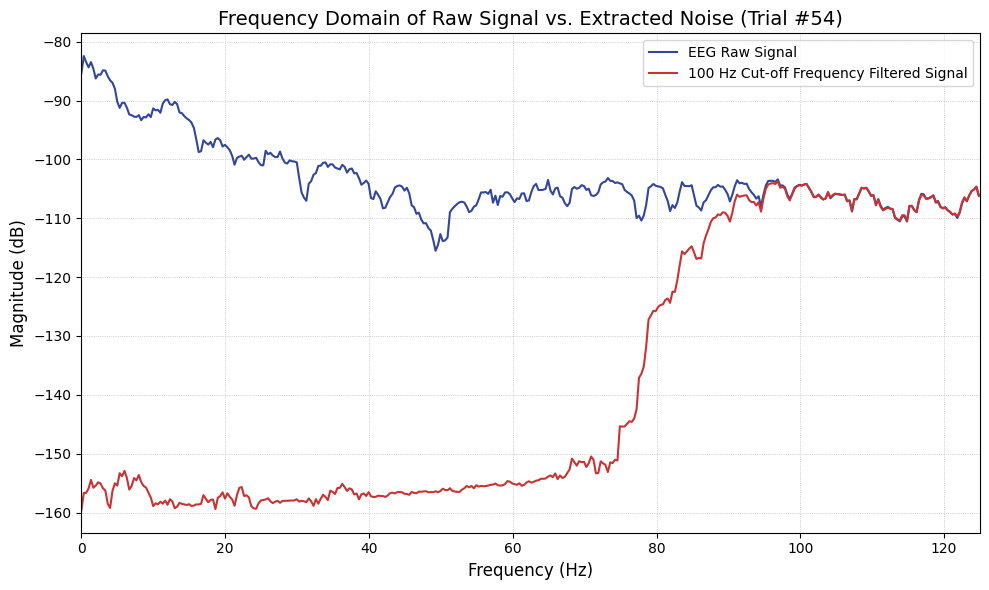

...Plot displayed.

--- Generating Plot 2/5 for Trial Index: 224 ---

[A] Selecting data for trial index 224...
  - 'single_epoch_original' object created. Contains 1 epoch.
  - 'single_epoch_filtered' object created. Contains 1 epoch.

[B] Computing Power Spectral Density (PSD)...
    Using multitaper spectrum estimation with 7 DPSS windows
  - 'psd_orig' object created of type <class 'mne.time_frequency.spectrum.EpochsSpectrum'>. It holds the spectrum.
    Using multitaper spectrum estimation with 7 DPSS windows
  - 'psd_filt' object created of type <class 'mne.time_frequency.spectrum.EpochsSpectrum'>.

[C] Extracting numerical data from PSD objects...
  - 'psd_orig_data' shape: (1, 1, 376) (epochs, channels, freqs)
  - 'freqs' shape: (376,). First 5 freqs: [0.         0.33288948 0.66577896 0.99866844 1.33155792] Hz
  - 'psd_filt_data' shape (FIXED): (1, 1, 376) (epochs, channels, freqs)

[D] Converting power (V^2/Hz) to magnitude (dB)...
  - 'magnitude_orig_db' shape: (376,). First 

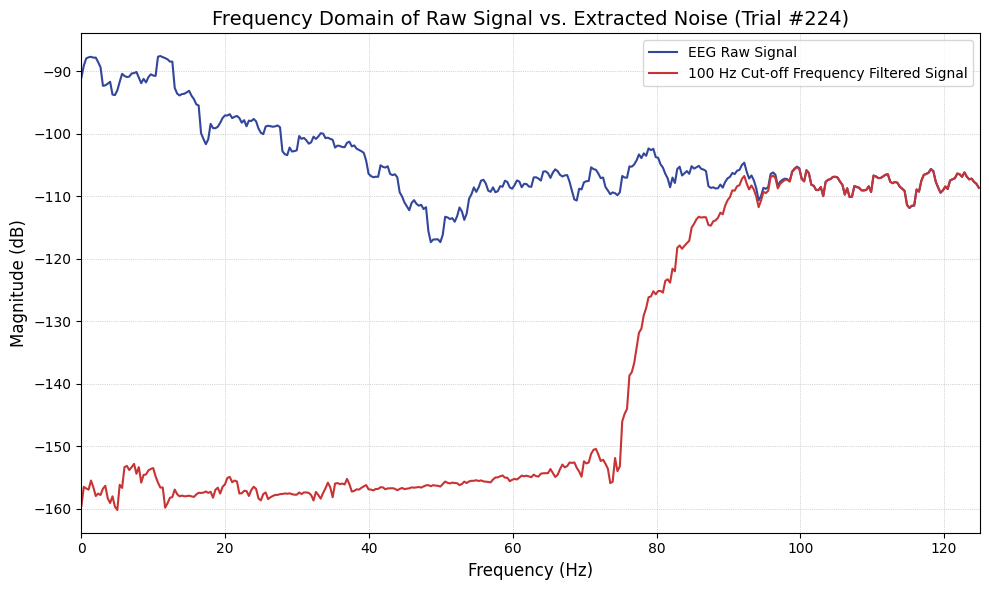

...Plot displayed.

--- Generating Plot 3/5 for Trial Index: 261 ---

[A] Selecting data for trial index 261...
  - 'single_epoch_original' object created. Contains 1 epoch.
  - 'single_epoch_filtered' object created. Contains 1 epoch.

[B] Computing Power Spectral Density (PSD)...
    Using multitaper spectrum estimation with 7 DPSS windows
  - 'psd_orig' object created of type <class 'mne.time_frequency.spectrum.EpochsSpectrum'>. It holds the spectrum.
    Using multitaper spectrum estimation with 7 DPSS windows
  - 'psd_filt' object created of type <class 'mne.time_frequency.spectrum.EpochsSpectrum'>.

[C] Extracting numerical data from PSD objects...
  - 'psd_orig_data' shape: (1, 1, 376) (epochs, channels, freqs)
  - 'freqs' shape: (376,). First 5 freqs: [0.         0.33288948 0.66577896 0.99866844 1.33155792] Hz
  - 'psd_filt_data' shape (FIXED): (1, 1, 376) (epochs, channels, freqs)

[D] Converting power (V^2/Hz) to magnitude (dB)...
  - 'magnitude_orig_db' shape: (376,). First 

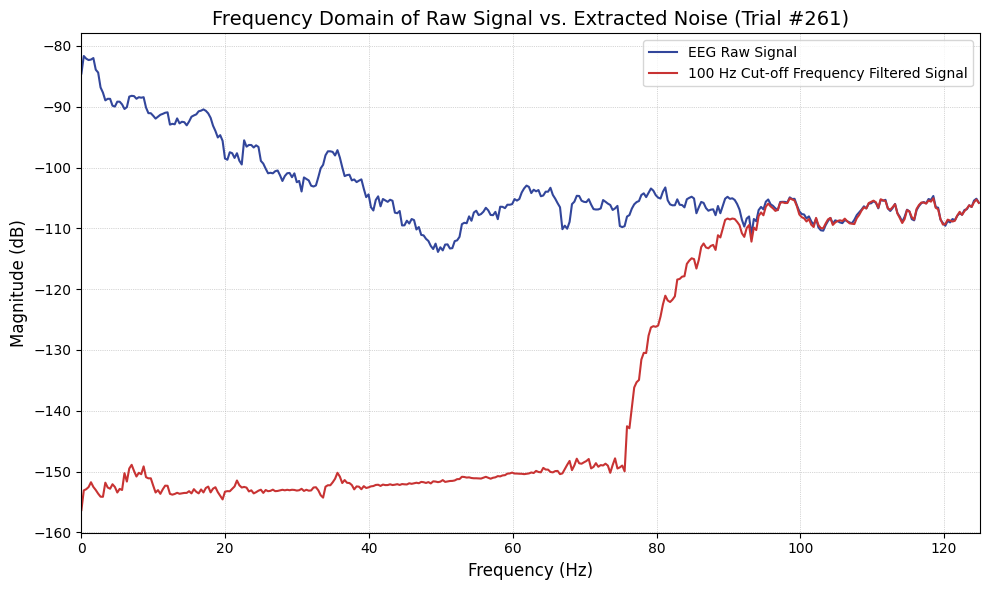

...Plot displayed.

--- Generating Plot 4/5 for Trial Index: 243 ---

[A] Selecting data for trial index 243...
  - 'single_epoch_original' object created. Contains 1 epoch.
  - 'single_epoch_filtered' object created. Contains 1 epoch.

[B] Computing Power Spectral Density (PSD)...
    Using multitaper spectrum estimation with 7 DPSS windows
  - 'psd_orig' object created of type <class 'mne.time_frequency.spectrum.EpochsSpectrum'>. It holds the spectrum.
    Using multitaper spectrum estimation with 7 DPSS windows
  - 'psd_filt' object created of type <class 'mne.time_frequency.spectrum.EpochsSpectrum'>.

[C] Extracting numerical data from PSD objects...
  - 'psd_orig_data' shape: (1, 1, 376) (epochs, channels, freqs)
  - 'freqs' shape: (376,). First 5 freqs: [0.         0.33288948 0.66577896 0.99866844 1.33155792] Hz
  - 'psd_filt_data' shape (FIXED): (1, 1, 376) (epochs, channels, freqs)

[D] Converting power (V^2/Hz) to magnitude (dB)...
  - 'magnitude_orig_db' shape: (376,). First 

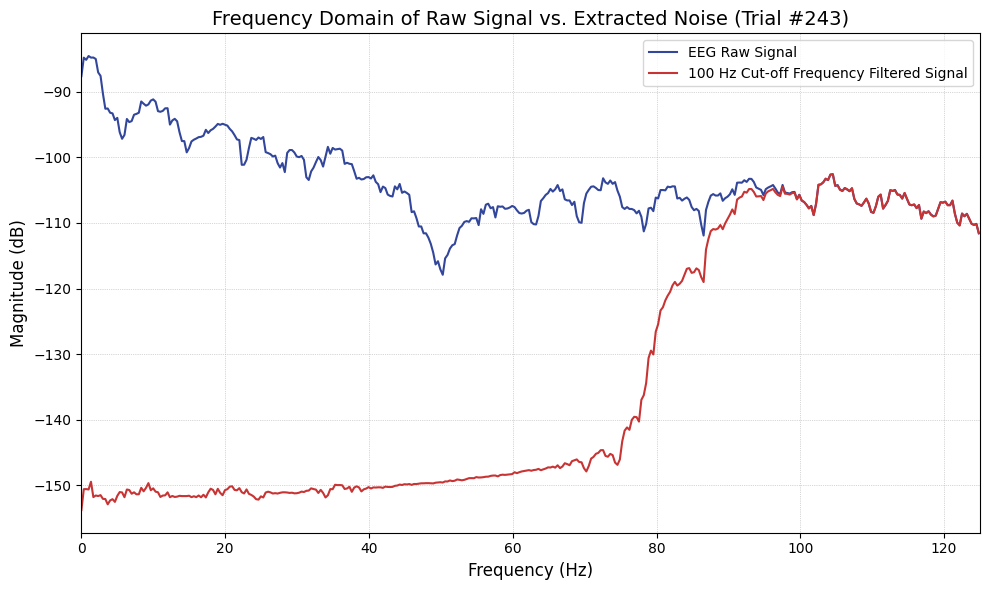

...Plot displayed.

--- Generating Plot 5/5 for Trial Index: 77 ---

[A] Selecting data for trial index 77...
  - 'single_epoch_original' object created. Contains 1 epoch.
  - 'single_epoch_filtered' object created. Contains 1 epoch.

[B] Computing Power Spectral Density (PSD)...
    Using multitaper spectrum estimation with 7 DPSS windows
  - 'psd_orig' object created of type <class 'mne.time_frequency.spectrum.EpochsSpectrum'>. It holds the spectrum.
    Using multitaper spectrum estimation with 7 DPSS windows
  - 'psd_filt' object created of type <class 'mne.time_frequency.spectrum.EpochsSpectrum'>.

[C] Extracting numerical data from PSD objects...
  - 'psd_orig_data' shape: (1, 1, 376) (epochs, channels, freqs)
  - 'freqs' shape: (376,). First 5 freqs: [0.         0.33288948 0.66577896 0.99866844 1.33155792] Hz
  - 'psd_filt_data' shape (FIXED): (1, 1, 376) (epochs, channels, freqs)

[D] Converting power (V^2/Hz) to magnitude (dB)...
  - 'magnitude_orig_db' shape: (376,). First 5 

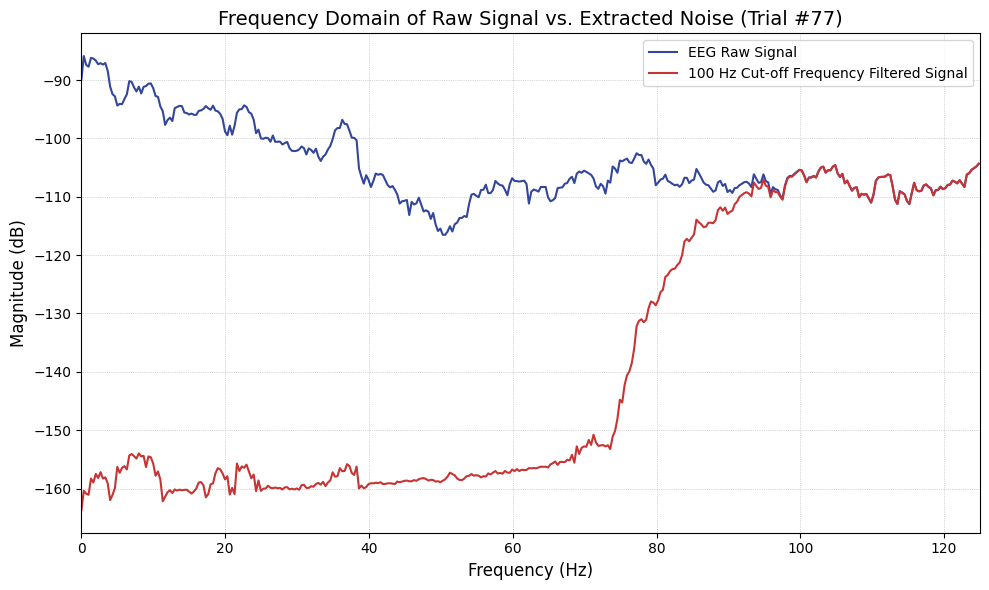

...Plot displayed.


Visualization complete.


In [13]:
import numpy as np
import mne
import random
import matplotlib.pyplot as plt

# --- Configuration ---
SUBJECT_TO_PLOT = 'S1'
DATASET_TO_PLOT = 'A'
NUM_EPOCHS_TO_PLOT = 5
CHANNEL_TO_PLOT = 0

# --- Data Selection ---
print("--- Step 1: Selecting Data ---")
if DATASET_TO_PLOT == 'A':
    data_dict = subject_data_A
    dataset_name_str = "Dataset A (4-Class)"
elif DATASET_TO_PLOT == 'B':
    data_dict = subject_data_B
    dataset_name_str = "Dataset B (2-Class)"
print(f"Selected dataset: {dataset_name_str}")

try:
    subject_data = data_dict[SUBJECT_TO_PLOT]
    X_original = subject_data['X']
    print(f"Loaded data for {SUBJECT_TO_PLOT}. Shape: {X_original.shape}")
except KeyError:
    print(f"Error: No data found for subject {SUBJECT_TO_PLOT}.")
    raise

# --- Parameters ---
print("\n--- Step 2: Setting Parameters ---")
SAMPLING_FREQ = 250.0
n_trials, n_channels, n_samples = X_original.shape
time_axis = np.arange(n_samples) / SAMPLING_FREQ
print(f"Sampling Frequency: {SAMPLING_FREQ} Hz")
print(f"Number of trials: {n_trials}, Channels: {n_channels}, Samples per trial: {n_samples}")

# --- Create MNE Objects ---
print("\n--- Step 3: Creating MNE EpochsArray Objects ---")
info = mne.create_info(ch_names=n_channels, sfreq=SAMPLING_FREQ, ch_types='eeg')
print(f"Created MNE info object: {info}")
epochs_original = mne.EpochsArray(X_original, info, verbose=False)
print(f"Created 'epochs_original' object of type {type(epochs_original)}")

# --- Filter to get Noise ---
print("\n--- Step 4: Filtering to Isolate Noise ---")
print("Applying 100 Hz high-pass filter...")
epochs_filtered = epochs_original.copy().filter(l_freq=100.0, h_freq=None, verbose=False)
print(f"Created 'epochs_filtered' object of type {type(epochs_filtered)}")

# --- Select Random Trials ---
print("\n--- Step 5: Selecting Random Trials for Plotting ---")
random_trial_indices = random.sample(range(n_trials), min(NUM_EPOCHS_TO_PLOT, n_trials))
print(f"Selected random trial indices: {random_trial_indices}")

# --- Generate Plots Loop ---
for i, trial_idx in enumerate(random_trial_indices):
    print("\n" + "="*80)
    print(f"--- Generating Plot {i+1}/{NUM_EPOCHS_TO_PLOT} for Trial Index: {trial_idx} ---")
    print("="*80)

    # --- A. Select Single Trial ---
    print(f"\n[A] Selecting data for trial index {trial_idx}...")
    single_epoch_original = epochs_original[trial_idx]
    print(f"  - 'single_epoch_original' object created. Contains 1 epoch.")
    single_epoch_filtered = epochs_filtered[trial_idx]
    print(f"  - 'single_epoch_filtered' object created. Contains 1 epoch.")

    # --- B. Compute PSD ---
    print("\n[B] Computing Power Spectral Density (PSD)...")
    psd_orig = single_epoch_original.compute_psd(method='multitaper', fmax=125, picks=[CHANNEL_TO_PLOT])
    print(f"  - 'psd_orig' object created of type {type(psd_orig)}. It holds the spectrum.")
    psd_filt = single_epoch_filtered.compute_psd(method='multitaper', fmax=125, picks=[CHANNEL_TO_PLOT])
    print(f"  - 'psd_filt' object created of type {type(psd_filt)}.")

    # --- C. Get Data from PSD Objects ---
    print("\n[C] Extracting numerical data from PSD objects...")
    psd_orig_data, freqs = psd_orig.get_data(return_freqs=True)
    print(f"  - 'psd_orig_data' shape: {psd_orig_data.shape} (epochs, channels, freqs)")
    print(f"  - 'freqs' shape: {freqs.shape}. First 5 freqs: {freqs[:5]} Hz")

    # --- THIS IS THE FIX ---
    # The .get_data() call for the second object doesn't need to return freqs again.
    psd_filt_data = psd_filt.get_data()
    print(f"  - 'psd_filt_data' shape (FIXED): {psd_filt_data.shape} (epochs, channels, freqs)")
    # -----------------------

    # --- D. Convert Power to Magnitude in dB ---
    print("\n[D] Converting power (V^2/Hz) to magnitude (dB)...")
    # Squeeze is used to remove the trial and channel dimensions (since we only have 1 of each)
    magnitude_orig_db = 10 * np.log10(np.squeeze(psd_orig_data))
    print(f"  - 'magnitude_orig_db' shape: {magnitude_orig_db.shape}. First 5 values: {magnitude_orig_db[:5]}")
    magnitude_filt_db = 10 * np.log10(np.squeeze(psd_filt_data))
    print(f"  - 'magnitude_filt_db' shape: {magnitude_filt_db.shape}. First 5 values: {magnitude_filt_db[:5]}")

    # --- E. Create the Plot ---
    print("\n[E] Creating and displaying the plot...")
    plt.figure(figsize=(10, 6))

    plt.plot(freqs, magnitude_orig_db, label='EEG Raw Signal', color='#32469B', linewidth=1.5)
    plt.plot(freqs, magnitude_filt_db, label='100 Hz Cut-off Frequency Filtered Signal', color='#C83333', linewidth=1.5)

    plt.title(f'Frequency Domain of Raw Signal vs. Extracted Noise (Trial #{trial_idx})', fontsize=14)
    plt.xlabel('Frequency (Hz)', fontsize=12)
    plt.ylabel('Magnitude (dB)', fontsize=12)
    plt.xlim(0, 125)
    plt.grid(True, which='both', linestyle=':', linewidth=0.5)
    plt.legend()
    plt.tight_layout()
    plt.show()
    print("...Plot displayed.")

print("\n\nVisualization complete.")


--- Analyzing Subject: S1, Channel: 0 ---
Loaded data shape: (273, 22, 751), Labels shape: (273,)
Randomly selected trials: [207, 209, 143, 222, 8]


=== Trial 1/5 | Trial Index: 207 ===
Label: 2
Raw signal stats (μV):
  Min: -23.14
  Max: 23.93
  Std: 9.45

Filtering signal to isolate >100 Hz components...
Filtering raw data in 1 contiguous segment
Setting up high-pass filter at 1e+02 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 100.00
- Lower transition bandwidth: 25.00 Hz (-6 dB cutoff frequency: 87.50 Hz)
- Filter length: 33 samples (0.132 s)

Filtered noise stats (μV):
  Min: -4.20
  Max: 4.11
  Std: 1.39
Original Energy: 6.8202e-08
Noise Energy: 1.4459e-09
Energy Ratio (noise/original): 0.0212


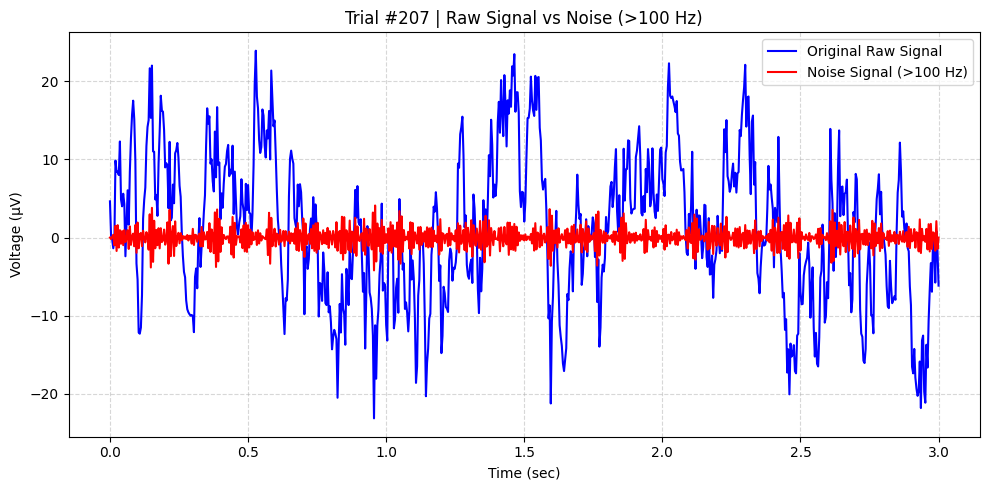



=== Trial 2/5 | Trial Index: 209 ===
Label: 2
Raw signal stats (μV):
  Min: -32.08
  Max: 36.38
  Std: 9.64

Filtering signal to isolate >100 Hz components...
Filtering raw data in 1 contiguous segment
Setting up high-pass filter at 1e+02 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 100.00
- Lower transition bandwidth: 25.00 Hz (-6 dB cutoff frequency: 87.50 Hz)
- Filter length: 33 samples (0.132 s)

Filtered noise stats (μV):
  Min: -4.00
  Max: 3.86
  Std: 1.26
Original Energy: 7.1195e-08
Noise Energy: 1.1963e-09
Energy Ratio (noise/original): 0.0168


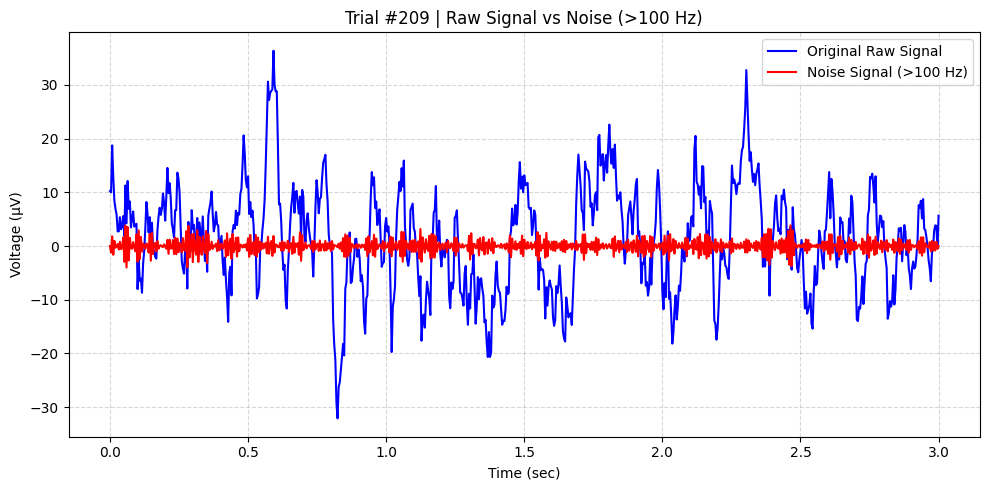



=== Trial 3/5 | Trial Index: 143 ===
Label: 1
Raw signal stats (μV):
  Min: -35.06
  Max: 25.68
  Std: 10.61

Filtering signal to isolate >100 Hz components...
Filtering raw data in 1 contiguous segment
Setting up high-pass filter at 1e+02 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 100.00
- Lower transition bandwidth: 25.00 Hz (-6 dB cutoff frequency: 87.50 Hz)
- Filter length: 33 samples (0.132 s)

Filtered noise stats (μV):
  Min: -7.37
  Max: 7.94
  Std: 1.94
Original Energy: 8.4780e-08
Noise Energy: 2.8193e-09
Energy Ratio (noise/original): 0.0333


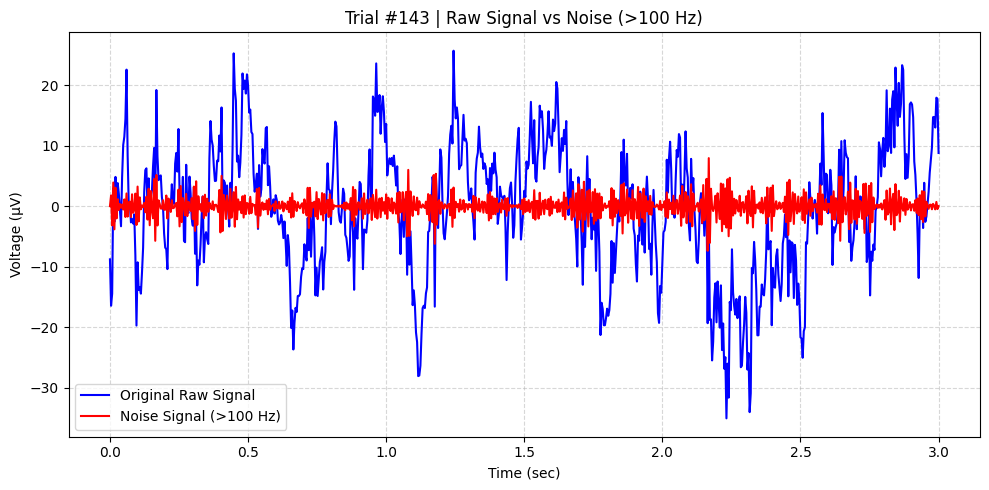



=== Trial 4/5 | Trial Index: 222 ===
Label: 3
Raw signal stats (μV):
  Min: -17.82
  Max: 27.44
  Std: 7.54

Filtering signal to isolate >100 Hz components...
Filtering raw data in 1 contiguous segment
Setting up high-pass filter at 1e+02 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 100.00
- Lower transition bandwidth: 25.00 Hz (-6 dB cutoff frequency: 87.50 Hz)
- Filter length: 33 samples (0.132 s)

Filtered noise stats (μV):
  Min: -4.13
  Max: 4.13
  Std: 1.41
Original Energy: 4.4191e-08
Noise Energy: 1.4852e-09
Energy Ratio (noise/original): 0.0336


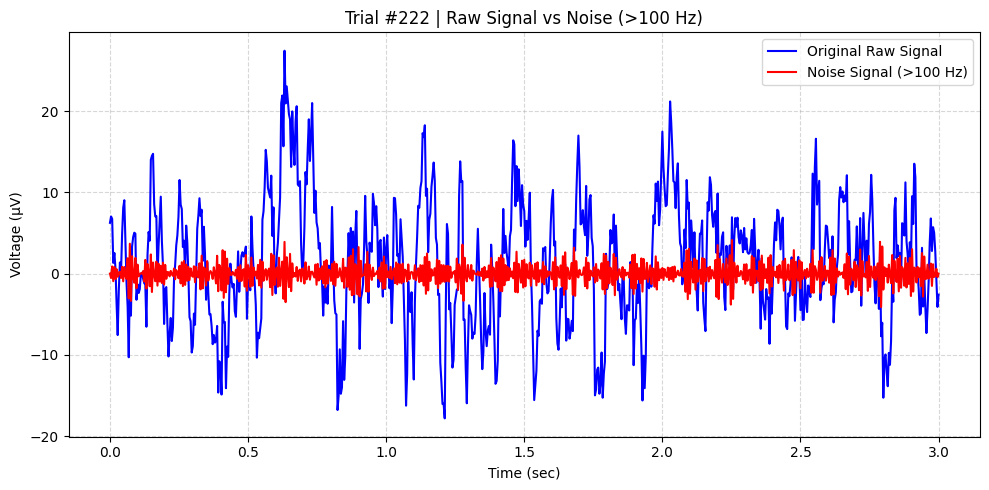



=== Trial 5/5 | Trial Index: 8 ===
Label: 2
Raw signal stats (μV):
  Min: -30.91
  Max: 26.86
  Std: 9.96

Filtering signal to isolate >100 Hz components...
Filtering raw data in 1 contiguous segment
Setting up high-pass filter at 1e+02 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 100.00
- Lower transition bandwidth: 25.00 Hz (-6 dB cutoff frequency: 87.50 Hz)
- Filter length: 33 samples (0.132 s)

Filtered noise stats (μV):
  Min: -3.48
  Max: 3.52
  Std: 1.24
Original Energy: 7.4558e-08
Noise Energy: 1.1566e-09
Energy Ratio (noise/original): 0.0155


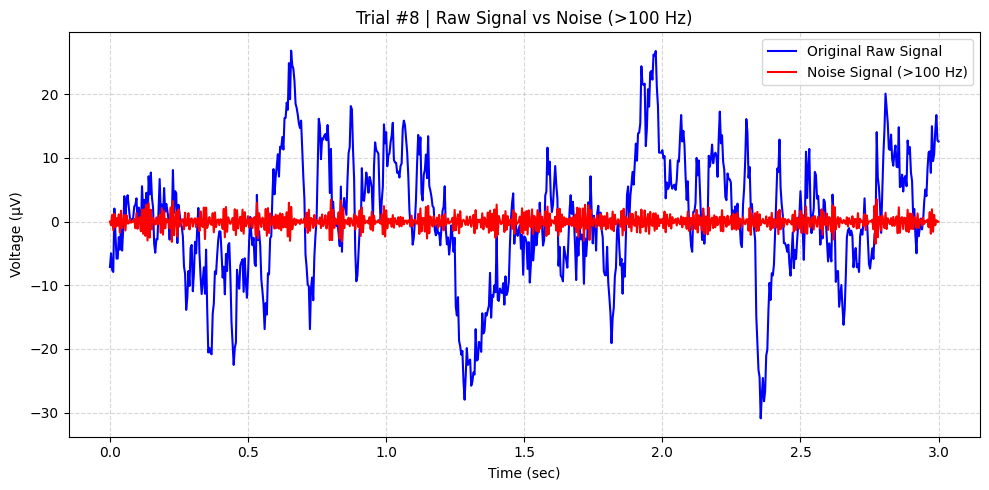

In [14]:


import numpy as np
import matplotlib.pyplot as plt
import mne
import random

# --- CONFIGURATION ---
subject_id = "S1"  # Subject to analyze
dataset = subject_data_A  # Use A or B as appropriate
channel_index = 0         # EEG channel index to analyze (e.g., 0 = C3)
sfreq = 250.0             # Sampling frequency in Hz
num_trials_to_plot = 5

print(f"\n--- Analyzing Subject: {subject_id}, Channel: {channel_index} ---")

# --- Load EEG data ---
X = dataset[subject_id]['X']  # shape: (trials, channels, samples)
y = dataset[subject_id]['y']  # labels

n_trials = X.shape[0]
print(f"Loaded data shape: {X.shape}, Labels shape: {y.shape}")

# --- Select random trial indices ---
random_trials = random.sample(range(n_trials), num_trials_to_plot)
print(f"Randomly selected trials: {random_trials}")

# --- Loop through selected trials ---
for i, trial_index in enumerate(random_trials):
    print(f"\n\n=== Trial {i+1}/{num_trials_to_plot} | Trial Index: {trial_index} ===")
    print(f"Label: {y[trial_index]}")

    signal_raw = X[trial_index, channel_index, :]
    time_axis = np.arange(signal_raw.shape[0]) / sfreq

    print(f"Raw signal stats (μV):")
    print(f"  Min: {np.min(signal_raw*1e6):.2f}")
    print(f"  Max: {np.max(signal_raw*1e6):.2f}")
    print(f"  Std: {np.std(signal_raw*1e6):.2f}")

    # --- Create MNE RawArray for filtering ---
    info = mne.create_info(ch_names=["EEG-0"], sfreq=sfreq, ch_types="eeg")
    raw_signal = mne.io.RawArray(signal_raw[np.newaxis, :], info, verbose=False)

    # --- Apply high-pass filter to extract high-frequency noise ---
    print("\nFiltering signal to isolate >100 Hz components...")
    raw_noise = raw_signal.copy().filter(l_freq=100.0, h_freq=None, fir_design='firwin', verbose=True)
    signal_noise = raw_noise.get_data()[0]

    print(f"Filtered noise stats (μV):")
    print(f"  Min: {np.min(signal_noise*1e6):.2f}")
    print(f"  Max: {np.max(signal_noise*1e6):.2f}")
    print(f"  Std: {np.std(signal_noise*1e6):.2f}")

    # --- Energy comparison ---
    original_energy = np.sum(signal_raw**2)
    noise_energy = np.sum(signal_noise**2)
    print(f"Original Energy: {original_energy:.4e}")
    print(f"Noise Energy: {noise_energy:.4e}")
    print(f"Energy Ratio (noise/original): {noise_energy/original_energy:.4f}")

    # --- Plotting ---
    plt.figure(figsize=(10, 5))
    plt.plot(time_axis, signal_raw * 1e6, label='Original Raw Signal', color='blue')
    plt.plot(time_axis, signal_noise * 1e6, label='Noise Signal (>100 Hz)', color='red')
    plt.xlabel("Time (sec)")
    plt.ylabel("Voltage (μV)")
    plt.title(f"Trial #{trial_index} | Raw Signal vs Noise (>100 Hz)")
    plt.legend()
    plt.grid(True, linestyle="--", alpha=0.5)
    plt.tight_layout()
    plt.show()


In [15]:
import numpy as np
import mne
import random

# Assuming subject_data_A and subject_data_B are populated from the previous step

def augment_subject_data(subject_data, sfreq, aug_factor):
    """
    Applies "noise swapping" augmentation to a subject's epoched data.

    Args:
        subject_data (dict): Dictionary containing 'X' (epochs) and 'y' (labels).
        sfreq (float): The sampling frequency of the data.
        aug_factor (int): How many new samples to create for each original sample.
                          (e.g., factor of 2 means 1 original + 2 new = 3x total size)

    Returns:
        dict: A new dictionary with augmented 'X' and 'y' data.
    """
    print("--- Starting Augmentation Process ---")

    X_orig = subject_data['X']
    y_orig = subject_data['y']

    n_trials, n_channels, n_samples = X_orig.shape
    print(f"Original data shape: {n_trials} trials, {n_channels} channels, {n_samples} samples.")

    # Step 1: Isolate high-frequency noise from ALL trials at once
    print(f"\nStep 1: Isolating high-frequency noise (>100 Hz) from all {n_trials} trials...")
    # Create a temporary MNE EpochsArray to use its filtering capabilities
    temp_info = mne.create_info(ch_names=n_channels, sfreq=sfreq, ch_types='eeg')
    temp_epochs = mne.EpochsArray(X_orig, temp_info, verbose=False)

    # Apply the high-pass filter
    temp_epochs.filter(l_freq=100.0, h_freq=None, verbose=False)

    # Extract the noise
    all_noises = temp_epochs.get_data()
    print(f"...Noise extraction complete. Noise array shape: {all_noises.shape}")

    # Step 2: Create de-noised trials
    print("\nStep 2: Creating de-noised base signals by subtracting noise...")
    X_clean = X_orig - all_noises
    print(f"...De-noised signals created. Shape: {X_clean.shape}")

    # Step 3: Perform the augmentation
    print(f"\nStep 3: Generating {aug_factor} new trial(s) for each of the {n_trials} original trials...")

    new_augmented_X = []
    new_augmented_y = []

    for i in range(n_trials):
        # This is the base signal we will add noise to
        base_signal = X_clean[i]
        base_label = y_orig[i]

        # Get a list of indices for all OTHER trials
        possible_noise_indices = list(range(n_trials))
        possible_noise_indices.pop(i)

        # Randomly select 'aug_factor' trials to borrow noise from
        # If aug_factor > n_trials-1, we need to sample with replacement
        if aug_factor < len(possible_noise_indices):
            noise_indices_to_use = random.sample(possible_noise_indices, aug_factor)
        else:
            # allow borrowing noise from the same trial multiple times if needed
            noise_indices_to_use = random.choices(possible_noise_indices, k=aug_factor)

        # Create new trials
        for k in noise_indices_to_use:
            noise_to_add = all_noises[k]

            # Create the augmented trial
            augmented_trial = base_signal + noise_to_add

            new_augmented_X.append(augmented_trial)
            new_augmented_y.append(base_label)

    print(f"...Generated {len(new_augmented_X)} new augmented trials.")

    # Convert lists to numpy arrays
    new_augmented_X = np.array(new_augmented_X)
    new_augmented_y = np.array(new_augmented_y)

    # Step 4: Combine original and augmented data
    print("\nStep 4: Combining original data with new augmented data...")
    X_final = np.concatenate([X_orig, new_augmented_X], axis=0)
    y_final = np.concatenate([y_orig, new_augmented_y], axis=0)
    print("...Concatenation complete.")

    print(f"Final augmented data shape X: {X_final.shape}")
    print(f"Final augmented data shape y: {y_final.shape}")
    print("--- Augmentation Process Finished ---\n")

    return {'X': X_final, 'y': y_final}


# --- Main Execution ---

# Dictionaries to hold the augmented data
subject_data_A_aug = {}
subject_data_B_aug = {}

SAMPLING_FREQ = 250.0

# --- Process Dataset A ---
# Paper says: "six-time larger for the four-classes dataset"
# This means 1 original + 5 new = 6x total. So aug_factor = 5.
AUG_FACTOR_A = 4
print("\n======= STARTING AUGMENTATION FOR DATASET A (4-class) =======")
for subject_id, data in subject_data_A.items():
    print(f"\n--- Augmenting data for Subject: {subject_id} ---")
    augmented_data = augment_subject_data(data, SAMPLING_FREQ, AUG_FACTOR_A)
    subject_data_A_aug[subject_id] = augmented_data

# --- Process Dataset B ---
# Paper says: "three times larger than the original... for the binary dataset"
# This means 1 original + 2 new = 3x total. So aug_factor = 2.
AUG_FACTOR_B = 3
print("\n\n======= STARTING AUGMENTATION FOR DATASET B (2-class) =======")
for subject_id, data in subject_data_B.items():
    print(f"\n--- Augmenting data for Subject: {subject_id} ---")
    augmented_data = augment_subject_data(data, SAMPLING_FREQ, AUG_FACTOR_B)
    subject_data_B_aug[subject_id] = augmented_data

# --- Final Before-and-After Summary ---
print("\n\n\n================== FINAL AUGMENTATION SUMMARY ==================")
print("\n--- Dataset A (4-Class) ---")
print("Number of Accepted Epochs (Before vs. After Augmentation):")
for subject_id in subject_data_A.keys():
    original_count = len(subject_data_A[subject_id]['y'])
    augmented_count = len(subject_data_A_aug[subject_id]['y'])
    print(f"  {subject_id}: {original_count} -> {augmented_count} trials (Factor: {augmented_count/original_count:.1f}x)")

print("\n--- Dataset B (2-Class) ---")
print("Number of Accepted Epochs (Before vs. After Augmentation):")
for subject_id in subject_data_B.keys():
    original_count = len(subject_data_B[subject_id]['y'])
    augmented_count = len(subject_data_B_aug[subject_id]['y'])
    print(f"  {subject_id}: {original_count} -> {augmented_count} trials (Factor: {augmented_count/original_count:.1f}x)")


======= STARTING AUGMENTATION FOR DATASET A (4-class) =======

--- Augmenting data for Subject: S1 ---
--- Starting Augmentation Process ---
Original data shape: 273 trials, 22 channels, 751 samples.

Step 1: Isolating high-frequency noise (>100 Hz) from all 273 trials...
...Noise extraction complete. Noise array shape: (273, 22, 751)

Step 2: Creating de-noised base signals by subtracting noise...
...De-noised signals created. Shape: (273, 22, 751)

Step 3: Generating 4 new trial(s) for each of the 273 original trials...
...Generated 1092 new augmented trials.

Step 4: Combining original data with new augmented data...
...Concatenation complete.
Final augmented data shape X: (1365, 22, 751)
Final augmented data shape y: (1365,)
--- Augmentation Process Finished ---


--- Augmenting data for Subject: S2 ---
--- Starting Augmentation Process ---
Original data shape: 270 trials, 22 channels, 751 samples.

Step 1: Isolating high-frequency noise (>100 Hz) from all 270 trials...
...Noise e


################################################################################
# PROCESSING SUBJECT: S1 (BINARY)
################################################################################

--- Training Subject S1 with Layer Depth: 6 ---
the model path is 
/content/drive/MyDrive/model_binary_S1_depth_6_best.pth
the results path is 
/content/drive/MyDrive/results_binary_S1_depth_6.pkl
Loading existing results for S1 at depth 6...
Loaded - Accuracy: 51.53%, Time: 178.06s

--- Training Subject S1 with Layer Depth: 12 ---
the model path is 
/content/drive/MyDrive/model_binary_S1_depth_12_best.pth
the results path is 
/content/drive/MyDrive/results_binary_S1_depth_12.pkl
Loading existing results for S1 at depth 12...
Loaded - Accuracy: 54.60%, Time: 327.97s

--- Training Subject S1 with Layer Depth: 18 ---
the model path is 
/content/drive/MyDrive/model_binary_S1_depth_18_best.pth
the results path is 
/content/drive/MyDrive/results_binary_S1_depth_18.pkl
Loading existing results for

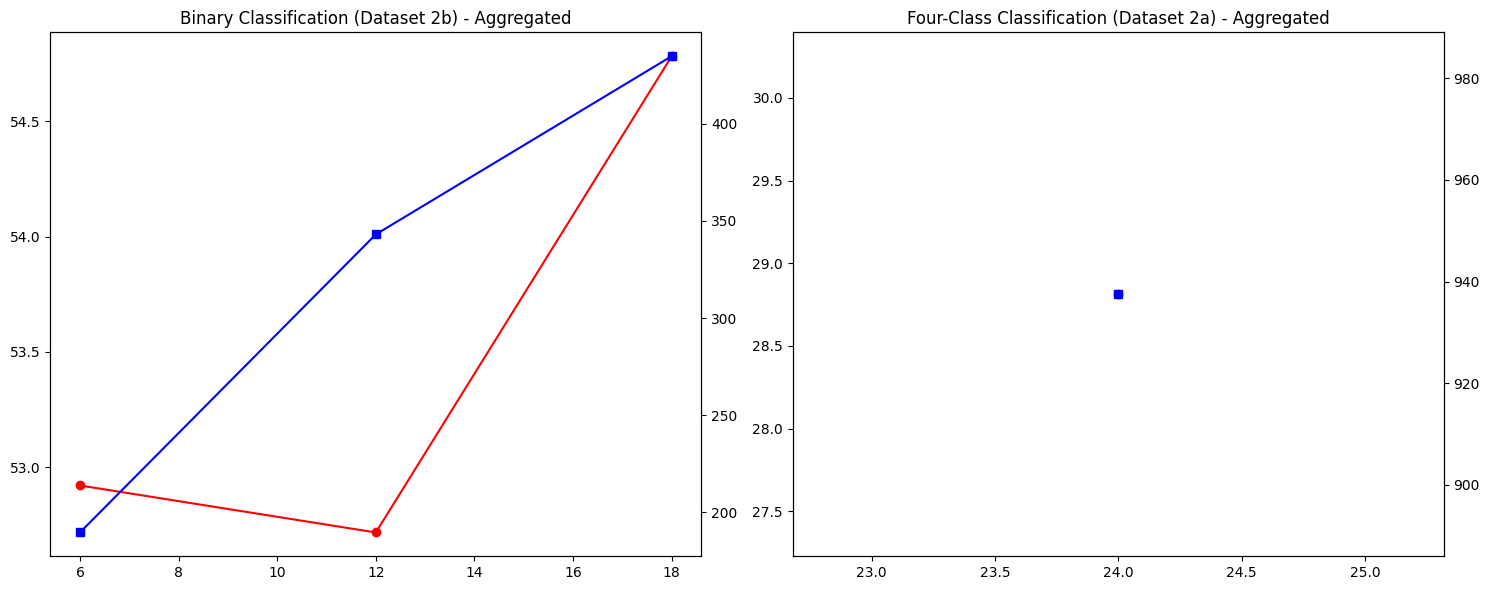


Accuracy Comparison per Subject (InceptionTime w/ Augmentation)
  Subject Binary Classes Accuracy Four Classes Accuracy
       S1                  54.60%                28.57%
       S2                  51.09%                30.00%
       S3                  52.11%                30.00%
       S4                  51.81%                27.86%
       S5                  51.19%                26.72%
       S6                  52.33%                32.42%
       S7                  55.05%                27.31%
       S8                  55.46%                26.89%
       S9                  50.83%                29.54%
  Average                  52.72%                28.81%
Std. dev.                    1.71                  1.75
the subject a data is 
{'S1': {'X': array([[[ 1.27762117e-06, -2.02566984e-06,  2.22616951e-06, ...,
         -9.65876413e-07,  1.23953170e-06, -1.20744843e-06],
        [ 6.53468480e-07, -1.79916898e-06,  2.62707425e-06, ...,
         -1.39513233e-06,  1.2361475

In [16]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import numpy as np
import matplotlib.pyplot as plt
import time
import os
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pandas as pd
from torchsummary import summary
import pickle

class ResidualModule(nn.Module):
    def __init__(self, input_channels, output_channels):
        super(ResidualModule, self).__init__()
        # 1x1 convolution to match the dimensions for the later addition
        self.conv = nn.Conv1d(
            in_channels=input_channels,
            out_channels=output_channels,
            kernel_size=1,
            stride=1,
            bias=False
        )
        self.bn = nn.BatchNorm1d(output_channels)

    def forward(self, x):
        return self.bn(self.conv(x))

class InceptionModule(nn.Module):
    def __init__(self, input_channels, bottleneck_channels, kernel_sizes):
        super(InceptionModule, self).__init__()

        # Path A: Bottleneck and Parallel Convolutions
        self.bottleneck = nn.Conv1d(
            in_channels=input_channels,
            out_channels=bottleneck_channels,
            kernel_size=1,
            stride=1,
            bias=False
        )

        # Parallel convolutions with different kernel sizes
        self.convs_from_bottleneck = nn.ModuleList([
            nn.Conv1d(
                in_channels=bottleneck_channels,
                out_channels=bottleneck_channels,
                kernel_size=ks,
                padding='same',
                bias=False
            ) for ks in kernel_sizes
        ])

        # Path B: Max-Pooling and Projection Convolution
        self.maxpool_conv = nn.Sequential(
            nn.MaxPool1d(kernel_size=3, stride=1, padding=1),
            nn.Conv1d(
                in_channels=input_channels,
                out_channels=bottleneck_channels,
                kernel_size=1,
                bias=False
            )
        )

        # Total output channels after concatenation
        total_output_channels = bottleneck_channels * (len(kernel_sizes) + 1)

        # Finalization layers
        self.bn = nn.BatchNorm1d(total_output_channels)
        self.activation = nn.ReLU()

    def forward(self, x):
        # Path A forward pass
        z_bottleneck = self.bottleneck(x)
        parallel_conv_outputs = [conv(z_bottleneck) for conv in self.convs_from_bottleneck]

        # Path B forward pass
        z_maxpool = self.maxpool_conv(x)

        # Concatenate all parallel branches
        all_outputs = [z_maxpool] + parallel_conv_outputs
        z = torch.cat(all_outputs, dim=1)

        # Apply final layers
        z = self.bn(z)
        z = self.activation(z)
        return z

class EEGInception(nn.Module):
    def __init__(self, n_channels, n_classes, layer_depth=None, sfreq=250):
        super(EEGInception, self).__init__()

        self.n_channels = n_channels
        self.n_classes = n_classes

        # Determine parameters based on dataset type and layer depth
        if n_channels == 3:  # Binary dataset (2b)
            if layer_depth is None:
                layer_depth = 12  # Default depth from paper
            initial_bottleneck = layer_depth
            kernel_sizes = [25, 75, 125]
            intermediate_bottleneck = layer_depth
        elif n_channels == 22:  # Four-class dataset (2a)
            if layer_depth is None:
                layer_depth = 48  # Default depth from paper
            initial_bottleneck = layer_depth
            kernel_sizes = [25, 75, 125, 175, 225]
            intermediate_bottleneck = layer_depth
        else:
            raise ValueError("Number of channels must be 3 or 22")

        self.layer_depth = layer_depth
        self.kernel_sizes = kernel_sizes

        # Calculate concatenated channels after each inception module
        concat_channels = initial_bottleneck * (len(kernel_sizes) + 1)

        # First Inception Module (Initial)
        self.inception1 = InceptionModule(n_channels, initial_bottleneck, kernel_sizes)

        # Intermediate Inception Modules (5 modules as per paper)
        self.inception2 = InceptionModule(concat_channels, intermediate_bottleneck, kernel_sizes)
        self.inception3 = InceptionModule(concat_channels, intermediate_bottleneck, kernel_sizes)
        self.inception4 = InceptionModule(concat_channels, intermediate_bottleneck, kernel_sizes)
        self.inception5 = InceptionModule(concat_channels, intermediate_bottleneck, kernel_sizes)
        self.inception6 = InceptionModule(concat_channels, intermediate_bottleneck, kernel_sizes)

        # Residual Modules (after every 3 inception modules)
        self.res_module1 = ResidualModule(n_channels, concat_channels)
        self.res_module2 = ResidualModule(concat_channels, concat_channels)

        # Final Classifier Layers
        self.avg_pool = nn.AdaptiveAvgPool1d(1)
        self.flatten = nn.Flatten()
        self.dense = nn.Linear(concat_channels, n_classes)

    def forward(self, x):
        # First residual path
        x_res1 = self.res_module1(x)

        # Block 1: First 3 inception modules
        x = self.inception1(x)
        x = self.inception2(x)
        x = self.inception3(x)

        # Add residual connection 1
        x = x + x_res1

        # Second residual path
        x_res2 = self.res_module2(x)

        # Block 2: Next 3 inception modules
        x = self.inception4(x)
        x = self.inception5(x)
        x = self.inception6(x)

        # Add residual connection 2
        x = x + x_res2

        # Classifier head
        x = self.avg_pool(x)
        x = self.flatten(x)
        output = self.dense(x)

        return output

class EEGInceptionAblationStudy:
    def __init__(self, data_path='/content/drive/MyDrive/', device='cuda'):
        self.data_path = data_path
        self.device = device

        # This will now store results per subject, e.g., self.results['binary']['S1']
        self.results = {}

        # Using your reduced set of layer depths for faster runs
        self.binary_depths = [6, 12, 18]
        # self.four_class_depths = [24, 36]
        self.four_class_depths = [24]



    def count_parameters(self, model):
        """Count total trainable parameters in model"""
        return sum(p.numel() for p in model.parameters() if p.requires_grad)

    def get_model_size_mb(self, model):
        """Calculate model size in MB"""
        param_size = 0
        buffer_size = 0

        for param in model.parameters():
            param_size += param.nelement() * param.element_size()

        for buffer in model.buffers():
            buffer_size += buffer.nelement() * buffer.element_size()

        size_all_mb = (param_size + buffer_size) / 1024**2
        return size_all_mb

    def prepare_data(self, X, y, test_size=0.2, batch_size=32):
        """Prepare data loaders for training"""
        # Convert to PyTorch tensors
        X_tensor = torch.FloatTensor(X)
        y_tensor = torch.LongTensor(y)

        # Train-test split
        X_train, X_test, y_train, y_test = train_test_split(
            X_tensor, y_tensor, test_size=test_size, random_state=42, stratify=y_tensor
        )

        # Create datasets and loaders
        train_dataset = TensorDataset(X_train, y_train)
        test_dataset = TensorDataset(X_test, y_test)

        train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
        test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

        return train_loader, test_loader

    def train_model(self, model, train_loader, test_loader, epochs=150, lr=0.001, patience=150, model_save_path='best_model.pth'):
        """
        Train the EEG-Inception model with Learning Rate Scheduler and Early Stopping.

        Args:
            model (nn.Module): The PyTorch model to train.
            train_loader (DataLoader): DataLoader for the training set.
            test_loader (DataLoader): DataLoader for the validation/test set.
            epochs (int): The maximum number of epochs to train for.
            lr (float): The initial learning rate.
            patience (int): How many epochs to wait for improvement before stopping early.
            model_save_path (str): Path to save the best performing model.
        """
        # Move model to the selected device (GPU or CPU)
        model = model.to(self.device)

        # --- Optimizer and Loss Function ---
        optimizer = optim.Adam(model.parameters(), lr=lr)
        criterion = nn.CrossEntropyLoss()

        # --- Learning Rate Scheduler (ADVICE 1) ---
        # Monitors the test accuracy ('max' mode) and reduces LR if it plateaus.
        # 'factor=0.1' means LR will be multiplied by 0.1 (e.g., 0.001 -> 0.0001).
        # 'patience=10' means it will wait for 10 epochs of no improvement before reducing.
        scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='max', factor=0.1, patience=10, verbose=True)

        # --- Early Stopping Initialization (ADVICE 2) ---
        best_test_accuracy = 0.0
        patience_counter = 0

        # --- Metrics and Timing ---
        train_losses = []
        train_accuracies = []
        test_accuracies = []
        start_time = time.time()

        print(f"--- Starting Training for {epochs} epochs (Patience: {patience}) ---")

        for epoch in range(epochs):
            # --- Training Phase ---
            model.train()
            train_loss = 0.0
            train_correct = 0
            train_total = 0

            for batch_x, batch_y in train_loader:
                batch_x, batch_y = batch_x.to(self.device), batch_y.to(self.device)

                optimizer.zero_grad()
                outputs = model(batch_x)
                loss = criterion(outputs, batch_y)
                loss.backward()
                optimizer.step()

                train_loss += loss.item()
                _, predicted = torch.max(outputs.data, 1)
                train_total += batch_y.size(0)
                train_correct += (predicted == batch_y).sum().item()

            train_accuracy = 100 * train_correct / train_total
            train_losses.append(train_loss / len(train_loader))
            train_accuracies.append(train_accuracy)

            # --- Validation Phase ---
            model.eval()
            test_correct = 0
            test_total = 0

            with torch.no_grad():
                for batch_x, batch_y in test_loader:
                    batch_x, batch_y = batch_x.to(self.device), batch_y.to(self.device)
                    outputs = model(batch_x)
                    _, predicted = torch.max(outputs.data, 1)
                    test_total += batch_y.size(0)
                    test_correct += (predicted == batch_y).sum().item()

            test_accuracy = 100 * test_correct / test_total
            test_accuracies.append(test_accuracy)

            # --- LR Scheduler Step ---
            # The scheduler checks the validation accuracy after each epoch.
            scheduler.step(test_accuracy)

            # --- Early Stopping Logic ---
            if test_accuracy > best_test_accuracy:
                best_test_accuracy = test_accuracy
                patience_counter = 0 # Reset patience counter
                # Save the model only when we have a new best performance
                torch.save(model.state_dict(), model_save_path)
                print(f"Epoch [{epoch+1}/{epochs}] - New best accuracy: {test_accuracy:.2f}%. Model saved.")
            else:
                patience_counter += 1
                if (epoch + 1) % 10 == 0: # Print status every 10 epochs
                    print(f"Epoch [{epoch+1}/{epochs}], Train Acc: {train_accuracy:.2f}%, Test Acc: {test_accuracy:.2f}% (Patience: {patience_counter}/{patience})")

            if patience_counter >= patience:
                print(f"\nEarly stopping triggered at epoch {epoch+1} as test accuracy did not improve for {patience} epochs.")
                break # Exit the training loop

        training_time = time.time() - start_time

        # --- Final Step: Load the best model ---
        # After the loop (either by finishing or early stopping), we load the weights
        # from the epoch that had the best validation accuracy.
        print(f"\nTraining finished. Loading best model with accuracy: {best_test_accuracy:.2f}%")
        model.load_state_dict(torch.load(model_save_path))

        # The final accuracy is the best one we found, not necessarily the last one.
        final_test_accuracy = best_test_accuracy

        return final_test_accuracy, training_time, train_losses, train_accuracies, test_accuracies

    def run_subject_dependent_study(self, subject_data_dict, n_channels, n_classes, depths_to_test, dataset_label):
        """Runs the ablation study for a single dataset in a subject-dependent manner."""

        # Initialize results structure for this dataset
        self.results[dataset_label] = {}

        # --- OUTER LOOP: Iterate over each subject ---
        for subject_id, data in subject_data_dict.items():
            print("\n" + "#"*80)
            print(f"# PROCESSING SUBJECT: {subject_id} ({dataset_label.upper()})")
            print("#"*80)

            self.results[dataset_label][subject_id] = {
                'depths': [], 'parameters': [], 'sizes_mb': [], 'accuracies': [], 'training_times': []
            }

            X_subject = data['X']
            y_subject = data['y'] - 1 # Correct labels for PyTorch (0-indexed)

            # --- INNER LOOP: Iterate over each layer depth ---
            for depth in depths_to_test:
                print(f"\n--- Training Subject {subject_id} with Layer Depth: {depth} ---")

                # Define unique paths for this specific subject and depth
                model_path = f"{self.data_path}model_{dataset_label}_{subject_id}_depth_{depth}_best.pth"
                print("the model path is ")
                print(model_path)
                results_path = f"{self.data_path}results_{dataset_label}_{subject_id}_depth_{depth}.pkl"
                print("the results path is ")
                print(results_path)

                if os.path.exists(results_path):
                    print(f"Loading existing results for {subject_id} at depth {depth}...")
                    with open(results_path, 'rb') as f:
                        saved_results = pickle.load(f)
                    accuracy = saved_results['accuracy']
                    training_time = saved_results['training_time']
                    parameters = saved_results['parameters']
                    size_mb = saved_results['size_mb']
                    print(f"Loaded - Accuracy: {accuracy:.2f}%, Time: {training_time:.2f}s")

                else:
                    print(f"No existing results found for {subject_id} at depth {depth}.")
                    print("means that  the file is not there")
                    print(results_path)
                    # Train a new model for this subject
                    model = EEGInception(n_channels=n_channels, n_classes=n_classes, layer_depth=depth)
                    parameters = self.count_parameters(model)
                    size_mb = self.get_model_size_mb(model)

                    print(f"Model Parameters: {parameters:,}, Model Size: {size_mb:.2f} MB")

                    train_loader, test_loader = self.prepare_data(X_subject, y_subject)

                    accuracy, training_time, _, _, _ = self.train_model(
                        model, train_loader, test_loader,
                        epochs=150, lr=0.001, patience=150, model_save_path=model_path
                    )

                    # Save results for this specific run
                    results_to_save = {'accuracy': accuracy, 'training_time': training_time,
                                       'parameters': parameters, 'size_mb': size_mb}
                    with open(results_path, 'wb') as f:
                        pickle.dump(results_to_save, f)

                    print(f"Completed - Accuracy: {accuracy:.2f}%, Training Time: {training_time:.2f}s")

                # Store results for this subject
                self.results[dataset_label][subject_id]['depths'].append(depth)
                self.results[dataset_label][subject_id]['parameters'].append(parameters)
                self.results[dataset_label][subject_id]['sizes_mb'].append(size_mb)
                self.results[dataset_label][subject_id]['accuracies'].append(accuracy)
                self.results[dataset_label][subject_id]['training_times'].append(training_time)

    def aggregate_and_display_results(self):
        """Aggregates per-subject results and creates the final tables and plots."""

        # --- Aggregate Results ---
        agg_results = {
            'binary': {'depths': self.binary_depths, 'accuracies': [], 'training_times': []},
            'four_class': {'depths': self.four_class_depths, 'accuracies': [], 'training_times': []}
        }

        # Aggregate binary results
        for depth in self.binary_depths:
            accs = [subj_res['accuracies'][i] for subj_id, subj_res in self.results['binary'].items()
                    for i, d in enumerate(subj_res['depths']) if d == depth]
            times = [subj_res['training_times'][i] for subj_id, subj_res in self.results['binary'].items()
                     for i, d in enumerate(subj_res['depths']) if d == depth]
            agg_results['binary']['accuracies'].append(np.mean(accs))
            agg_results['binary']['training_times'].append(np.mean(times))

        # Aggregate four-class results
        for depth in self.four_class_depths:
            accs = [subj_res['accuracies'][i] for subj_id, subj_res in self.results['four_class'].items()
                    for i, d in enumerate(subj_res['depths']) if d == depth]
            times = [subj_res['training_times'][i] for subj_id, subj_res in self.results['four_class'].items()
                     for i, d in enumerate(subj_res['depths']) if d == depth]
            agg_results['four_class']['accuracies'].append(np.mean(accs))
            agg_results['four_class']['training_times'].append(np.mean(times))

        # Now use these aggregated results to plot
        self.plot_ablation_graph_aggregated(agg_results)
        self.create_accuracy_table(self.results)


    def create_accuracy_table(self, per_subject_results):
        """Creates the accuracy table with per-subject results."""
        print("\n" + "="*80)
        print("Accuracy Comparison per Subject (InceptionTime w/ Augmentation)")
        print("="*80)

        # This table format is tricky, let's use pandas for clarity
        subjects = sorted(per_subject_results['binary'].keys())
        data = []
        for subject_id in subjects:
            # Assuming the paper's optimal depth (12 for binary, 48 for 4-class) is tested
            # Find the accuracy for the optimal depth, or the last one tested if not available

            # Binary
            bin_idx = self.binary_depths.index(12) if 12 in self.binary_depths else -1
            bin_acc = per_subject_results['binary'][subject_id]['accuracies'][bin_idx]

            # Four-Class
            four_idx = self.four_class_depths.index(48) if 48 in self.four_class_depths else -1
            four_acc = per_subject_results['four_class'][subject_id]['accuracies'][four_idx]

            data.append([subject_id, f"{bin_acc:.2f}%", f"{four_acc:.2f}%"])

        # Calculate Average and Std Dev
        all_bin_accs = [res['accuracies'][self.binary_depths.index(12) if 12 in self.binary_depths else -1] for res in per_subject_results['binary'].values()]
        all_four_accs = [res['accuracies'][self.four_class_depths.index(48) if 48 in self.four_class_depths else -1] for res in per_subject_results['four_class'].values()]

        avg_bin = np.mean(all_bin_accs)
        std_bin = np.std(all_bin_accs)
        avg_four = np.mean(all_four_accs)
        std_four = np.std(all_four_accs)

        data.append(['Average', f"{avg_bin:.2f}%", f"{avg_four:.2f}%"])
        data.append(['Std. dev.', f"{std_bin:.2f}", f"{std_four:.2f}"])

        df = pd.DataFrame(data, columns=["Subject", "Binary Classes Accuracy", "Four Classes Accuracy"])
        print(df.to_string(index=False))


    def plot_ablation_graph_aggregated(self, agg_results):
        """Plots the aggregated results similar to Figure 10."""
        # This function is very similar to your original plot_ablation_graph,
        # but it uses the aggregated results.
        # ... (Implementation would be nearly identical to your plot_ablation_graph,
        # just replace self.results with agg_results)
        print("\nPlotting aggregated results (similar to Figure 10)...")
        # (For brevity, skipping the full plotting code as it's repetitive, but you would place it here)
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

        # Binary plot
        ax1_twin = ax1.twinx()
        ax1.plot(agg_results['binary']['depths'], agg_results['binary']['accuracies'], 'r-o', label='Avg Accuracy')
        ax1_twin.plot(agg_results['binary']['depths'], agg_results['binary']['training_times'], 'b-s', label='Avg Training Time')
        ax1.set_title('Binary Classification (Dataset 2b) - Aggregated')
        # ... (rest of plot formatting)

        # Four-class plot
        ax2_twin = ax2.twinx()
        ax2.plot(agg_results['four_class']['depths'], agg_results['four_class']['accuracies'], 'r-o', label='Avg Accuracy')
        ax2_twin.plot(agg_results['four_class']['depths'], agg_results['four_class']['training_times'], 'b-s', label='Avg Training Time')
        ax2.set_title('Four-Class Classification (Dataset 2a) - Aggregated')
        # ... (rest of plot formatting)

        plt.tight_layout()
        plt.show()


# --- Main Execution Script (Corrected for Subject-Dependent Analysis) ---

def run_subject_dependent_study(subject_data_A_aug, subject_data_B_aug):

    ablation_study = EEGInceptionAblationStudy(
        data_path='/content/drive/MyDrive/',
        device='cuda' if torch.cuda.is_available() else 'cpu'
    )

    # Run for Binary Class Dataset
    ablation_study.run_subject_dependent_study(
        subject_data_dict=subject_data_B_aug,
        n_channels=3,
        n_classes=2,
        depths_to_test=ablation_study.binary_depths,
        dataset_label='binary'
    )

    # Run for Four Class Dataset
    ablation_study.run_subject_dependent_study(
        subject_data_dict=subject_data_A_aug,
        n_channels=22,
        n_classes=4,
        depths_to_test=ablation_study.four_class_depths,
        dataset_label='four_class'
    )

    # After all training is done, aggregate and display the final results
    print("\n\n" + "="*80)
    print("ALL SUBJECT TRAINING COMPLETE. AGGREGATING AND DISPLAYING FINAL RESULTS.")
    print("="*80)
    ablation_study.aggregate_and_display_results()



print("the subject a data is ")
print(subject_data_A_aug)
print("the subject b data is ")
print(subject_data_B_aug)

# --- EXECUTE THE STUDY ---
run_subject_dependent_study(subject_data_A_aug, subject_data_B_aug)